In [3]:
import numpy  as np
import pandas as pd
import json
import pandas

In [4]:
import nltk
import nltk.corpus
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.metrics                  import silhouette_samples, silhouette_score
from sklearn.preprocessing            import normalize
from nltk.tokenize                    import word_tokenize
import re
from unidecode                        import unidecode
from nltk.corpus import stopwords

In [5]:
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

In [6]:
from sklearn import cluster

# Livro Mateus

In [1]:
Mateus_1 = "The book of the generation of Jesus Christ, the son of David, the son of Abraham.Abraham begat Isaac; and Isaac begat Jacob; and Jacob begat Judas and his brothers;And Judas begat Phares and Zara of Thamar; and Phares begat Esrom; and Esrom begat Aram;And Aram begat Aminadab; and Aminadab begat Naasson; and Naasson begat Salmon;And Salmon begat Booz of Rachab; and Booz begat Obed of Ruth; and Obed begat Jesse;And Jesse begat David the king; and David the king begat Solomon of her that had been the wife of Urias;And Solomon begat Roboam; and Roboam begat Abia; and Abia begat Asa;And Asa begat Josaphat; and Josaphat begat Joram; and Joram begat Ozias;And Ozias begat Joatham; and Joatham begat Achaz; and Achaz begat Ezekias;And Ezekias begat Manasses; and Manasses begat Amon; and Amon begat Josias;And Josias begat Jechonias and his brothers, about the time they were carried away to Babylon:And after they were brought to Babylon, Jechonias begat Salathiel; and Salathiel begat Zorobabel;And Zorobabel begat Abiud; and Abiud begat Eliakim; and Eliakim begat Azor;And Azor begat Sadoc; and Sadoc begat Achim; and Achim begat Eliud;And Eliud begat Eleazar; and Eleazar begat Matthan; and Matthan begat Jacob;And Jacob begat Joseph the husband of Mary, of whom was born Jesus, who is called Christ.So all the generations from Abraham to David are fourteen generations; and from David until the carrying away into Babylon are fourteen generations; and from the carrying away into Babylon to Christ are fourteen generations.Now the birth of Jesus Christ was on this wise: When as his mother Mary was espoused to Joseph, before they came together, she was found with child of the Holy Ghost.Then Joseph her husband, being a just man, and not willing to make her a public example, was minded to put her away privately.But while he thought on these things, behold, the angel of the LORD appeared to him in a dream, saying, Joseph, you son of David, fear not to take to you Mary your wife: for that which is conceived in her is of the Holy Ghost.And she shall bring forth a son, and you shall call his name JESUS: for he shall save his people from their sins.Now all this was done, that it might be fulfilled which was spoken of the Lord by the prophet, saying,Behold, a virgin shall be with child, and shall bring forth a son, and they shall call his name Emmanuel, which being interpreted is, God with us.Then Joseph being raised from sleep did as the angel of the Lord had bidden him, and took to him his wife:And knew her not till she had brought forth her firstborn son: and he called his name JESUS.".lower()

In [2]:
Mateus_2 = "Now when Jesus was born in Bethlehem of Judaea in the days of Herod the king, behold, there came wise men from the east to Jerusalem,Saying, Where is he that is born King of the Jews? for we have seen his star in the east, and are come to worship him.When Herod the king had heard these things, he was troubled, and all Jerusalem with him.And when he had gathered all the chief priests and scribes of the people together, he demanded of them where Christ should be born.And they said to him, In Bethlehem of Judaea: for thus it is written by the prophet,And you Bethlehem, in the land of Juda, are not the least among the princes of Juda: for out of you shall come a Governor, that shall rule my people Israel.Then Herod, when he had privately called the wise men, inquired of them diligently what time the star appeared.And he sent them to Bethlehem, and said, Go and search diligently for the young child; and when you have found him, bring me word again, that I may come and worship him also.When they had heard the king, they departed; and, see, the star, which they saw in the east, went before them, till it came and stood over where the young child was.When they saw the star, they rejoiced with exceeding great joy.And when they were come into the house, they saw the young child with Mary his mother, and fell down, and worshipped him: and when they had opened their treasures, they presented to him gifts; gold, and frankincense and myrrh.And being warned of God in a dream that they should not return to Herod, they departed into their own country another way.And when they were departed, behold, the angel of the Lord appears to Joseph in a dream, saying, Arise, and take the young child and his mother, and flee into Egypt, and be you there until I bring you word: for Herod will seek the young child to destroy him.When he arose, he took the young child and his mother by night, and departed into Egypt:And was there until the death of Herod: that it might be fulfilled which was spoken of the Lord by the prophet, saying, Out of Egypt have I called my son.Then Herod, when he saw that he was mocked of the wise men, was exceeding wroth, and sent forth, and slew all the children that were in Bethlehem, and in all the coasts thereof, from two years old and under, according to the time which he had diligently inquired of the wise men.Then was fulfilled that which was spoken by Jeremy the prophet, saying,In Rama was there a voice heard, lamentation, and weeping, and great mourning, Rachel weeping for her children, and would not be comforted, because they are not.But when Herod was dead, behold, an angel of the Lord appears in a dream to Joseph in Egypt,Saying, Arise, and take the young child and his mother, and go into the land of Israel: for they are dead which sought the young child' life.And he arose, and took the young child and his mother, and came into the land of Israel.But when he heard that Archelaus did reign in Judaea in the room of his father Herod, he was afraid to go thither: notwithstanding, being warned of God in a dream, he turned aside into the parts of Galilee:And he came and dwelled in a city called Nazareth: that it might be fulfilled which was spoken by the prophets, He shall be called a Nazarene.".lower()

In [3]:
Mateus_3 = "In those days came John the Baptist, preaching in the wilderness of Judaea,And saying, Repent you: for the kingdom of heaven is at hand.For this is he that was spoken of by the prophet Esaias, saying, The voice of one crying in the wilderness, Prepare you the way of the Lord, make his paths straight.And the same John had his raiment of camel' hair, and a leather girdle about his loins; and his meat was locusts and wild honey.Then went out to him Jerusalem, and all Judaea, and all the region round about Jordan,And were baptized of him in Jordan, confessing their sins.But when he saw many of the Pharisees and Sadducees come to his baptism, he said to them, O generation of vipers, who has warned you to flee from the wrath to come?Bring forth therefore fruits meet for repentance:And think not to say within yourselves, We have Abraham to our father: for I say to you, that God is able of these stones to raise up children to Abraham.And now also the ax is laid to the root of the trees: therefore every tree which brings not forth good fruit is hewn down, and cast into the fire.I indeed baptize you with water to repentance. but he that comes after me is mightier than I, whose shoes I am not worthy to bear: he shall baptize you with the Holy Ghost, and with fire:Whose fan is in his hand, and he will thoroughly purge his floor, and gather his wheat into the garner; but he will burn up the chaff with unquenchable fire.Then comes Jesus from Galilee to Jordan to John, to be baptized of him.But John forbade him, saying, I have need to be baptized of you, and come you to me?And Jesus answering said to him, Suffer it to be so now: for thus it becomes us to fulfill all righteousness. Then he suffered him.And Jesus, when he was baptized, went up straightway out of the water: and, see, the heavens were opened to him, and he saw the Spirit of God descending like a dove, and lighting on him:And see a voice from heaven, saying, This is my beloved Son, in whom I am well pleased.".lower()

In [4]:
Mateus_4 = "Then was Jesus led up of the spirit into the wilderness to be tempted of the devil.And when he had fasted forty days and forty nights, he was afterward an hungered.And when the tempter came to him, he said, If you be the Son of God, command that these stones be made bread.But he answered and said, It is written, Man shall not live by bread alone, but by every word that proceeds out of the mouth of God.Then the devil takes him up into the holy city, and sets him on a pinnacle of the temple,And said to him, If you be the Son of God, cast yourself down: for it is written, He shall give his angels charge concerning you: and in their hands they shall bear you up, lest at any time you dash your foot against a stone.Jesus said to him, It is written again, You shall not tempt the Lord your God.Again, the devil takes him up into an exceeding high mountain, and shows him all the kingdoms of the world, and the glory of them;And said to him, All these things will I give you, if you will fall down and worship me.Then said Jesus to him, Get you hence, Satan: for it is written, You shall worship the Lord your God, and him only shall you serve.Then the devil leaves him, and, behold, angels came and ministered to him.Now when Jesus had heard that John was cast into prison, he departed into Galilee;And leaving Nazareth, he came and dwelled in Capernaum, which is on the sea coast, in the borders of Zabulon and Nephthalim:That it might be fulfilled which was spoken by Esaias the prophet, saying,The land of Zabulon, and the land of Nephthalim, by the way of the sea, beyond Jordan, Galilee of the Gentiles;The people which sat in darkness saw great light; and to them which sat in the region and shadow of death light is sprung up.From that time Jesus began to preach, and to say, Repent: for the kingdom of heaven is at hand.And Jesus, walking by the sea of Galilee, saw two brothers, Simon called Peter, and Andrew his brother, casting a net into the sea: for they were fishers.And he said to them, Follow me, and I will make you fishers of men.And they straightway left their nets, and followed him.And going on from there, he saw other two brothers, James the son of Zebedee, and John his brother, in a ship with Zebedee their father, mending their nets; and he called them.And they immediately left the ship and their father, and followed him.And Jesus went about all Galilee, teaching in their synagogues, and preaching the gospel of the kingdom, and healing all manner of sickness and all manner of disease among the people.And his fame went throughout all Syria: and they brought to him all sick people that were taken with divers diseases and torments, and those which were possessed with devils, and those which were lunatic, and those that had the palsy; and he healed them.And there followed him great multitudes of people from Galilee, and from Decapolis, and from Jerusalem, and from Judaea, and from beyond Jordan.".lower()

In [5]:
Mateus_5 = "And seeing the multitudes, he went up into a mountain: and when he was set, his disciples came to him:And he opened his mouth, and taught them, saying,Blessed are the poor in spirit: for theirs is the kingdom of heaven.Blessed are they that mourn: for they shall be comforted.Blessed are the meek: for they shall inherit the earth.Blessed are they which do hunger and thirst after righteousness: for they shall be filled.Blessed are the merciful: for they shall obtain mercy.Blessed are the pure in heart: for they shall see God.Blessed are the peacemakers: for they shall be called the children of God.Blessed are they which are persecuted for righteousness'sake: for theirs is the kingdom of heaven.Blessed are you, when men shall revile you, and persecute you, and shall say all manner of evil against you falsely, for my sake.Rejoice, and be exceeding glad: for great is your reward in heaven: for so persecuted they the prophets which were before you.You are the salt of the earth: but if the salt have lost his flavor, with which shall it be salted? it is thereafter good for nothing, but to be cast out, and to be trodden under foot of men.You are the light of the world. A city that is set on an hill cannot be hid.Neither do men light a candle, and put it under a bushel, but on a candlestick; and it gives light to all that are in the house.Let your light so shine before men, that they may see your good works, and glorify your Father which is in heaven.Think not that I am come to destroy the law, or the prophets: I am not come to destroy, but to fulfill.For truly I say to you, Till heaven and earth pass, one stroke or one pronunciation mark shall in no wise pass from the law, till all be fulfilled.Whoever therefore shall break one of these least commandments, and shall teach men so, he shall be called the least in the kingdom of heaven: but whoever shall do and teach them, the same shall be called great in the kingdom of heaven.For I say to you, That except your righteousness shall exceed the righteousness of the scribes and Pharisees, you shall in no case enter into the kingdom of heaven.You have heard that it was said of them of old time, You shall not kill; and whoever shall kill shall be in danger of the judgment:But I say to you, That whoever is angry with his brother without a cause shall be in danger of the judgment: and whoever shall say to his brother, Raca, shall be in danger of the council: but whoever shall say, You fool, shall be in danger of hell fire.Therefore if you bring your gift to the altar, and there remember that your brother has ought against you;Leave there your gift before the altar, and go your way; first be reconciled to your brother, and then come and offer your gift.Agree with your adversary quickly, whiles you are in the way with him; lest at any time the adversary deliver you to the judge, and the judge deliver you to the officer, and you be cast into prison.Truly I say to you, You shall by no means come out there, till you have paid the uttermost farthing.You have heard that it was said by them of old time, You shall not commit adultery:But I say to you, That whoever looks on a woman to lust after her has committed adultery with her already in his heart.And if your right eye offend you, pluck it out, and cast it from you: for it is profitable for you that one of your members should perish, and not that your whole body should be cast into hell.And if your right hand offend you, cut it off, and cast it from you: for it is profitable for you that one of your members should perish, and not that your whole body should be cast into hell.It has been said, Whoever shall put away his wife, let him give her a writing of divorce:But I say to you, That whoever shall put away his wife, saving for the cause of fornication, causes her to commit adultery: and whoever shall marry her that is divorced commits adultery.Again, you have heard that it has been said by them of old time, You shall not forswear yourself, but shall perform to the Lord your oaths:But I say to you, Swear not at all; neither by heaven; for it is God' throne:Nor by the earth; for it is his footstool: neither by Jerusalem; for it is the city of the great King.Neither shall you swear by your head, because you can not make one hair white or black.But let your communication be, Yes, yes; No, no: for whatever is more than these comes of evil.You have heard that it has been said, An eye for an eye, and a tooth for a tooth:But I say to you, That you resist not evil: but whoever shall smite you on your right cheek, turn to him the other also.And if any man will sue you at the law, and take away your coat, let him have your cloak also.And whoever shall compel you to go a mile, go with him two.Give to him that asks you, and from him that would borrow of you turn not you away.You have heard that it has been said, You shall love your neighbor, and hate your enemy.But I say to you, Love your enemies, bless them that curse you, do good to them that hate you, and pray for them which spitefully use you, and persecute you;That you may be the children of your Father which is in heaven: for he makes his sun to rise on the evil and on the good, and sends rain on the just and on the unjust.For if you love them which love you, what reward have you? do not even the publicans the same?And if you salute your brothers only, what do you more than others? do not even the publicans so?Be you therefore perfect, even as your Father which is in heaven is perfect.".lower()

In [6]:
Mateus_6 = "Take heed that you do not your alms before men, to be seen of them: otherwise you have no reward of your Father which is in heaven.Therefore when you do your alms, do not sound a trumpet before you, as the hypocrites do in the synagogues and in the streets, that they may have glory of men. Truly I say to you, They have their reward.But when you do alms, let not your left hand know what your right hand does:That your alms may be in secret: and your Father which sees in secret himself shall reward you openly.And when you pray, you shall not be as the hypocrites are: for they love to pray standing in the synagogues and in the corners of the streets, that they may be seen of men. Truly I say to you, They have their reward.But you, when you pray, enter into your closet, and when you have shut your door, pray to your Father which is in secret; and your Father which sees in secret shall reward you openly.But when you pray, use not vain repetitions, as the heathen do: for they think that they shall be heard for their much speaking.Be not you therefore like to them: for your Father knows what things you have need of, before you ask him.After this manner therefore pray you: Our Father which are in heaven, Hallowed be your name.Your kingdom come, Your will be done in earth, as it is in heaven.Give us this day our daily bread.And forgive us our debts, as we forgive our debtors.And lead us not into temptation, but deliver us from evil: For your is the kingdom, and the power, and the glory, for ever. Amen.For if you forgive men their trespasses, your heavenly Father will also forgive you:But if you forgive not men their trespasses, neither will your Father forgive your trespasses.Moreover when you fast, be not, as the hypocrites, of a sad countenance: for they disfigure their faces, that they may appear to men to fast. Truly I say to you, They have their reward.But you, when you fast, anoint your head, and wash your face;That you appear not to men to fast, but to your Father which is in secret: and your Father, which sees in secret, shall reward you openly.Lay not up for yourselves treasures on earth, where moth and rust does corrupt, and where thieves break through and steal:But lay up for yourselves treasures in heaven, where neither moth nor rust does corrupt, and where thieves do not break through nor steal:For where your treasure is, there will your heart be also.The light of the body is the eye: if therefore your eye be single, your whole body shall be full of light.But if your eye be evil, your whole body shall be full of darkness. If therefore the light that is in you be darkness, how great is that darkness!No man can serve two masters: for either he will hate the one, and love the other; or else he will hold to the one, and despise the other. You cannot serve God and mammon.Therefore I say to you, Take no thought for your life, what you shall eat, or what you shall drink; nor yet for your body, what you shall put on. Is not the life more than meat, and the body than raiment?Behold the fowls of the air: for they sow not, neither do they reap, nor gather into barns; yet your heavenly Father feeds them. Are you not much better than they?Which of you by taking thought can add one cubit to his stature?And why take you thought for raiment? Consider the lilies of the field, how they grow; they toil not, neither do they spin:And yet I say to you, That even Solomon in all his glory was not arrayed like one of these.Why, if God so clothe the grass of the field, which to day is, and to morrow is cast into the oven, shall he not much more clothe you, O you of little faith?Therefore take no thought, saying, What shall we eat? or, What shall we drink? or, Wherewithal shall we be clothed?(For after all these things do the Gentiles seek:) for your heavenly Father knows that you have need of all these things.But seek you first the kingdom of God, and his righteousness; and all these things shall be added to you.Take therefore no thought for the morrow: for the morrow shall take thought for the things of itself. Sufficient to the day is the evil thereof.".lower()

In [7]:
Mateus_7 = "Judge not, that you be not judged.For with what judgment you judge, you shall be judged: and with what measure you mete, it shall be measured to you again.And why behold you the mote that is in your brother' eye, but consider not the beam that is in your own eye?Or how will you say to your brother, Let me pull out the mote out of your eye; and, behold, a beam is in your own eye?You hypocrite, first cast out the beam out of your own eye; and then shall you see clearly to cast out the mote out of your brother' eye.Give not that which is holy to the dogs, neither cast you your pearls before swine, lest they trample them under their feet, and turn again and rend you.Ask, and it shall be given you; seek, and you shall find; knock, and it shall be opened to you:For every one that asks receives; and he that seeks finds; and to him that knocks it shall be opened.Or what man is there of you, whom if his son ask bread, will he give him a stone?Or if he ask a fish, will he give him a serpent?If you then, being evil, know how to give good gifts to your children, how much more shall your Father which is in heaven give good things to them that ask him?Therefore all things whatever you would that men should do to you, do you even so to them: for this is the law and the prophets.Enter you in at the strait gate: for wide is the gate, and broad is the way, that leads to destruction, and many there be which go in thereat:Because strait is the gate, and narrow is the way, which leads to life, and few there be that find it.Beware of false prophets, which come to you in sheep' clothing, but inwardly they are ravening wolves.You shall know them by their fruits. Do men gather grapes of thorns, or figs of thistles?Even so every good tree brings forth good fruit; but a corrupt tree brings forth evil fruit.A good tree cannot bring forth evil fruit, neither can a corrupt tree bring forth good fruit.Every tree that brings not forth good fruit is hewn down, and cast into the fire.Why by their fruits you shall know them.Not every one that said to me, Lord, Lord, shall enter into the kingdom of heaven; but he that does the will of my Father which is in heaven.Many will say to me in that day, Lord, Lord, have we not prophesied in your name? and in your name have cast out devils? and in your name done many wonderful works?And then will I profess to them, I never knew you: depart from me, you that work iniquity.Therefore whoever hears these sayings of mine, and does them, I will liken him to a wise man, which built his house on a rock:And the rain descended, and the floods came, and the winds blew, and beat on that house; and it fell not: for it was founded on a rock.And every one that hears these sayings of mine, and does them not, shall be likened to a foolish man, which built his house on the sand:And the rain descended, and the floods came, and the winds blew, and beat on that house; and it fell: and great was the fall of it.And it came to pass, when Jesus had ended these sayings, the people were astonished at his doctrine:For he taught them as one having authority, and not as the scribes.".lower()

In [8]:
Mateus_8 = "When he was come down from the mountain, great multitudes followed him.And, behold, there came a leper and worshipped him, saying, Lord, if you will, you can make me clean.And Jesus put forth his hand, and touched him, saying, I will; be you clean. And immediately his leprosy was cleansed.And Jesus said to him, See you tell no man; but go your way, show yourself to the priest, and offer the gift that Moses commanded, for a testimony to them.And when Jesus was entered into Capernaum, there came to him a centurion, beseeching him,And saying, Lord, my servant lies at home sick of the palsy, grievously tormented.And Jesus said to him, I will come and heal him.The centurion answered and said, Lord, I am not worthy that you should come under my roof: but speak the word only, and my servant shall be healed.For I am a man under authority, having soldiers under me: and I say to this man, Go, and he goes; and to another, Come, and he comes; and to my servant, Do this, and he does it.When Jesus heard it, he marveled, and said to them that followed, Truly I say to you, I have not found so great faith, no, not in Israel.And I say to you, That many shall come from the east and west, and shall sit down with Abraham, and Isaac, and Jacob, in the kingdom of heaven.But the children of the kingdom shall be cast out into outer darkness: there shall be weeping and gnashing of teeth.And Jesus said to the centurion, Go your way; and as you have believed, so be it done to you. And his servant was healed in the selfsame hour.And when Jesus was come into Peter' house, he saw his wife' mother laid, and sick of a fever.And he touched her hand, and the fever left her: and she arose, and ministered to them.When the even was come, they brought to him many that were possessed with devils: and he cast out the spirits with his word, and healed all that were sick:That it might be fulfilled which was spoken by Esaias the prophet, saying, Himself took our infirmities, and bore our sicknesses.Now when Jesus saw great multitudes about him, he gave commandment to depart to the other side.And a certain scribe came, and said to him, Master, I will follow you wherever you go.And Jesus said to him, The foxes have holes, and the birds of the air have nests; but the Son of man has not where to lay his head.And another of his disciples said to him, Lord, suffer me first to go and bury my father.But Jesus said to him, Follow me; and let the dead bury their dead.And when he was entered into a ship, his disciples followed him.And, behold, there arose a great tempest in the sea, so that the ship was covered with the waves: but he was asleep.And his disciples came to him, and awoke him, saying, Lord, save us: we perish.And he said to them, Why are you fearful, O you of little faith? Then he arose, and rebuked the winds and the sea; and there was a great calm.But the men marveled, saying, What manner of man is this, that even the winds and the sea obey him!And when he was come to the other side into the country of the Gergesenes, there met him two possessed with devils, coming out of the tombs, exceeding fierce, so that no man might pass by that way.And, behold, they cried out, saying, What have we to do with you, Jesus, you Son of God? are you come here to torment us before the time?And there was a good way off from them an herd of many swine feeding.So the devils sought him, saying, If you cast us out, suffer us to go away into the herd of swine.And he said to them, Go. And when they were come out, they went into the herd of swine: and, behold, the whole herd of swine ran violently down a steep place into the sea, and perished in the waters.And they that kept them fled, and went their ways into the city, and told every thing, and what was befallen to the possessed of the devils.And, behold, the whole city came out to meet Jesus: and when they saw him, they sought him that he would depart out of their coasts.".lower()

In [9]:
Mateus_9 = "And he entered into a ship, and passed over, and came into his own city.And, behold, they brought to him a man sick of the palsy, lying on a bed: and Jesus seeing their faith said to the sick of the palsy; Son, be of good cheer; your sins be forgiven you.And, behold, certain of the scribes said within themselves, This man blasphemes.And Jesus knowing their thoughts said, Why think you evil in your hearts?For whether is easier, to say, Your sins be forgiven you; or to say, Arise, and walk?But that you may know that the Son of man has power on earth to forgive sins, (then said he to the sick of the palsy,) Arise, take up your bed, and go to your house.And he arose, and departed to his house.But when the multitudes saw it, they marveled, and glorified God, which had given such power to men.And as Jesus passed forth from there, he saw a man, named Matthew, sitting at the receipt of custom: and he said to him, Follow me. And he arose, and followed him.And it came to pass, as Jesus sat at meat in the house, behold, many publicans and sinners came and sat down with him and his disciples.And when the Pharisees saw it, they said to his disciples, Why eats your Master with publicans and sinners?But when Jesus heard that, he said to them, They that be whole need not a physician, but they that are sick.But go you and learn what that means, I will have mercy, and not sacrifice: for I am not come to call the righteous, but sinners to repentance.Then came to him the disciples of John, saying, Why do we and the Pharisees fast oft, but your disciples fast not?And Jesus said to them, Can the children of the bridal chamber mourn, as long as the bridegroom is with them? but the days will come, when the bridegroom shall be taken from them, and then shall they fast.No man puts a piece of new cloth to an old garment, for that which is put in to fill it up takes from the garment, and the rent is made worse.Neither do men put new wine into old bottles: else the bottles break, and the wine runs out, and the bottles perish: but they put new wine into new bottles, and both are preserved.While he spoke these things to them, behold, there came a certain ruler, and worshipped him, saying, My daughter is even now dead: but come and lay your hand on her, and she shall live.And Jesus arose, and followed him, and so did his disciples.And, behold, a woman, which was diseased with an issue of blood twelve years, came behind him, and touched the hem of his garment:For she said within herself, If I may but touch his garment, I shall be whole.But Jesus turned him about, and when he saw her, he said, Daughter, be of good comfort; your faith has made you whole. And the woman was made whole from that hour.And when Jesus came into the ruler' house, and saw the minstrels and the people making a noise,He said to them, Give place: for the maid is not dead, but sleeps. And they laughed him to scorn.But when the people were put forth, he went in, and took her by the hand, and the maid arose.And the fame hereof went abroad into all that land.And when Jesus departed there, two blind men followed him, crying, and saying, You son of David, have mercy on us.And when he was come into the house, the blind men came to him: and Jesus said to them, Believe you that I am able to do this? They said to him, Yes, Lord.Then touched he their eyes, saying, According to your faith be it to you.And their eyes were opened; and Jesus straightly charged them, saying, See that no man know it.But they, when they were departed, spread abroad his fame in all that country.As they went out, behold, they brought to him a dumb man possessed with a devil.And when the devil was cast out, the dumb spoke: and the multitudes marveled, saying, It was never so seen in Israel.But the Pharisees said, He casts out devils through the prince of the devils.And Jesus went about all the cities and villages, teaching in their synagogues, and preaching the gospel of the kingdom, and healing every sickness and every disease among the people.But when he saw the multitudes, he was moved with compassion on them, because they fainted, and were scattered abroad, as sheep having no shepherd.Then said he to his disciples, The harvest truly is plenteous, but the laborers are few;Pray you therefore the Lord of the harvest, that he will send forth laborers into his harvest.".lower()

In [10]:
Mateus_10 = "And when he had called to him his twelve disciples, he gave them power against unclean spirits, to cast them out, and to heal all manner of sickness and all manner of disease.Now the names of the twelve apostles are these; The first, Simon, who is called Peter, and Andrew his brother; James the son of Zebedee, and John his brother;Philip, and Bartholomew; Thomas, and Matthew the publican; James the son of Alphaeus, and Lebbaeus, whose surname was Thaddaeus;Simon the Canaanite, and Judas Iscariot, who also betrayed him.These twelve Jesus sent forth, and commanded them, saying, Go not into the way of the Gentiles, and into any city of the Samaritans enter you not:But go rather to the lost sheep of the house of Israel.And as you go, preach, saying, The kingdom of heaven is at hand.Heal the sick, cleanse the lepers, raise the dead, cast out devils: freely you have received, freely give.Provide neither gold, nor silver, nor brass in your purses,Nor money for your journey, neither two coats, neither shoes, nor yet staves: for the workman is worthy of his meat.And into whatever city or town you shall enter, inquire who in it is worthy; and there abide till you go there.And when you come into an house, salute it.And if the house be worthy, let your peace come on it: but if it be not worthy, let your peace return to you.And whoever shall not receive you, nor hear your words, when you depart out of that house or city, shake off the dust of your feet.Truly I say to you, It shall be more tolerable for the land of Sodom and Gomorrha in the day of judgment, than for that city.Behold, I send you forth as sheep in the middle of wolves: be you therefore wise as serpents, and harmless as doves.But beware of men: for they will deliver you up to the councils, and they will whip you in their synagogues;And you shall be brought before governors and kings for my sake, for a testimony against them and the Gentiles.But when they deliver you up, take no thought how or what you shall speak: for it shall be given you in that same hour what you shall speak.For it is not you that speak, but the Spirit of your Father which speaks in you.And the brother shall deliver up the brother to death, and the father the child: and the children shall rise up against their parents, and cause them to be put to death.And you shall be hated of all men for my name' sake: but he that endures to the end shall be saved.But when they persecute you in this city, flee you into another: for truly I say to you, You shall not have gone over the cities of Israel, till the Son of man be come.The disciple is not above his master, nor the servant above his lord.It is enough for the disciple that he be as his master, and the servant as his lord. If they have called the master of the house Beelzebub, how much more shall they call them of his household?Fear them not therefore: for there is nothing covered, that shall not be revealed; and hid, that shall not be known.What I tell you in darkness, that speak you in light: and what you hear in the ear, that preach you on the housetops.And fear not them which kill the body, but are not able to kill the soul: but rather fear him which is able to destroy both soul and body in hell.Are not two sparrows sold for a farthing? and one of them shall not fall on the ground without your Father.But the very hairs of your head are all numbered.Fear you not therefore, you are of more value than many sparrows.Whoever therefore shall confess me before men, him will I confess also before my Father which is in heaven.But whoever shall deny me before men, him will I also deny before my Father which is in heaven.Think not that I am come to send peace on earth: I came not to send peace, but a sword.For I am come to set a man at variance against his father, and the daughter against her mother, and the daughter in law against her mother in law.And a man' foes shall be they of his own household.He that loves father or mother more than me is not worthy of me: and he that loves son or daughter more than me is not worthy of me.And he that takes not his cross, and follows after me, is not worthy of me.He that finds his life shall lose it: and he that loses his life for my sake shall find it.He that receives you receives me, and he that receives me receives him that sent me.He that receives a prophet in the name of a prophet shall receive a prophet' reward; and he that receives a righteous man in the name of a righteous man shall receive a righteous man' reward.And whoever shall give to drink to one of these little ones a cup of cold water only in the name of a disciple, truly I say to you, he shall in no wise lose his reward.".lower()

In [11]:
Mateus_11 = "And it came to pass, when Jesus had made an end of commanding his twelve disciples, he departed there to teach and to preach in their cities.Now when John had heard in the prison the works of Christ, he sent two of his disciples,And said to him, Are you he that should come, or do we look for another?Jesus answered and said to them, Go and show John again those things which you do hear and see:The blind receive their sight, and the lame walk, the lepers are cleansed, and the deaf hear, the dead are raised up, and the poor have the gospel preached to them.And blessed is he, whoever shall not be offended in me.And as they departed, Jesus began to say to the multitudes concerning John, What went you out into the wilderness to see? A reed shaken with the wind?But what went you out for to see? A man clothed in soft raiment? behold, they that wear soft clothing are in kings'houses.But what went you out for to see? A prophet? yes, I say to you, and more than a prophet.For this is he, of whom it is written, Behold, I send my messenger before your face, which shall prepare your way before you.Truly I say to you, Among them that are born of women there has not risen a greater than John the Baptist: notwithstanding he that is least in the kingdom of heaven is greater than he.And from the days of John the Baptist until now the kingdom of heaven suffers violence, and the violent take it by force.For all the prophets and the law prophesied until John.And if you will receive it, this is Elias, which was for to come.He that has ears to hear, let him hear.But whereunto shall I liken this generation? It is like to children sitting in the markets, and calling to their fellows,And saying, We have piped to you, and you have not danced; we have mourned to you, and you have not lamented.For John came neither eating nor drinking, and they say, He has a devil.The Son of man came eating and drinking, and they say, Behold a man gluttonous, and a drunkard, a friend of publicans and sinners. But wisdom is justified of her children.Then began he to upbraid the cities wherein most of his mighty works were done, because they repented not:Woe to you, Chorazin! woe to you, Bethsaida! for if the mighty works, which were done in you, had been done in Tyre and Sidon, they would have repented long ago in sackcloth and ashes.But I say to you, It shall be more tolerable for Tyre and Sidon at the day of judgment, than for you.And you, Capernaum, which are exalted to heaven, shall be brought down to hell: for if the mighty works, which have been done in you, had been done in Sodom, it would have remained until this day.But I say to you, That it shall be more tolerable for the land of Sodom in the day of judgment, than for you.At that time Jesus answered and said, I thank you, O Father, Lord of heaven and earth, because you have hid these things from the wise and prudent, and have revealed them to babes.Even so, Father: for so it seemed good in your sight.All things are delivered to me of my Father: and no man knows the Son, but the Father; neither knows any man the Father, save the Son, and he to whomsoever the Son will reveal him.Come to me, all you that labor and are heavy laden, and I will give you rest.Take my yoke on you, and learn of me; for I am meek and lowly in heart: and you shall find rest to your souls.For my yoke is easy, and my burden is light.".lower()

In [12]:
Mateus_12 = "At that time Jesus went on the sabbath day through the corn; and his disciples were an hungered, and began to pluck the ears of corn and to eat.But when the Pharisees saw it, they said to him, Behold, your disciples do that which is not lawful to do on the sabbath day.But he said to them, Have you not read what David did, when he was an hungered, and they that were with him;How he entered into the house of God, and did eat the show bread, which was not lawful for him to eat, neither for them which were with him, but only for the priests?Or have you not read in the law, how that on the sabbath days the priests in the temple profane the sabbath, and are blameless?But I say to you, That in this place is one greater than the temple.But if you had known what this means, I will have mercy, and not sacrifice, you would not have condemned the guiltless.For the Son of man is Lord even of the sabbath day.And when he was departed there, he went into their synagogue:And, behold, there was a man which had his hand withered. And they asked him, saying, Is it lawful to heal on the sabbath days? that they might accuse him.And he said to them, What man shall there be among you, that shall have one sheep, and if it fall into a pit on the sabbath day, will he not lay hold on it, and lift it out?How much then is a man better than a sheep? Why it is lawful to do well on the sabbath days.Then said he to the man, Stretch forth your hand. And he stretched it forth; and it was restored whole, like as the other.Then the Pharisees went out, and held a council against him, how they might destroy him.But when Jesus knew it, he withdrew himself from there: and great multitudes followed him, and he healed them all;And charged them that they should not make him known:That it might be fulfilled which was spoken by Esaias the prophet, saying,Behold my servant, whom I have chosen; my beloved, in whom my soul is well pleased: I will put my spirit on him, and he shall show judgment to the Gentiles.He shall not strive, nor cry; neither shall any man hear his voice in the streets.A bruised reed shall he not break, and smoking flax shall he not quench, till he send forth judgment to victory.And in his name shall the Gentiles trust.Then was brought to him one possessed with a devil, blind, and dumb: and he healed him, so that the blind and dumb both spoke and saw.And all the people were amazed, and said, Is not this the son of David?But when the Pharisees heard it, they said, This fellow does not cast out devils, but by Beelzebub the prince of the devils.And Jesus knew their thoughts, and said to them, Every kingdom divided against itself is brought to desolation; and every city or house divided against itself shall not stand:And if Satan cast out Satan, he is divided against himself; how shall then his kingdom stand?And if I by Beelzebub cast out devils, by whom do your children cast them out? therefore they shall be your judges.But if I cast out devils by the Spirit of God, then the kingdom of God is come to you.Or else how can one enter into a strong man' house, and spoil his goods, except he first bind the strong man? and then he will spoil his house.He that is not with me is against me; and he that gathers not with me scatters abroad.Why I say to you, All manner of sin and blasphemy shall be forgiven to men: but the blasphemy against the Holy Ghost shall not be forgiven to men.And whoever speaks a word against the Son of man, it shall be forgiven him: but whoever speaks against the Holy Ghost, it shall not be forgiven him, neither in this world, neither in the world to come.Either make the tree good, and his fruit good; or else make the tree corrupt, and his fruit corrupt: for the tree is known by his fruit.O generation of vipers, how can you, being evil, speak good things? for out of the abundance of the heart the mouth speaks.A good man out of the good treasure of the heart brings forth good things: and an evil man out of the evil treasure brings forth evil things.But I say to you, That every idle word that men shall speak, they shall give account thereof in the day of judgment.For by your words you shall be justified, and by your words you shall be condemned.Then certain of the scribes and of the Pharisees answered, saying, Master, we would see a sign from you.But he answered and said to them, An evil and adulterous generation seeks after a sign; and there shall no sign be given to it, but the sign of the prophet Jonas:For as Jonas was three days and three nights in the whale' belly; so shall the Son of man be three days and three nights in the heart of the earth.The men of Nineveh shall rise in judgment with this generation, and shall condemn it: because they repented at the preaching of Jonas; and, behold, a greater than Jonas is here.The queen of the south shall rise up in the judgment with this generation, and shall condemn it: for she came from the uttermost parts of the earth to hear the wisdom of Solomon; and, behold, a greater than Solomon is here.When the unclean spirit is gone out of a man, he walks through dry places, seeking rest, and finds none.Then he said, I will return into my house from where I came out; and when he is come, he finds it empty, swept, and garnished.Then goes he, and takes with himself seven other spirits more wicked than himself, and they enter in and dwell there: and the last state of that man is worse than the first. Even so shall it be also to this wicked generation.While he yet talked to the people, behold, his mother and his brothers stood without, desiring to speak with him.Then one said to him, Behold, your mother and your brothers stand without, desiring to speak with you.But he answered and said to him that told him, Who is my mother? and who are my brothers?And he stretched forth his hand toward his disciples, and said, Behold my mother and my brothers!For whoever shall do the will of my Father which is in heaven, the same is my brother, and sister, and mother.".lower()

In [13]:
Mateus_13 = "The same day went Jesus out of the house, and sat by the sea side.And great multitudes were gathered together to him, so that he went into a ship, and sat; and the whole multitude stood on the shore.And he spoke many things to them in parables, saying, Behold, a sower went forth to sow;And when he sowed, some seeds fell by the way side, and the fowls came and devoured them up:Some fell on stony places, where they had not much earth: and immediately they sprung up, because they had no deepness of earth:And when the sun was up, they were scorched; and because they had no root, they withered away.And some fell among thorns; and the thorns sprung up, and choked them:But other fell into good ground, and brought forth fruit, some an hundred times, some sixty times, some thirty times.Who has ears to hear, let him hear.And the disciples came, and said to him, Why speak you to them in parables?He answered and said to them, Because it is given to you to know the mysteries of the kingdom of heaven, but to them it is not given.For whoever has, to him shall be given, and he shall have more abundance: but whoever has not, from him shall be taken away even that he has.Therefore speak I to them in parables: because they seeing see not; and hearing they hear not, neither do they understand.And in them is fulfilled the prophecy of Esaias, which said, By hearing you shall hear, and shall not understand; and seeing you shall see, and shall not perceive:For this people' heart is waxed gross, and their ears are dull of hearing, and their eyes they have closed; lest at any time they should see with their eyes and hear with their ears, and should understand with their heart, and should be converted, and I should heal them.But blessed are your eyes, for they see: and your ears, for they hear.For truly I say to you, That many prophets and righteous men have desired to see those things which you see, and have not seen them; and to hear those things which you hear, and have not heard them.Hear you therefore the parable of the sower.When any one hears the word of the kingdom, and understands it not, then comes the wicked one, and catches away that which was sown in his heart. This is he which received seed by the way side.But he that received the seed into stony places, the same is he that hears the word, and immediately with joy receives it;Yet has he not root in himself, but endures for a while: for when tribulation or persecution rises because of the word, by and by he is offended.He also that received seed among the thorns is he that hears the word; and the care of this world, and the deceitfulness of riches, choke the word, and he becomes unfruitful.But he that received seed into the good ground is he that hears the word, and understands it; which also bears fruit, and brings forth, some an hundred times, some sixty, some thirty.Another parable put he forth to them, saying, The kingdom of heaven is likened to a man which sowed good seed in his field:But while men slept, his enemy came and sowed tares among the wheat, and went his way.But when the blade was sprung up, and brought forth fruit, then appeared the tares also.So the servants of the householder came and said to him, Sir, did not you sow good seed in your field? from where then has it tares?He said to them, An enemy has done this. The servants said to him, Will you then that we go and gather them up?But he said, No; lest while you gather up the tares, you root up also the wheat with them.Let both grow together until the harvest: and in the time of harvest I will say to the reapers, Gather you together first the tares, and bind them in bundles to burn them: but gather the wheat into my barn.Another parable put he forth to them, saying, The kingdom of heaven is like to a grain of mustard seed, which a man took, and sowed in his field:Which indeed is the least of all seeds: but when it is grown, it is the greatest among herbs, and becomes a tree, so that the birds of the air come and lodge in the branches thereof.Another parable spoke he to them; The kingdom of heaven is like to leaven, which a woman took, and hid in three measures of meal, till the whole was leavened.All these things spoke Jesus to the multitude in parables; and without a parable spoke he not to them:That it might be fulfilled which was spoken by the prophet, saying, I will open my mouth in parables; I will utter things which have been kept secret from the foundation of the world.Then Jesus sent the multitude away, and went into the house: and his disciples came to him, saying, Declare to us the parable of the tares of the field.He answered and said to them, He that sows the good seed is the Son of man;The field is the world; the good seed are the children of the kingdom; but the tares are the children of the wicked one;The enemy that sowed them is the devil; the harvest is the end of the world; and the reapers are the angels.As therefore the tares are gathered and burned in the fire; so shall it be in the end of this world.The Son of man shall send forth his angels, and they shall gather out of his kingdom all things that offend, and them which do iniquity;And shall cast them into a furnace of fire: there shall be wailing and gnashing of teeth.Then shall the righteous shine forth as the sun in the kingdom of their Father. Who has ears to hear, let him hear.Again, the kingdom of heaven is like to treasure hid in a field; the which when a man has found, he hides, and for joy thereof goes and sells all that he has, and buys that field.Again, the kingdom of heaven is like to a merchant man, seeking goodly pearls:Who, when he had found one pearl of great price, went and sold all that he had, and bought it.Again, the kingdom of heaven is like to a net, that was cast into the sea, and gathered of every kind:Which, when it was full, they drew to shore, and sat down, and gathered the good into vessels, but cast the bad away.So shall it be at the end of the world: the angels shall come forth, and sever the wicked from among the just,And shall cast them into the furnace of fire: there shall be wailing and gnashing of teeth.Jesus said to them, Have you understood all these things? They say to him, Yes, Lord.Then said he to them, Therefore every scribe which is instructed to the kingdom of heaven is like to a man that is an householder, which brings forth out of his treasure things new and old.And it came to pass, that when Jesus had finished these parables, he departed there.And when he was come into his own country, he taught them in their synagogue, so that they were astonished, and said, From where has this man this wisdom, and these mighty works?Is not this the carpenter' son? is not his mother called Mary? and his brothers, James, and Joses, and Simon, and Judas?And his sisters, are they not all with us? From where then has this man all these things?And they were offended in him. But Jesus said to them, A prophet is not without honor, save in his own country, and in his own house.And he did not many mighty works there because of their unbelief.".lower()

In [14]:
Mateus_14 = "At that time Herod the tetrarch heard of the fame of Jesus,And said to his servants, This is John the Baptist; he is risen from the dead; and therefore mighty works do show forth themselves in him.For Herod had laid hold on John, and bound him, and put him in prison for Herodias'sake, his brother Philip' wife.For John said to him, It is not lawful for you to have her.And when he would have put him to death, he feared the multitude, because they counted him as a prophet.But when Herod' birthday was kept, the daughter of Herodias danced before them, and pleased Herod.Whereupon he promised with an oath to give her whatever she would ask.And she, being before instructed of her mother, said, Give me here John Baptist' head in a charger.And the king was sorry: nevertheless for the oath' sake, and them which sat with him at meat, he commanded it to be given her.And he sent, and beheaded John in the prison.And his head was brought in a charger, and given to the damsel: and she brought it to her mother.And his disciples came, and took up the body, and buried it, and went and told Jesus.When Jesus heard of it, he departed there by ship into a desert place apart: and when the people had heard thereof, they followed him on foot out of the cities.And Jesus went forth, and saw a great multitude, and was moved with compassion toward them, and he healed their sick.And when it was evening, his disciples came to him, saying, This is a desert place, and the time is now past; send the multitude away, that they may go into the villages, and buy themselves victuals.But Jesus said to them, They need not depart; give you them to eat.And they say to him, We have here but five loaves, and two fishes.He said, Bring them here to me.And he commanded the multitude to sit down on the grass, and took the five loaves, and the two fishes, and looking up to heaven, he blessed, and broke, and gave the loaves to his disciples, and the disciples to the multitude.And they did all eat, and were filled: and they took up of the fragments that remained twelve baskets full.And they that had eaten were about five thousand men, beside women and children.And straightway Jesus constrained his disciples to get into a ship, and to go before him to the other side, while he sent the multitudes away.And when he had sent the multitudes away, he went up into a mountain apart to pray: and when the evening was come, he was there alone.But the ship was now in the middle of the sea, tossed with waves: for the wind was contrary.And in the fourth watch of the night Jesus went to them, walking on the sea.And when the disciples saw him walking on the sea, they were troubled, saying, It is a spirit; and they cried out for fear.But straightway Jesus spoke to them, saying, Be of good cheer; it is I; be not afraid.And Peter answered him and said, Lord, if it be you, bid me come to you on the water.And he said, Come. And when Peter was come down out of the ship, he walked on the water, to go to Jesus.But when he saw the wind boisterous, he was afraid; and beginning to sink, he cried, saying, Lord, save me.And immediately Jesus stretched forth his hand, and caught him, and said to him, O you of little faith, why did you doubt?And when they were come into the ship, the wind ceased.Then they that were in the ship came and worshipped him, saying, Of a truth you are the Son of God.And when they were gone over, they came into the land of Gennesaret.And when the men of that place had knowledge of him, they sent out into all that country round about, and brought to him all that were diseased;And sought him that they might only touch the hem of his garment: and as many as touched were made perfectly whole.".lower()

In [153]:
Mateus_15 = "Then came to Jesus scribes and Pharisees, which were of Jerusalem, saying,Why do your disciples transgress the tradition of the elders? for they wash not their hands when they eat bread.But he answered and said to them, Why do you also transgress the commandment of God by your tradition?For God commanded, saying, Honor your father and mother: and, He that curses father or mother, let him die the death.But you say, Whoever shall say to his father or his mother, It is a gift, by whatever you might be profited by me;And honor not his father or his mother, he shall be free. Thus have you made the commandment of God of none effect by your tradition.You hypocrites, well did Esaias prophesy of you, saying,This people draws near to me with their mouth, and honors me with their lips; but their heart is far from me.But in vain they do worship me, teaching for doctrines the commandments of men.And he called the multitude, and said to them, Hear, and understand:Not that which goes into the mouth defiles a man; but that which comes out of the mouth, this defiles a man.Then came his disciples, and said to him, Know you that the Pharisees were offended, after they heard this saying?But he answered and said, Every plant, which my heavenly Father has not planted, shall be rooted up.Let them alone: they be blind leaders of the blind. And if the blind lead the blind, both shall fall into the ditch.Then answered Peter and said to him, Declare to us this parable.And Jesus said, Are you also yet without understanding?Do not you yet understand, that whatever enters in at the mouth goes into the belly, and is cast out into the draught?But those things which proceed out of the mouth come forth from the heart; and they defile the man.For out of the heart proceed evil thoughts, murders, adulteries, fornications, thefts, false witness, blasphemies:These are the things which defile a man: but to eat with unwashed hands defiles not a man.Then Jesus went there, and departed into the coasts of Tyre and Sidon.And, behold, a woman of Canaan came out of the same coasts, and cried to him, saying, Have mercy on me, O Lord, you son of David; my daughter is grievously vexed with a devil.But he answered her not a word. And his disciples came and sought him, saying, Send her away; for she cries after us.But he answered and said, I am not sent but to the lost sheep of the house of Israel.Then came she and worshipped him, saying, Lord, help me.But he answered and said, It is not meet to take the children' bread, and to cast it to dogs.And she said, Truth, Lord: yet the dogs eat of the crumbs which fall from their masters'table.Then Jesus answered and said to her, O woman, great is your faith: be it to you even as you will. And her daughter was made whole from that very hour.And Jesus departed from there, and came near to the sea of Galilee; and went up into a mountain, and sat down there.And great multitudes came to him, having with them those that were lame, blind, dumb, maimed, and many others, and cast them down at Jesus'feet; and he healed them:So that the multitude wondered, when they saw the dumb to speak, the maimed to be whole, the lame to walk, and the blind to see: and they glorified the God of Israel.Then Jesus called his disciples to him, and said, I have compassion on the multitude, because they continue with me now three days, and have nothing to eat: and I will not send them away fasting, lest they faint in the way.And his disciples say to him, From where should we have so much bread in the wilderness, as to fill so great a multitude?And Jesus said to them, How many loaves have you? And they said, Seven, and a few little fishes.And he commanded the multitude to sit down on the ground.And he took the seven loaves and the fishes, and gave thanks, and broke them, and gave to his disciples, and the disciples to the multitude.And they did all eat, and were filled: and they took up of the broken meat that was left seven baskets full.And they that did eat were four thousand men, beside women and children.And he sent away the multitude, and took ship, and came into the coasts of Magdala.".lower()

In [154]:
Mateus_16 = "The Pharisees also with the Sadducees came, and tempting desired him that he would show them a sign from heaven.He answered and said to them, When it is evening, you say, It will be fair weather: for the sky is red.And in the morning, It will be foul weather to day: for the sky is red and lowering. O you hypocrites, you can discern the face of the sky; but can you not discern the signs of the times?A wicked and adulterous generation seeks after a sign; and there shall no sign be given to it, but the sign of the prophet Jonas. And he left them, and departed.And when his disciples were come to the other side, they had forgotten to take bread.Then Jesus said to them, Take heed and beware of the leaven of the Pharisees and of the Sadducees.And they reasoned among themselves, saying, It is because we have taken no bread.Which when Jesus perceived, he said to them, O you of little faith, why reason you among yourselves, because you have brought no bread?Do you not yet understand, neither remember the five loaves of the five thousand, and how many baskets you took up?Neither the seven loaves of the four thousand, and how many baskets you took up?How is it that you do not understand that I spoke it not to you concerning bread, that you should beware of the leaven of the Pharisees and of the Sadducees?Then understood they how that he bade them not beware of the leaven of bread, but of the doctrine of the Pharisees and of the Sadducees.When Jesus came into the coasts of Caesarea Philippi, he asked his disciples, saying, Whom do men say that I the Son of man am?And they said, Some say that you are John the Baptist: some, Elias; and others, Jeremias, or one of the prophets.He said to them, But whom say you that I am?And Simon Peter answered and said, You are the Christ, the Son of the living God.And Jesus answered and said to him, Blessed are you, Simon Barjona: for flesh and blood has not revealed it to you, but my Father which is in heaven.And I say also to you, That you are Peter, and on this rock I will build my church; and the gates of hell shall not prevail against it.And I will give to you the keys of the kingdom of heaven: and whatever you shall bind on earth shall be bound in heaven: and whatever you shall loose on earth shall be loosed in heaven.Then charged he his disciples that they should tell no man that he was Jesus the Christ.From that time forth began Jesus to show to his disciples, how that he must go to Jerusalem, and suffer many things of the elders and chief priests and scribes, and be killed, and be raised again the third day.Then Peter took him, and began to rebuke him, saying, Be it far from you, Lord: this shall not be to you.But he turned, and said to Peter, Get you behind me, Satan: you are an offense to me: for you mind not the things that be of God, but those that be of men.Then said Jesus to his disciples, If any man will come after me, let him deny himself, and take up his cross, and follow me.For whoever will save his life shall lose it: and whoever will lose his life for my sake shall find it.For what is a man profited, if he shall gain the whole world, and lose his own soul? or what shall a man give in exchange for his soul?For the Son of man shall come in the glory of his Father with his angels; and then he shall reward every man according to his works.Truly I say to you, There be some standing here, which shall not taste of death, till they see the Son of man coming in his kingdom.".lower()

In [17]:
Mateus_17 = "And after six days Jesus takes Peter, James, and John his brother, and brings them up into an high mountain apart,And was transfigured before them: and his face did shine as the sun, and his raiment was white as the light.And, behold, there appeared to them Moses and Elias talking with him.Then answered Peter, and said to Jesus, Lord, it is good for us to be here: if you will, let us make here three tabernacles; one for you, and one for Moses, and one for Elias.While he yet spoke, behold, a bright cloud overshadowed them: and behold a voice out of the cloud, which said, This is my beloved Son, in whom I am well pleased; hear you him.And when the disciples heard it, they fell on their face, and were sore afraid.And Jesus came and touched them, and said, Arise, and be not afraid.And when they had lifted up their eyes, they saw no man, save Jesus only.And as they came down from the mountain, Jesus charged them, saying, Tell the vision to no man, until the Son of man be risen again from the dead.And his disciples asked him, saying, Why then say the scribes that Elias must first come?And Jesus answered and said to them, Elias truly shall first come, and restore all things.But I say to you, That Elias is come already, and they knew him not, but have done to him whatever they listed. Likewise shall also the Son of man suffer of them.Then the disciples understood that he spoke to them of John the Baptist.And when they were come to the multitude, there came to him a certain man, kneeling down to him, and saying,Lord, have mercy on my son: for he is lunatic, and sore vexed: for often he falls into the fire, and oft into the water.And I brought him to your disciples, and they could not cure him.Then Jesus answered and said, O faithless and perverse generation, how long shall I be with you? how long shall I suffer you? bring him here to me.And Jesus rebuked the devil; and he departed out of him: and the child was cured from that very hour.Then came the disciples to Jesus apart, and said, Why could not we cast him out?And Jesus said to them, Because of your unbelief: for truly I say to you, If you have faith as a grain of mustard seed, you shall say to this mountain, Remove hence to yonder place; and it shall remove; and nothing shall be impossible to you.However, this kind goes not out but by prayer and fasting.And while they stayed in Galilee, Jesus said to them, The Son of man shall be betrayed into the hands of men:And they shall kill him, and the third day he shall be raised again. And they were exceeding sorry.And when they were come to Capernaum, they that received tribute money came to Peter, and said, Does not your master pay tribute?He said, Yes. And when he was come into the house, Jesus prevented him, saying, What think you, Simon? of whom do the kings of the earth take custom or tribute? of their own children, or of strangers?Peter said to him, Of strangers. Jesus said to him, Then are the children free.Notwithstanding, lest we should offend them, go you to the sea, and cast an hook, and take up the fish that first comes up; and when you have opened his mouth, you shall find a piece of money: that take, and give to them for me and you.".lower()

In [18]:
Mateus_18 = "At the same time came the disciples to Jesus, saying, Who is the greatest in the kingdom of heaven?And Jesus called a little child to him, and set him in the middle of them,And said, Truly I say to you, Except you be converted, and become as little children, you shall not enter into the kingdom of heaven.Whoever therefore shall humble himself as this little child, the same is greatest in the kingdom of heaven.And whoever shall receive one such little child in my name receives me.But whoever shall offend one of these little ones which believe in me, it were better for him that a millstone were hanged about his neck, and that he were drowned in the depth of the sea.Woe to the world because of offenses! for it must needs be that offenses come; but woe to that man by whom the offense comes!Why if your hand or your foot offend you, cut them off, and cast them from you: it is better for you to enter into life halt or maimed, rather than having two hands or two feet to be cast into everlasting fire.And if your eye offend you, pluck it out, and cast it from you: it is better for you to enter into life with one eye, rather than having two eyes to be cast into hell fire.Take heed that you despise not one of these little ones; for I say to you, That in heaven their angels do always behold the face of my Father which is in heaven.For the Son of man is come to save that which was lost.How think you? if a man have an hundred sheep, and one of them be gone astray, does he not leave the ninety and nine, and goes into the mountains, and seeks that which is gone astray?And if so be that he find it, truly I say to you, he rejoices more of that sheep, than of the ninety and nine which went not astray.Even so it is not the will of your Father which is in heaven, that one of these little ones should perish.Moreover if your brother shall trespass against you, go and tell him his fault between you and him alone: if he shall hear you, you have gained your brother.But if he will not hear you, then take with you one or two more, that in the mouth of two or three witnesses every word may be established.And if he shall neglect to hear them, tell it to the church: but if he neglect to hear the church, let him be to you as an heathen man and a publican.Truly I say to you, Whatever you shall bind on earth shall be bound in heaven: and whatever you shall loose on earth shall be loosed in heaven.Again I say to you, That if two of you shall agree on earth as touching any thing that they shall ask, it shall be done for them of my Father which is in heaven.For where two or three are gathered together in my name, there am I in the middle of them.Then came Peter to him, and said, Lord, how oft shall my brother sin against me, and I forgive him? till seven times?Jesus said to him, I say not to you, Until seven times: but, Until seventy times seven.Therefore is the kingdom of heaven likened to a certain king, which would take account of his servants.And when he had begun to reckon, one was brought to him, which owed him ten thousand talents.But for as much as he had not to pay, his lord commanded him to be sold, and his wife, and children, and all that he had, and payment to be made.The servant therefore fell down, and worshipped him, saying, Lord, have patience with me, and I will pay you all.Then the lord of that servant was moved with compassion, and loosed him, and forgave him the debt.But the same servant went out, and found one of his fellow servants, which owed him an hundred pence: and he laid hands on him, and took him by the throat, saying, Pay me that you owe.And his fellow servant fell down at his feet, and sought him, saying, Have patience with me, and I will pay you all.And he would not: but went and cast him into prison, till he should pay the debt.So when his fellow servants saw what was done, they were very sorry, and came and told to their lord all that was done.Then his lord, after that he had called him, said to him, O you wicked servant, I forgave you all that debt, because you desired me:Should not you also have had compassion on your fellow servant, even as I had pity on you?And his lord was wroth, and delivered him to the tormentors, till he should pay all that was due to him.So likewise shall my heavenly Father do also to you, if you from your hearts forgive not every one his brother their trespasses.".lower()

In [188]:
Mateus_19 = "And it came to pass, that when Jesus had finished these sayings, he departed from Galilee, and came into the coasts of Judaea beyond Jordan;And great multitudes followed him; and he healed them there.The Pharisees also came to him, tempting him, and saying to him, Is it lawful for a man to put away his wife for every cause?And he answered and said to them, Have you not read, that he which made them at the beginning made them male and female,And said, For this cause shall a man leave father and mother, and shall join to his wife: and they two shall be one flesh?Why they are no more two, but one flesh. What therefore God has joined together, let not man put asunder.They say to him, Why did Moses then command to give a writing of divorce, and to put her away?He said to them, Moses because of the hardness of your hearts suffered you to put away your wives: but from the beginning it was not so.And I say to you, Whoever shall put away his wife, except it be for fornication, and shall marry another, commits adultery: and whoever marries her which is put away does commit adultery.His disciples say to him, If the case of the man be so with his wife, it is not good to marry.But he said to them, All men cannot receive this saying, save they to whom it is given.For there are some eunuchs, which were so born from their mother' womb: and there are some eunuchs, which were made eunuchs of men: and there be eunuchs, which have made themselves eunuchs for the kingdom of heaven' sake. He that is able to receive it, let him receive it.Then were there brought to him little children, that he should put his hands on them, and pray: and the disciples rebuked them.But Jesus said, Suffer little children, and forbid them not, to come to me: for of such is the kingdom of heaven.And he laid his hands on them, and departed there.And, behold, one came and said to him, Good Master, what good thing shall I do, that I may have eternal life?And he said to him, Why call you me good? there is none good but one, that is, God: but if you will enter into life, keep the commandments.He said to him, Which? Jesus said, You shall do no murder, You shall not commit adultery, You shall not steal, You shall not bear false witness,Honor your father and your mother: and, You shall love your neighbor as yourself.The young man said to him, All these things have I kept from my youth up: what lack I yet?Jesus said to him, If you will be perfect, go and sell that you have, and give to the poor, and you shall have treasure in heaven: and come and follow me.But when the young man heard that saying, he went away sorrowful: for he had great possessions.Then said Jesus to his disciples, Truly I say to you, That a rich man shall hardly enter into the kingdom of heaven.And again I say to you, It is easier for a camel to go through the eye of a needle, than for a rich man to enter into the kingdom of God.When his disciples heard it, they were exceedingly amazed, saying, Who then can be saved?But Jesus beheld them, and said to them, With men this is impossible; but with God all things are possible.Then answered Peter and said to him, Behold, we have forsaken all, and followed you; what shall we have therefore?And Jesus said to them, Truly I say to you, That you which have followed me, in the regeneration when the Son of man shall sit in the throne of his glory, you also shall sit on twelve thrones, judging the twelve tribes of Israel.And every one that has forsaken houses, or brothers, or sisters, or father, or mother, or wife, or children, or lands, for my name' sake, shall receive an hundred times, and shall inherit everlasting life.But many that are first shall be last; and the last shall be first.".lower()

In [189]:
Mateus_20 = "For the kingdom of heaven is like to a man that is an householder, which went out early in the morning to hire laborers into his vineyard.And when he had agreed with the laborers for a penny a day, he sent them into his vineyard.And he went out about the third hour, and saw others standing idle in the marketplace,And said to them; Go you also into the vineyard, and whatever is right I will give you. And they went their way.Again he went out about the sixth and ninth hour, and did likewise.And about the eleventh hour he went out, and found others standing idle, and said to them, Why stand you here all the day idle?They say to him, Because no man has hired us. He said to them, Go you also into the vineyard; and whatever is right, that shall you receive.So when even was come, the lord of the vineyard said to his steward, Call the laborers, and give them their hire, beginning from the last to the first.And when they came that were hired about the eleventh hour, they received every man a penny.But when the first came, they supposed that they should have received more; and they likewise received every man a penny.And when they had received it, they murmured against the manager of the house,Saying, These last have worked but one hour, and you have made them equal to us, which have borne the burden and heat of the day.But he answered one of them, and said, Friend, I do you no wrong: did not you agree with me for a penny?Take that your is, and go your way: I will give to this last, even as to you.Is it not lawful for me to do what I will with my own? Is your eye evil, because I am good?So the last shall be first, and the first last: for many be called, but few chosen.And Jesus going up to Jerusalem took the twelve disciples apart in the way, and said to them,Behold, we go up to Jerusalem; and the Son of man shall be betrayed to the chief priests and to the scribes, and they shall condemn him to death,And shall deliver him to the Gentiles to mock, and to whip, and to crucify him: and the third day he shall rise again.Then came to him the mother of Zebedees children with her sons, worshipping him, and desiring a certain thing of him.And he said to her, What will you? She said to him, Grant that these my two sons may sit, the one on your right hand, and the other on the left, in your kingdom.But Jesus answered and said, You know not what you ask. Are you able to drink of the cup that I shall drink of, and to be baptized with the baptism that I am baptized with? They say to him, We are able.And he said to them, You shall drink indeed of my cup, and be baptized with the baptism that I am baptized with: but to sit on my right hand, and on my left, is not my to give, but it shall be given to them for whom it is prepared of my Father.And when the ten heard it, they were moved with indignation against the two brothers.But Jesus called them to him, and said, You know that the princes of the Gentiles exercise dominion over them, and they that are great exercise authority on them.But it shall not be so among you: but whoever will be great among you, let him be your minister;And whoever will be chief among you, let him be your servant:Even as the Son of man came not to be ministered to, but to minister, and to give his life a ransom for many.And as they departed from Jericho, a great multitude followed him.And, behold, two blind men sitting by the way side, when they heard that Jesus passed by, cried out, saying, Have mercy on us, O Lord, you son of David.And the multitude rebuked them, because they should hold their peace: but they cried the more, saying, Have mercy on us, O Lord, you son of David.And Jesus stood still, and called them, and said, What will you that I shall do to you?They say to him, Lord, that our eyes may be opened.So Jesus had compassion on them, and touched their eyes: and immediately their eyes received sight, and they followed him.".lower()

In [21]:
Mateus_21 = "And when they drew near to Jerusalem, and were come to Bethphage, to the mount of Olives, then sent Jesus two disciples,Saying to them, Go into the village over against you, and straightway you shall find an ass tied, and a colt with her: loose them, and bring them to me.And if any man say ought to you, you shall say, The Lord has need of them; and straightway he will send them.All this was done, that it might be fulfilled which was spoken by the prophet, saying,Tell you the daughter of Sion, Behold, your King comes to you, meek, and sitting on an ass, and a colt the foal of an ass.And the disciples went, and did as Jesus commanded them,And brought the ass, and the colt, and put on them their clothes, and they set him thereon.And a very great multitude spread their garments in the way; others cut down branches from the trees, and strewed them in the way.And the multitudes that went before, and that followed, cried, saying, Hosanna to the son of David: Blessed is he that comes in the name of the Lord; Hosanna in the highest.And when he was come into Jerusalem, all the city was moved, saying, Who is this?And the multitude said, This is Jesus the prophet of Nazareth of Galilee.And Jesus went into the temple of God, and cast out all them that sold and bought in the temple, and overthrew the tables of the moneychangers, and the seats of them that sold doves,And said to them, It is written, My house shall be called the house of prayer; but you have made it a den of thieves.And the blind and the lame came to him in the temple; and he healed them.And when the chief priests and scribes saw the wonderful things that he did, and the children crying in the temple, and saying, Hosanna to the son of David; they were sore displeased,And said to him, Hear you what these say? And Jesus said to them, Yes; have you never read, Out of the mouth of babes and sucklings you have perfected praise?And he left them, and went out of the city into Bethany; and he lodged there.Now in the morning as he returned into the city, he hungry.And when he saw a fig tree in the way, he came to it, and found nothing thereon, but leaves only, and said to it, Let no fruit grow on you henceforward for ever. And presently the fig tree withered away.And when the disciples saw it, they marveled, saying, How soon is the fig tree withered away!Jesus answered and said to them, Truly I say to you, If you have faith, and doubt not, you shall not only do this which is done to the fig tree, but also if you shall say to this mountain, Be you removed, and be you cast into the sea; it shall be done.And all things, whatever you shall ask in prayer, believing, you shall receive.And when he was come into the temple, the chief priests and the elders of the people came to him as he was teaching, and said, By what authority do you these things? and who gave you this authority?And Jesus answered and said to them, I also will ask you one thing, which if you tell me, I in like wise will tell you by what authority I do these things.The baptism of John, from where was it? from heaven, or of men? And they reasoned with themselves, saying, If we shall say, From heaven; he will say to us, Why did you not then believe him?But if we shall say, Of men; we fear the people; for all hold John as a prophet.And they answered Jesus, and said, We cannot tell. And he said to them, Neither tell I you by what authority I do these things.But what think you? A certain man had two sons; and he came to the first, and said, Son, go work to day in my vineyard.He answered and said, I will not: but afterward he repented, and went.And he came to the second, and said likewise. And he answered and said, I go, sir: and went not.Whether of them two did the will of his father? They say to him, The first. Jesus said to them, Truly I say to you, That the publicans and the harlots go into the kingdom of God before you.For John came to you in the way of righteousness, and you believed him not: but the publicans and the harlots believed him: and you, when you had seen it, repented not afterward, that you might believe him.Hear another parable: There was a certain householder, which planted a vineyard, and hedged it round about, and dig a wine press in it, and built a tower, and let it out to farmers, and went into a far country:And when the time of the fruit drew near, he sent his servants to the farmers, that they might receive the fruits of it.And the farmers took his servants, and beat one, and killed another, and stoned another.Again, he sent other servants more than the first: and they did to them likewise.But last of all he sent to them his son, saying, They will reverence my son.But when the farmers saw the son, they said among themselves, This is the heir; come, let us kill him, and let us seize on his inheritance.And they caught him, and cast him out of the vineyard, and slew him.When the lord therefore of the vineyard comes, what will he do to those farmers?They say to him, He will miserably destroy those wicked men, and will let out his vineyard to other farmers, which shall render him the fruits in their seasons.Jesus said to them, Did you never read in the scriptures, The stone which the builders rejected, the same is become the head of the corner: this is the Lord' doing, and it is marvelous in our eyes?Therefore say I to you, The kingdom of God shall be taken from you, and given to a nation bringing forth the fruits thereof.And whoever shall fall on this stone shall be broken: but on whomsoever it shall fall, it will grind him to powder.And when the chief priests and Pharisees had heard his parables, they perceived that he spoke of them.But when they sought to lay hands on him, they feared the multitude, because they took him for a prophet.".lower()

In [22]:
Mateus_22 = "And Jesus answered and spoke to them again by parables, and said,The kingdom of heaven is like to a certain king, which made a marriage for his son,And sent forth his servants to call them that were bidden to the wedding: and they would not come.Again, he sent forth other servants, saying, Tell them which are bidden, Behold, I have prepared my dinner: my oxen and my fatted calves are killed, and all things are ready: come to the marriage.But they made light of it, and went their ways, one to his farm, another to his merchandise:And the remnant took his servants, and entreated them spitefully, and slew them.But when the king heard thereof, he was wroth: and he sent forth his armies, and destroyed those murderers, and burned up their city.Then said he to his servants, The wedding is ready, but they which were bidden were not worthy.Go you therefore into the highways, and as many as you shall find, bid to the marriage.So those servants went out into the highways, and gathered together all as many as they found, both bad and good: and the wedding was furnished with guests.And when the king came in to see the guests, he saw there a man which had not on a wedding garment:And he said to him, Friend, how came you in here not having a wedding garment? And he was speechless.Then said the king to the servants, Bind him hand and foot, and take him away, and cast him into outer darkness, there shall be weeping and gnashing of teeth.For many are called, but few are chosen.Then went the Pharisees, and took counsel how they might entangle him in his talk.And they sent out to him their disciples with the Herodians, saying, Master, we know that you are true, and teach the way of God in truth, neither care you for any man: for you regard not the person of men.Tell us therefore, What think you? Is it lawful to give tribute to Caesar, or not?But Jesus perceived their wickedness, and said, Why tempt you me, you hypocrites?Show me the tribute money. And they brought to him a penny.And he said to them, Whose is this image and superscription?They say to him, Caesar'. Then said he to them, Render therefore to Caesar the things which are Caesar'; and to God the things that are God'.When they had heard these words, they marveled, and left him, and went their way.The same day came to him the Sadducees, which say that there is no resurrection, and asked him,Saying, Master, Moses said, If a man die, having no children, his brother shall marry his wife, and raise up seed to his brother.Now there were with us seven brothers: and the first, when he had married a wife, deceased, and, having no issue, left his wife to his brother:Likewise the second also, and the third, to the seventh.And last of all the woman died also.Therefore in the resurrection whose wife shall she be of the seven? for they all had her.Jesus answered and said to them, You do err, not knowing the scriptures, nor the power of God.For in the resurrection they neither marry, nor are given in marriage, but are as the angels of God in heaven.But as touching the resurrection of the dead, have you not read that which was spoken to you by God, saying,I am the God of Abraham, and the God of Isaac, and the God of Jacob? God is not the God of the dead, but of the living.And when the multitude heard this, they were astonished at his doctrine.But when the Pharisees had heard that he had put the Sadducees to silence, they were gathered together.Then one of them, which was a lawyer, asked him a question, tempting him, and saying,Master, which is the great commandment in the law?Jesus said to him, You shall love the Lord your God with all your heart, and with all your soul, and with all your mind.This is the first and great commandment.And the second is like to it, You shall love your neighbor as yourself.On these two commandments hang all the law and the prophets.While the Pharisees were gathered together, Jesus asked them,Saying, What think you of Christ? whose son is he? They say to him, The son of David.He said to them, How then does David in spirit call him Lord, saying,The LORD said to my Lord, Sit you on my right hand, till I make your enemies your footstool?If David then call him Lord, how is he his son?And no man was able to answer him a word, neither dared any man from that day forth ask him any more questions.".lower()

In [23]:
Mateus_23 = "Then spoke Jesus to the multitude, and to his disciples,Saying The scribes and the Pharisees sit in Moses'seat:All therefore whatever they bid you observe, that observe and do; but do not you after their works: for they say, and do not.For they bind heavy burdens and grievous to be borne, and lay them on men' shoulders; but they themselves will not move them with one of their fingers.But all their works they do for to be seen of men: they make broad their phylacteries, and enlarge the borders of their garments,And love the uppermost rooms at feasts, and the chief seats in the synagogues,And greetings in the markets, and to be called of men, Rabbi, Rabbi.But be not you called Rabbi: for one is your Master, even Christ; and all you are brothers.And call no man your father on the earth: for one is your Father, which is in heaven.Neither be you called masters: for one is your Master, even Christ.But he that is greatest among you shall be your servant.And whoever shall exalt himself shall be abased; and he that shall humble himself shall be exalted.But woe to you, scribes and Pharisees, hypocrites! for you shut up the kingdom of heaven against men: for you neither go in yourselves, neither suffer you them that are entering to go in.Woe to you, scribes and Pharisees, hypocrites! for you devour widows'houses, and for a pretense make long prayer: therefore you shall receive the greater damnation.Woe to you, scribes and Pharisees, hypocrites! for you compass sea and land to make one proselyte, and when he is made, you make him twofold more the child of hell than yourselves.Woe to you, you blind guides, which say, Whoever shall swear by the temple, it is nothing; but whoever shall swear by the gold of the temple, he is a debtor!You fools and blind: for whether is greater, the gold, or the temple that sanctifies the gold?And, Whoever shall swear by the altar, it is nothing; but whoever swears by the gift that is on it, he is guilty.You fools and blind: for whether is greater, the gift, or the altar that sanctifies the gift?Whoever therefore shall swear by the altar, swears by it, and by all things thereon.And whoever shall swear by the temple, swears by it, and by him that dwells therein.And he that shall swear by heaven, swears by the throne of God, and by him that sits thereon.Woe to you, scribes and Pharisees, hypocrites! for you pay tithe of mint and anise and cummin, and have omitted the weightier matters of the law, judgment, mercy, and faith: these ought you to have done, and not to leave the other undone.You blind guides, which strain at a gnat, and swallow a camel.Woe to you, scribes and Pharisees, hypocrites! for you make clean the outside of the cup and of the platter, but within they are full of extortion and excess.You blind Pharisee, cleanse first that which is within the cup and platter, that the outside of them may be clean also.Woe to you, scribes and Pharisees, hypocrites! for you are like to white washed sepulchers, which indeed appear beautiful outward, but are within full of dead men' bones, and of all uncleanness.Even so you also outwardly appear righteous to men, but within you are full of hypocrisy and iniquity.Woe to you, scribes and Pharisees, hypocrites! because you build the tombs of the prophets, and garnish the sepulchers of the righteous,And say, If we had been in the days of our fathers, we would not have been partakers with them in the blood of the prophets.Why you be witnesses to yourselves, that you are the children of them which killed the prophets.Fill you up then the measure of your fathers.You serpents, you generation of vipers, how can you escape the damnation of hell?Why, behold, I send to you prophets, and wise men, and scribes: and some of them you shall kill and crucify; and some of them shall you whip in your synagogues, and persecute them from city to city:That on you may come all the righteous blood shed on the earth, from the blood of righteous Abel to the blood of Zacharias son of Barachias, whom you slew between the temple and the altar.Truly I say to you, All these things shall come on this generation.O Jerusalem, Jerusalem, you that kill the prophets, and stone them which are sent to you, how often would I have gathered your children together, even as a hen gathers her chickens under her wings, and you would not!Behold, your house is left to you desolate.For I say to you, You shall not see me from now on, till you shall say, Blessed is he that comes in the name of the Lord.".lower()

In [24]:
Mateus_24 = "And Jesus went out, and departed from the temple: and his disciples came to him for to show him the buildings of the temple.And Jesus said to them, See you not all these things? truly I say to you, There shall not be left here one stone on another, that shall not be thrown down.And as he sat on the mount of Olives, the disciples came to him privately, saying, Tell us, when shall these things be? and what shall be the sign of your coming, and of the end of the world?And Jesus answered and said to them, Take heed that no man deceive you.For many shall come in my name, saying, I am Christ; and shall deceive many.And you shall hear of wars and rumors of wars: see that you be not troubled: for all these things must come to pass, but the end is not yet.For nation shall rise against nation, and kingdom against kingdom: and there shall be famines, and pestilences, and earthquakes, in divers places.All these are the beginning of sorrows.Then shall they deliver you up to be afflicted, and shall kill you: and you shall be hated of all nations for my name' sake.And then shall many be offended, and shall betray one another, and shall hate one another.And many false prophets shall rise, and shall deceive many.And because iniquity shall abound, the love of many shall wax cold.But he that shall endure to the end, the same shall be saved.And this gospel of the kingdom shall be preached in all the world for a witness to all nations; and then shall the end come.When you therefore shall see the abomination of desolation, spoken of by Daniel the prophet, stand in the holy place, (whoever reads, let him understand:)Then let them which be in Judaea flee into the mountains:Let him which is on the housetop not come down to take any thing out of his house:Neither let him which is in the field return back to take his clothes.And woe to them that are with child, and to them that give suck in those days!But pray you that your flight be not in the winter, neither on the sabbath day:For then shall be great tribulation, such as was not since the beginning of the world to this time, no, nor ever shall be.And except those days should be shortened, there should no flesh be saved: but for the elect' sake those days shall be shortened.Then if any man shall say to you, See, here is Christ, or there; believe it not.For there shall arise false Christs, and false prophets, and shall show great signs and wonders; so that, if it were possible, they shall deceive the very elect.Behold, I have told you before.Why if they shall say to you, Behold, he is in the desert; go not forth: behold, he is in the secret chambers; believe it not.For as the lightning comes out of the east, and shines even to the west; so shall also the coming of the Son of man be.For wherever the carcass is, there will the eagles be gathered together.Immediately after the tribulation of those days shall the sun be darkened, and the moon shall not give her light, and the stars shall fall from heaven, and the powers of the heavens shall be shaken:And then shall appear the sign of the Son of man in heaven: and then shall all the tribes of the earth mourn, and they shall see the Son of man coming in the clouds of heaven with power and great glory.And he shall send his angels with a great sound of a trumpet, and they shall gather together his elect from the four winds, from one end of heaven to the other.Now learn a parable of the fig tree; When his branch is yet tender, and puts forth leaves, you know that summer is near:So likewise you, when you shall see all these things, know that it is near, even at the doors.Truly I say to you, This generation shall not pass, till all these things be fulfilled.Heaven and earth shall pass away, but my words shall not pass away.But of that day and hour knows no man, no, not the angels of heaven, but my Father only.But as the days of Noe were, so shall also the coming of the Son of man be.For as in the days that were before the flood they were eating and drinking, marrying and giving in marriage, until the day that Noe entered into the ark,And knew not until the flood came, and took them all away; so shall also the coming of the Son of man be.Then shall two be in the field; the one shall be taken, and the other left.Two women shall be grinding at the mill; the one shall be taken, and the other left.Watch therefore: for you know not what hour your Lord does come.But know this, that if the manager of the house had known in what watch the thief would come, he would have watched, and would not have suffered his house to be broken up.Therefore be you also ready: for in such an hour as you think not the Son of man comes.Who then is a faithful and wise servant, whom his lord has made ruler over his household, to give them meat in due season?Blessed is that servant, whom his lord when he comes shall find so doing.Truly I say to you, That he shall make him ruler over all his goods.But and if that evil servant shall say in his heart, My lord delays his coming;And shall begin to smite his fellow servants, and to eat and drink with the drunken;The lord of that servant shall come in a day when he looks not for him, and in an hour that he is not aware of,And shall cut him asunder, and appoint him his portion with the hypocrites: there shall be weeping and gnashing of teeth.".lower()

In [25]:
Mateus_25 = "Then shall the kingdom of heaven be likened to ten virgins, which took their lamps, and went forth to meet the bridegroom.And five of them were wise, and five were foolish.They that were foolish took their lamps, and took no oil with them:But the wise took oil in their vessels with their lamps.While the bridegroom tarried, they all slumbered and slept.And at midnight there was a cry made, Behold, the bridegroom comes; go you out to meet him.Then all those virgins arose, and trimmed their lamps.And the foolish said to the wise, Give us of your oil; for our lamps are gone out.But the wise answered, saying, Not so; lest there be not enough for us and you: but go you rather to them that sell, and buy for yourselves.And while they went to buy, the bridegroom came; and they that were ready went in with him to the marriage: and the door was shut.Afterward came also the other virgins, saying, Lord, Lord, open to us.But he answered and said, Truly I say to you, I know you not.Watch therefore, for you know neither the day nor the hour wherein the Son of man comes.For the kingdom of heaven is as a man traveling into a far country, who called his own servants, and delivered to them his goods.And to one he gave five talents, to another two, and to another one; to every man according to his several ability; and straightway took his journey.Then he that had received the five talents went and traded with the same, and made them other five talents.And likewise he that had received two, he also gained other two.But he that had received one went and dig in the earth, and hid his lord' money.After a long time the lord of those servants comes, and reckons with them.And so he that had received five talents came and brought other five talents, saying, Lord, you delivered to me five talents: behold, I have gained beside them five talents more.His lord said to him, Well done, you good and faithful servant: you have been faithful over a few things, I will make you ruler over many things: enter you into the joy of your lord.He also that had received two talents came and said, Lord, you delivered to me two talents: behold, I have gained two other talents beside them.His lord said to him, Well done, good and faithful servant; you have been faithful over a few things, I will make you ruler over many things: enter you into the joy of your lord.Then he which had received the one talent came and said, Lord, I knew you that you are an hard man, reaping where you have not sown, and gathering where you have not strewed:And I was afraid, and went and hid your talent in the earth: see, there you have that is yours.His lord answered and said to him, You wicked and slothful servant, you knew that I reap where I sowed not, and gather where I have not strewed:You ought therefore to have put my money to the exchangers, and then at my coming I should have received my own with usury.Take therefore the talent from him, and give it to him which has ten talents.For to every one that has shall be given, and he shall have abundance: but from him that has not shall be taken away even that which he has.And cast you the unprofitable servant into outer darkness: there shall be weeping and gnashing of teeth.When the Son of man shall come in his glory, and all the holy angels with him, then shall he sit on the throne of his glory:And before him shall be gathered all nations: and he shall separate them one from another, as a shepherd divides his sheep from the goats:And he shall set the sheep on his right hand, but the goats on the left.Then shall the King say to them on his right hand, Come, you blessed of my Father, inherit the kingdom prepared for you from the foundation of the world:For I was an hungered, and you gave me meat: I was thirsty, and you gave me drink: I was a stranger, and you took me in:Naked, and you clothed me: I was sick, and you visited me: I was in prison, and you came to me.Then shall the righteous answer him, saying, Lord, when saw we you an hungered, and fed you? or thirsty, and gave you drink?When saw we you a stranger, and took you in? or naked, and clothed you?Or when saw we you sick, or in prison, and came to you?And the King shall answer and say to them, Truly I say to you, Inasmuch as you have done it to one of the least of these my brothers, you have done it to me.Then shall he say also to them on the left hand, Depart from me, you cursed, into everlasting fire, prepared for the devil and his angels:For I was an hungered, and you gave me no meat: I was thirsty, and you gave me no drink:I was a stranger, and you took me not in: naked, and you clothed me not: sick, and in prison, and you visited me not.Then shall they also answer him, saying, Lord, when saw we you an hungered, or thirsty, or a stranger, or naked, or sick, or in prison, and did not minister to you?Then shall he answer them, saying, Truly I say to you, Inasmuch as you did it not to one of the least of these, you did it not to me.And these shall go away into everlasting punishment: but the righteous into life eternal.".lower()

In [26]:
Mateus_26 = "And it came to pass, when Jesus had finished all these sayings, he said to his disciples,You know that after two days is the feast of the passover, and the Son of man is betrayed to be crucified.Then assembled together the chief priests, and the scribes, and the elders of the people, to the palace of the high priest, who was called Caiaphas,And consulted that they might take Jesus by subtlety, and kill him.But they said, Not on the feast day, lest there be an uproar among the people.Now when Jesus was in Bethany, in the house of Simon the leper,There came to him a woman having an alabaster box of very precious ointment, and poured it on his head, as he sat at meat.But when his disciples saw it, they had indignation, saying, To what purpose is this waste?For this ointment might have been sold for much, and given to the poor.When Jesus understood it, he said to them, Why trouble you the woman? for she has worked a good work on me.For you have the poor always with you; but me you have not always.For in that she has poured this ointment on my body, she did it for my burial.Truly I say to you, Wherever this gospel shall be preached in the whole world, there shall also this, that this woman has done, be told for a memorial of her.Then one of the twelve, called Judas Iscariot, went to the chief priests,And said to them, What will you give me, and I will deliver him to you? And they covenanted with him for thirty pieces of silver.And from that time he sought opportunity to betray him.Now the first day of the feast of unleavened bread the disciples came to Jesus, saying to him, Where will you that we prepare for you to eat the passover?And he said, Go into the city to such a man, and say to him, The Master said, My time is at hand; I will keep the passover at your house with my disciples.And the disciples did as Jesus had appointed them; and they made ready the passover.Now when the even was come, he sat down with the twelve.And as they did eat, he said, Truly I say to you, that one of you shall betray me.And they were exceeding sorrowful, and began every one of them to say to him, Lord, is it I?And he answered and said, He that dips his hand with me in the dish, the same shall betray me.The Son of man goes as it is written of him: but woe to that man by whom the Son of man is betrayed! it had been good for that man if he had not been born.Then Judas, which betrayed him, answered and said, Master, is it I? He said to him, You have said.And as they were eating, Jesus took bread, and blessed it, and broke it, and gave it to the disciples, and said, Take, eat; this is my body.And he took the cup, and gave thanks, and gave it to them, saying, Drink you all of it;For this is my blood of the new testament, which is shed for many for the remission of sins.But I say to you, I will not drink from now on of this fruit of the vine, until that day when I drink it new with you in my Father' kingdom.And when they had sung an hymn, they went out into the mount of Olives.Then said Jesus to them, All you shall be offended because of me this night: for it is written, I will smite the shepherd, and the sheep of the flock shall be scattered abroad.But after I am risen again, I will go before you into Galilee.Peter answered and said to him, Though all men shall be offended because of you, yet will I never be offended.Jesus said to him, Truly I say to you, That this night, before the cock crow, you shall deny me thrice.Peter said to him, Though I should die with you, yet will I not deny you. Likewise also said all the disciples.Then comes Jesus with them to a place called Gethsemane, and said to the disciples, Sit you here, while I go and pray yonder.And he took with him Peter and the two sons of Zebedee, and began to be sorrowful and very heavy.Then said he to them, My soul is exceeding sorrowful, even to death: tarry you here, and watch with me.And he went a little farther, and fell on his face, and prayed, saying, O my Father, if it be possible, let this cup pass from me: nevertheless not as I will, but as you will.And he comes to the disciples, and finds them asleep, and said to Peter, What, could you not watch with me one hour?Watch and pray, that you enter not into temptation: the spirit indeed is willing, but the flesh is weak.He went away again the second time, and prayed, saying, O my Father, if this cup may not pass away from me, except I drink it, your will be done.And he came and found them asleep again: for their eyes were heavy.And he left them, and went away again, and prayed the third time, saying the same words.Then comes he to his disciples, and said to them, Sleep on now, and take your rest: behold, the hour is at hand, and the Son of man is betrayed into the hands of sinners.Rise, let us be going: behold, he is at hand that does betray me.And while he yet spoke, see, Judas, one of the twelve, came, and with him a great multitude with swords and staves, from the chief priests and elders of the people.Now he that betrayed him gave them a sign, saying, Whomsoever I shall kiss, that same is he: hold him fast.And immediately he came to Jesus, and said, Hail, master; and kissed him.And Jesus said to him, Friend, why are you come? Then came they, and laid hands on Jesus and took him.And, behold, one of them which were with Jesus stretched out his hand, and drew his sword, and struck a servant of the high priest', and smote off his ear.Then said Jesus to him, Put up again your sword into his place: for all they that take the sword shall perish with the sword.Think you that I cannot now pray to my Father, and he shall presently give me more than twelve legions of angels?But how then shall the scriptures be fulfilled, that thus it must be?In that same hour said Jesus to the multitudes, Are you come out as against a thief with swords and staves for to take me? I sat daily with you teaching in the temple, and you laid no hold on me.But all this was done, that the scriptures of the prophets might be fulfilled. Then all the disciples forsook him, and fled.And they that had laid hold on Jesus led him away to Caiaphas the high priest, where the scribes and the elders were assembled.But Peter followed him afar off to the high priest' palace, and went in, and sat with the servants, to see the end.Now the chief priests, and elders, and all the council, sought false witness against Jesus, to put him to death;But found none: yes, though many false witnesses came, yet found they none. At the last came two false witnesses,And said, This fellow said, I am able to destroy the temple of God, and to build it in three days.And the high priest arose, and said to him, Answer you nothing? what is it which these witness against you?But Jesus held his peace, And the high priest answered and said to him, I adjure you by the living God, that you tell us whether you be the Christ, the Son of God.Jesus said to him, You have said: nevertheless I say to you, Hereafter shall you see the Son of man sitting on the right hand of power, and coming in the clouds of heaven.Then the high priest rent his clothes, saying, He has spoken blasphemy; what further need have we of witnesses? behold, now you have heard his blasphemy.What think you? They answered and said, He is guilty of death.Then did they spit in his face, and buffeted him; and others smote him with the palms of their hands,Saying, Prophesy to us, you Christ, Who is he that smote you?Now Peter sat without in the palace: and a damsel came to him, saying, You also were with Jesus of Galilee.But he denied before them all, saying, I know not what you say.And when he was gone out into the porch, another maid saw him, and said to them that were there, This fellow was also with Jesus of Nazareth.And again he denied with an oath, I do not know the man.And after a while came to him they that stood by, and said to Peter, Surely you also are one of them; for your speech denudes you.Then began he to curse and to swear, saying, I know not the man. And immediately the cock crew.And Peter remembered the word of Jesus, which said to him, Before the cock crow, you shall deny me thrice. And he went out, and wept bitterly.".lower()

In [27]:
Mateus_27 = "When the morning was come, all the chief priests and elders of the people took counsel against Jesus to put him to death:And when they had bound him, they led him away, and delivered him to Pontius Pilate the governor.Then Judas, which had betrayed him, when he saw that he was condemned, repented himself, and brought again the thirty pieces of silver to the chief priests and elders,Saying, I have sinned in that I have betrayed the innocent blood. And they said, What is that to us? see you to that.And he cast down the pieces of silver in the temple, and departed, and went and hanged himself.And the chief priests took the silver pieces, and said, It is not lawful for to put them into the treasury, because it is the price of blood.And they took counsel, and bought with them the potter' field, to bury strangers in.Why that field was called, The field of blood, to this day.Then was fulfilled that which was spoken by Jeremy the prophet, saying, And they took the thirty pieces of silver, the price of him that was valued, whom they of the children of Israel did value;And gave them for the potter' field, as the Lord appointed me.And Jesus stood before the governor: and the governor asked him, saying, Are you the King of the Jews? And Jesus said to him, You say.And when he was accused of the chief priests and elders, he answered nothing.Then said Pilate to him, Hear you not how many things they witness against you?And he answered him to never a word; so that the governor marveled greatly.Now at that feast the governor was wont to release to the people a prisoner, whom they would.And they had then a notable prisoner, called Barabbas.Therefore when they were gathered together, Pilate said to them, Whom will you that I release to you? Barabbas, or Jesus which is called Christ?For he knew that for envy they had delivered him.When he was set down on the judgment seat, his wife sent to him, saying, Have you nothing to do with that just man: for I have suffered many things this day in a dream because of him.But the chief priests and elders persuaded the multitude that they should ask Barabbas, and destroy Jesus.The governor answered and said to them, Whether of the two will you that I release to you? They said, Barabbas.Pilate said to them, What shall I do then with Jesus which is called Christ? They all say to him, Let him be crucified.And the governor said, Why, what evil has he done? But they cried out the more, saying, Let him be crucified.When Pilate saw that he could prevail nothing, but that rather a tumult was made, he took water, and washed his hands before the multitude, saying, I am innocent of the blood of this just person: see you to it.Then answered all the people, and said, His blood be on us, and on our children.Then released he Barabbas to them: and when he had scourged Jesus, he delivered him to be crucified.Then the soldiers of the governor took Jesus into the common hall, and gathered to him the whole band of soldiers.And they stripped him, and put on him a scarlet robe.And when they had platted a crown of thorns, they put it on his head, and a reed in his right hand: and they bowed the knee before him, and mocked him, saying, Hail, King of the Jews!And they spit on him, and took the reed, and smote him on the head.And after that they had mocked him, they took the robe off from him, and put his own raiment on him, and led him away to crucify him.And as they came out, they found a man of Cyrene, Simon by name: him they compelled to bear his cross.And when they were come to a place called Golgotha, that is to say, a place of a skull,They gave him vinegar to drink mingled with gall: and when he had tasted thereof, he would not drink.And they crucified him, and parted his garments, casting lots: that it might be fulfilled which was spoken by the prophet, They parted my garments among them, and on my clothing did they cast lots.And sitting down they watched him there;And set up over his head his accusation written, THIS IS JESUS THE KING OF THE JEWS.Then were there two thieves crucified with him, one on the right hand, and another on the left.And they that passed by reviled him, wagging their heads,And saying, You that destroy the temple, and build it in three days, save yourself. If you be the Son of God, come down from the cross.Likewise also the chief priests mocking him, with the scribes and elders, said,He saved others; himself he cannot save. If he be the King of Israel, let him now come down from the cross, and we will believe him.He trusted in God; let him deliver him now, if he will have him: for he said, I am the Son of God.The thieves also, which were crucified with him, cast the same in his teeth.Now from the sixth hour there was darkness over all the land to the ninth hour.And about the ninth hour Jesus cried with a loud voice, saying, Eli, Eli, lama sabachthani? that is to say, My God, my God, why have you forsaken me?Some of them that stood there, when they heard that, said, This man calls for Elias.And straightway one of them ran, and took a sponge, and filled it with vinegar, and put it on a reed, and gave him to drink.The rest said, Let be, let us see whether Elias will come to save him.Jesus, when he had cried again with a loud voice, yielded up the ghost.And, behold, the veil of the temple was rent in two from the top to the bottom; and the earth did quake, and the rocks rent;And the graves were opened; and many bodies of the saints which slept arose,And came out of the graves after his resurrection, and went into the holy city, and appeared to many.Now when the centurion, and they that were with him, watching Jesus, saw the earthquake, and those things that were done, they feared greatly, saying, Truly this was the Son of God.And many women were there beholding afar off, which followed Jesus from Galilee, ministering to him:Among which was Mary Magdalene, and Mary the mother of James and Joses, and the mother of Zebedees children.When the even was come, there came a rich man of Arimathaea, named Joseph, who also himself was Jesus'disciple:He went to Pilate, and begged the body of Jesus. Then Pilate commanded the body to be delivered.And when Joseph had taken the body, he wrapped it in a clean linen cloth,And laid it in his own new tomb, which he had hewn out in the rock: and he rolled a great stone to the door of the sepulcher, and departed.And there was Mary Magdalene, and the other Mary, sitting over against the sepulcher.Now the next day, that followed the day of the preparation, the chief priests and Pharisees came together to Pilate,Saying, Sir, we remember that that deceiver said, while he was yet alive, After three days I will rise again.Command therefore that the sepulcher be made sure until the third day, lest his disciples come by night, and steal him away, and say to the people, He is risen from the dead: so the last error shall be worse than the first.Pilate said to them, You have a watch: go your way, make it as sure as you can.So they went, and made the sepulcher sure, sealing the stone, and setting a watch.".lower()

In [28]:
Mateus_28 = "In the end of the sabbath, as it began to dawn toward the first day of the week, came Mary Magdalene and the other Mary to see the sepulcher.And, behold, there was a great earthquake: for the angel of the Lord descended from heaven, and came and rolled back the stone from the door, and sat on it.His countenance was like lightning, and his raiment white as snow:And for fear of him the keepers did shake, and became as dead men.And the angel answered and said to the women, Fear not you: for I know that you seek Jesus, which was crucified.He is not here: for he is risen, as he said. Come, see the place where the Lord lay.And go quickly, and tell his disciples that he is risen from the dead; and, behold, he goes before you into Galilee; there shall you see him: see, I have told you.And they departed quickly from the sepulcher with fear and great joy; and did run to bring his disciples word.And as they went to tell his disciples, behold, Jesus met them, saying, All hail. And they came and held him by the feet, and worshipped him.Then said Jesus to them, Be not afraid: go tell my brothers that they go into Galilee, and there shall they see me.Now when they were going, behold, some of the watch came into the city, and showed to the chief priests all the things that were done.And when they were assembled with the elders, and had taken counsel, they gave large money to the soldiers,Saying, Say you, His disciples came by night, and stole him away while we slept.And if this come to the governor' ears, we will persuade him, and secure you.So they took the money, and did as they were taught: and this saying is commonly reported among the Jews until this day.Then the eleven disciples went away into Galilee, into a mountain where Jesus had appointed them.And when they saw him, they worshipped him: but some doubted.And Jesus came and spoke to them, saying, All power is given to me in heaven and in earth.Go you therefore, and teach all nations, baptizing them in the name of the Father, and of the Son, and of the Holy Ghost:Teaching them to observe all things whatever I have commanded you: and, see, I am with you always, even to the end of the world. Amen.".lower()

In [237]:
tokens = nltk.word_tokenize(Mateus_28)

In [238]:
stop_words = set(stopwords.words('english'))


In [239]:
filtered_sentence1 = [w for w in tokens if not w in stop_words] 
  
filtered_sentence1 = []
  
for w in tokens: 
    if w not in stop_words: 
        filtered_sentence1.append(w)

In [240]:
print(filtered_sentence1)

['end', 'sabbath', ',', 'began', 'dawn', 'toward', 'first', 'day', 'week', ',', 'came', 'mary', 'magdalene', 'mary', 'see', 'sepulcher.and', ',', 'behold', ',', 'great', 'earthquake', ':', 'angel', 'lord', 'descended', 'heaven', ',', 'came', 'rolled', 'back', 'stone', 'door', ',', 'sat', 'it.his', 'countenance', 'like', 'lightning', ',', 'raiment', 'white', 'snow', ':', 'fear', 'keepers', 'shake', ',', 'became', 'dead', 'men.and', 'angel', 'answered', 'said', 'women', ',', 'fear', ':', 'know', 'seek', 'jesus', ',', 'crucified.he', ':', 'risen', ',', 'said', '.', 'come', ',', 'see', 'place', 'lord', 'lay.and', 'go', 'quickly', ',', 'tell', 'disciples', 'risen', 'dead', ';', ',', 'behold', ',', 'goes', 'galilee', ';', 'shall', 'see', ':', 'see', ',', 'told', 'you.and', 'departed', 'quickly', 'sepulcher', 'fear', 'great', 'joy', ';', 'run', 'bring', 'disciples', 'word.and', 'went', 'tell', 'disciples', ',', 'behold', ',', 'jesus', 'met', ',', 'saying', ',', 'hail', '.', 'came', 'held', 'f

In [7]:
data =np.array([["Mateus_1", "'book', 'generation', 'jesus', 'christ', ',', 'son', 'david', ',', 'son', 'abraham.abraham', 'begat', 'isaac', ';', 'isaac', 'begat', 'jacob', ';', 'jacob', 'begat', 'judas', 'brothers', ';', 'judas', 'begat', 'phares', 'zara', 'thamar', ';', 'phares', 'begat', 'esrom', ';', 'esrom', 'begat', 'aram', ';', 'aram', 'begat', 'aminadab', ';', 'aminadab', 'begat', 'naasson', ';', 'naasson', 'begat', 'salmon', ';', 'salmon', 'begat', 'booz', 'rachab', ';', 'booz', 'begat', 'obed', 'ruth', ';', 'obed', 'begat', 'jesse', ';', 'jesse', 'begat', 'david', 'king', ';', 'david', 'king', 'begat', 'solomon', 'wife', 'urias', ';', 'solomon', 'begat', 'roboam', ';', 'roboam', 'begat', 'abia', ';', 'abia', 'begat', 'asa', ';', 'asa', 'begat', 'josaphat', ';', 'josaphat', 'begat', 'joram', ';', 'joram', 'begat', 'ozias', ';', 'ozias', 'begat', 'joatham', ';', 'joatham', 'begat', 'achaz', ';', 'achaz', 'begat', 'ezekias', ';', 'ezekias', 'begat', 'manasses', ';', 'manasses', 'begat', 'amon', ';', 'amon', 'begat', 'josias', ';', 'josias', 'begat', 'jechonias', 'brothers', ',', 'time', 'carried', 'away', 'babylon', ':', 'brought', 'babylon', ',', 'jechonias', 'begat', 'salathiel', ';', 'salathiel', 'begat', 'zorobabel', ';', 'zorobabel', 'begat', 'abiud', ';', 'abiud', 'begat', 'eliakim', ';', 'eliakim', 'begat', 'azor', ';', 'azor', 'begat', 'sadoc', ';', 'sadoc', 'begat', 'achim', ';', 'achim', 'begat', 'eliud', ';', 'eliud', 'begat', 'eleazar', ';', 'eleazar', 'begat', 'matthan', ';', 'matthan', 'begat', 'jacob', ';', 'jacob', 'begat', 'joseph', 'husband', 'mary', ',', 'born', 'jesus', ',', 'called', 'christ.so', 'generations', 'abraham', 'david', 'fourteen', 'generations', ';', 'david', 'carrying', 'away', 'babylon', 'fourteen', 'generations', ';', 'carrying', 'away', 'babylon', 'christ', 'fourteen', 'generations.now', 'birth', 'jesus', 'christ', 'wise', ':', 'mother', 'mary', 'espoused', 'joseph', ',', 'came', 'together', ',', 'found', 'child', 'holy', 'ghost.then', 'joseph', 'husband', ',', 'man', ',', 'willing', 'make', 'public', 'example', ',', 'minded', 'put', 'away', 'privately.but', 'thought', 'things', ',', 'behold', ',', 'angel', 'lord', 'appeared', 'dream', ',', 'saying', ',', 'joseph', ',', 'son', 'david', ',', 'fear', 'take', 'mary', 'wife', ':', 'conceived', 'holy', 'ghost.and', 'shall', 'bring', 'forth', 'son', ',', 'shall', 'call', 'name', 'jesus', ':', 'shall', 'save', 'people', 'sins.now', 'done', ',', 'might', 'fulfilled', 'spoken', 'lord', 'prophet', ',', 'saying', ',', 'behold', ',', 'virgin', 'shall', 'child', ',', 'shall', 'bring', 'forth', 'son', ',', 'shall', 'call', 'name', 'emmanuel', ',', 'interpreted', ',', 'god', 'us.then', 'joseph', 'raised', 'sleep', 'angel', 'lord', 'bidden', ',', 'took', 'wife', ':', 'knew', 'till', 'brought', 'forth', 'firstborn', 'son', ':', 'called', 'name', 'jesus', '.'"],
               ["Mateus_2", "'jesus', 'born', 'bethlehem', 'judaea', 'days', 'herod', 'king', ',', 'behold', ',', 'came', 'wise', 'men', 'east', 'jerusalem', ',', 'saying', ',', 'born', 'king', 'jews', '?', 'seen', 'star', 'east', ',', 'come', 'worship', 'him.when', 'herod', 'king', 'heard', 'things', ',', 'troubled', ',', 'jerusalem', 'him.and', 'gathered', 'chief', 'priests', 'scribes', 'people', 'together', ',', 'demanded', 'christ', 'born.and', 'said', ',', 'bethlehem', 'judaea', ':', 'thus', 'written', 'prophet', ',', 'bethlehem', ',', 'land', 'juda', ',', 'least', 'among', 'princes', 'juda', ':', 'shall', 'come', 'governor', ',', 'shall', 'rule', 'people', 'israel.then', 'herod', ',', 'privately', 'called', 'wise', 'men', ',', 'inquired', 'diligently', 'time', 'star', 'appeared.and', 'sent', 'bethlehem', ',', 'said', ',', 'go', 'search', 'diligently', 'young', 'child', ';', 'found', ',', 'bring', 'word', ',', 'may', 'come', 'worship', 'also.when', 'heard', 'king', ',', 'departed', ';', ',', 'see', ',', 'star', ',', 'saw', 'east', ',', 'went', ',', 'till', 'came', 'stood', 'young', 'child', 'was.when', 'saw', 'star', ',', 'rejoiced', 'exceeding', 'great', 'joy.and', 'come', 'house', ',', 'saw', 'young', 'child', 'mary', 'mother', ',', 'fell', ',', 'worshipped', ':', 'opened', 'treasures', ',', 'presented', 'gifts', ';', 'gold', ',', 'frankincense', 'myrrh.and', 'warned', 'god', 'dream', 'return', 'herod', ',', 'departed', 'country', 'another', 'way.and', 'departed', ',', 'behold', ',', 'angel', 'lord', 'appears', 'joseph', 'dream', ',', 'saying', ',', 'arise', ',', 'take', 'young', 'child', 'mother', ',', 'flee', 'egypt', ',', 'bring', 'word', ':', 'herod', 'seek', 'young', 'child', 'destroy', 'him.when', 'arose', ',', 'took', 'young', 'child', 'mother', 'night', ',', 'departed', 'egypt', ':', 'death', 'herod', ':', 'might', 'fulfilled', 'spoken', 'lord', 'prophet', ',', 'saying', ',', 'egypt', 'called', 'son.then', 'herod', ',', 'saw', 'mocked', 'wise', 'men', ',', 'exceeding', 'wroth', ',', 'sent', 'forth', ',', 'slew', 'children', 'bethlehem', ',', 'coasts', 'thereof', ',', 'two', 'years', 'old', ',', 'according', 'time', 'diligently', 'inquired', 'wise', 'men.then', 'fulfilled', 'spoken', 'jeremy', 'prophet', ',', 'saying', ',', 'rama', 'voice', 'heard', ',', 'lamentation', ',', 'weeping', ',', 'great', 'mourning', ',', 'rachel', 'weeping', 'children', ',', 'would', 'comforted', ',', 'not.but', 'herod', 'dead', ',', 'behold', ',', 'angel', 'lord', 'appears', 'dream', 'joseph', 'egypt', ',', 'saying', ',', 'arise', ',', 'take', 'young', 'child', 'mother', ',', 'go', 'land', 'israel', ':', 'dead', 'sought', 'young', 'child', ', 'life.and', 'arose', ',', 'took', 'young', 'child', 'mother', ',', 'came', 'land', 'israel.but', 'heard', 'archelaus', 'reign', 'judaea', 'room', 'father', 'herod', ',', 'afraid', 'go', 'thither', ':', 'notwithstanding', ',', 'warned', 'god', 'dream', ',', 'turned', 'aside', 'parts', 'galilee', ':', 'came', 'dwelled', 'city', 'called', 'nazareth', ':', 'might', 'fulfilled', 'spoken', 'prophets', ',', 'shall', 'called', 'nazarene', '.'"],
               ["Mateus_3", "'days', 'came', 'john', 'baptist', ',', 'preaching', 'wilderness', 'judaea', ',', 'saying', ',', 'repent', ':', 'kingdom', 'heaven', 'hand.for', 'spoken', 'prophet', 'esaias', ',', 'saying', ',', 'voice', 'one', 'crying', 'wilderness', ',', 'prepare', 'way', 'lord', ',', 'make', 'paths', 'straight.and', 'john', 'raiment', 'camel', ', 'hair', ',', 'leather', 'girdle', 'loins', ';', 'meat', 'locusts', 'wild', 'honey.then', 'went', 'jerusalem', ',', 'judaea', ',', 'region', 'round', 'jordan', ',', 'baptized', 'jordan', ',', 'confessing', 'sins.but', 'saw', 'many', 'pharisees', 'sadducees', 'come', 'baptism', ',', 'said', ',', 'generation', 'vipers', ',', 'warned', 'flee', 'wrath', 'come', '?', 'bring', 'forth', 'therefore', 'fruits', 'meet', 'repentance', ':', 'think', 'say', 'within', ',', 'abraham', 'father', ':', 'say', ',', 'god', 'able', 'stones', 'raise', 'children', 'abraham.and', 'also', 'ax', 'laid', 'root', 'trees', ':', 'therefore', 'every', 'tree', 'brings', 'forth', 'good', 'fruit', 'hewn', ',', 'cast', 'fire.i', 'indeed', 'baptize', 'water', 'repentance', '.', 'comes', 'mightier', ',', 'whose', 'shoes', 'worthy', 'bear', ':', 'shall', 'baptize', 'holy', 'ghost', ',', 'fire', ':', 'whose', 'fan', 'hand', ',', 'thoroughly', 'purge', 'floor', ',', 'gather', 'wheat', 'garner', ';', 'burn', 'chaff', 'unquenchable', 'fire.then', 'comes', 'jesus', 'galilee', 'jordan', 'john', ',', 'baptized', 'him.but', 'john', 'forbade', ',', 'saying', ',', 'need', 'baptized', ',', 'come', '?', 'jesus', 'answering', 'said', ',', 'suffer', ':', 'thus', 'becomes', 'us', 'fulfill', 'righteousness', '.', 'suffered', 'him.and', 'jesus', ',', 'baptized', ',', 'went', 'straightway', 'water', ':', ',', 'see', ',', 'heavens', 'opened', ',', 'saw', 'spirit', 'god', 'descending', 'like', 'dove', ',', 'lighting', ':', 'see', 'voice', 'heaven', ',', 'saying', ',', 'beloved', 'son', ',', 'well', 'pleased', '.'"],
               ["Mateus_4", "'jesus', 'led', 'spirit', 'wilderness', 'tempted', 'devil.and', 'fasted', 'forty', 'days', 'forty', 'nights', ',', 'afterward', 'hungered.and', 'tempter', 'came', ',', 'said', ',', 'son', 'god', ',', 'command', 'stones', 'made', 'bread.but', 'answered', 'said', ',', 'written', ',', 'man', 'shall', 'live', 'bread', 'alone', ',', 'every', 'word', 'proceeds', 'mouth', 'god.then', 'devil', 'takes', 'holy', 'city', ',', 'sets', 'pinnacle', 'temple', ',', 'said', ',', 'son', 'god', ',', 'cast', ':', 'written', ',', 'shall', 'give', 'angels', 'charge', 'concerning', ':', 'hands', 'shall', 'bear', ',', 'lest', 'time', 'dash', 'foot', 'stone.jesus', 'said', ',', 'written', ',', 'shall', 'tempt', 'lord', 'god.again', ',', 'devil', 'takes', 'exceeding', 'high', 'mountain', ',', 'shows', 'kingdoms', 'world', ',', 'glory', ';', 'said', ',', 'things', 'give', ',', 'fall', 'worship', 'me.then', 'said', 'jesus', ',', 'get', 'hence', ',', 'satan', ':', 'written', ',', 'shall', 'worship', 'lord', 'god', ',', 'shall', 'serve.then', 'devil', 'leaves', ',', ',', 'behold', ',', 'angels', 'came', 'ministered', 'him.now', 'jesus', 'heard', 'john', 'cast', 'prison', ',', 'departed', 'galilee', ';', 'leaving', 'nazareth', ',', 'came', 'dwelled', 'capernaum', ',', 'sea', 'coast', ',', 'borders', 'zabulon', 'nephthalim', ':', 'might', 'fulfilled', 'spoken', 'esaias', 'prophet', ',', 'saying', ',', 'land', 'zabulon', ',', 'land', 'nephthalim', ',', 'way', 'sea', ',', 'beyond', 'jordan', ',', 'galilee', 'gentiles', ';', 'people', 'sat', 'darkness', 'saw', 'great', 'light', ';', 'sat', 'region', 'shadow', 'death', 'light', 'sprung', 'up.from', 'time', 'jesus', 'began', 'preach', ',', 'say', ',', 'repent', ':', 'kingdom', 'heaven', 'hand.and', 'jesus', ',', 'walking', 'sea', 'galilee', ',', 'saw', 'two', 'brothers', ',', 'simon', 'called', 'peter', ',', 'andrew', 'brother', ',', 'casting', 'net', 'sea', ':', 'fishers.and', 'said', ',', 'follow', ',', 'make', 'fishers', 'men.and', 'straightway', 'left', 'nets', ',', 'followed', 'him.and', 'going', ',', 'saw', 'two', 'brothers', ',', 'james', 'son', 'zebedee', ',', 'john', 'brother', ',', 'ship', 'zebedee', 'father', ',', 'mending', 'nets', ';', 'called', 'them.and', 'immediately', 'left', 'ship', 'father', ',', 'followed', 'him.and', 'jesus', 'went', 'galilee', ',', 'teaching', 'synagogues', ',', 'preaching', 'gospel', 'kingdom', ',', 'healing', 'manner', 'sickness', 'manner', 'disease', 'among', 'people.and', 'fame', 'went', 'throughout', 'syria', ':', 'brought', 'sick', 'people', 'taken', 'divers', 'diseases', 'torments', ',', 'possessed', 'devils', ',', 'lunatic', ',', 'palsy', ';', 'healed', 'them.and', 'followed', 'great', 'multitudes', 'people', 'galilee', ',', 'decapolis', ',', 'jerusalem', ',', 'judaea', ',', 'beyond', 'jordan', '.'"],
               ["Mateus_5", "'seeing', 'multitudes', ',', 'went', 'mountain', ':', 'set', ',', 'disciples', 'came', ':', 'opened', 'mouth', ',', 'taught', ',', 'saying', ',', 'blessed', 'poor', 'spirit', ':', 'kingdom', 'heaven.blessed', 'mourn', ':', 'shall', 'comforted.blessed', 'meek', ':', 'shall', 'inherit', 'earth.blessed', 'hunger', 'thirst', 'righteousness', ':', 'shall', 'filled.blessed', 'merciful', ':', 'shall', 'obtain', 'mercy.blessed', 'pure', 'heart', ':', 'shall', 'see', 'god.blessed', 'peacemakers', ':', 'shall', 'called', 'children', 'god.blessed', 'persecuted', righteousness'sake, ':', 'kingdom', 'heaven.blessed', ',', 'men', 'shall', 'revile', ',', 'persecute', ',', 'shall', 'say', 'manner', 'evil', 'falsely', ',', 'sake.rejoice', ',', 'exceeding', 'glad', ':', 'great', 'reward', 'heaven', ':', 'persecuted', 'prophets', 'you.you', 'salt', 'earth', ':', 'salt', 'lost', 'flavor', ',', 'shall', 'salted', '?', 'thereafter', 'good', 'nothing', ',', 'cast', ',', 'trodden', 'foot', 'men.you', 'light', 'world', '.', 'city', 'set', 'hill', 'hid.neither', 'men', 'light', 'candle', ',', 'put', 'bushel', ',', 'candlestick', ';', 'gives', 'light', 'house.let', 'light', 'shine', 'men', ',', 'may', 'see', 'good', 'works', ',', 'glorify', 'father', 'heaven.think', 'come', 'destroy', 'law', ',', 'prophets', ':', 'come', 'destroy', ',', 'fulfill.for', 'truly', 'say', ',', 'till', 'heaven', 'earth', 'pass', ',', 'one', 'stroke', 'one', 'pronunciation', 'mark', 'shall', 'wise', 'pass', 'law', ',', 'till', 'fulfilled.whoever', 'therefore', 'shall', 'break', 'one', 'least', 'commandments', ',', 'shall', 'teach', 'men', ',', 'shall', 'called', 'least', 'kingdom', 'heaven', ':', 'whoever', 'shall', 'teach', ',', 'shall', 'called', 'great', 'kingdom', 'heaven.for', 'say', ',', 'except', 'righteousness', 'shall', 'exceed', 'righteousness', 'scribes', 'pharisees', ',', 'shall', 'case', 'enter', 'kingdom', 'heaven.you', 'heard', 'said', 'old', 'time', ',', 'shall', 'kill', ';', 'whoever', 'shall', 'kill', 'shall', 'danger', 'judgment', ':', 'say', ',', 'whoever', 'angry', 'brother', 'without', 'cause', 'shall', 'danger', 'judgment', ':', 'whoever', 'shall', 'say', 'brother', ',', 'raca', ',', 'shall', 'danger', 'council', ':', 'whoever', 'shall', 'say', ',', 'fool', ',', 'shall', 'danger', 'hell', 'fire.therefore', 'bring', 'gift', 'altar', ',', 'remember', 'brother', 'ought', ';', 'leave', 'gift', 'altar', ',', 'go', 'way', ';', 'first', 'reconciled', 'brother', ',', 'come', 'offer', 'gift.agree', 'adversary', 'quickly', ',', 'whiles', 'way', ';', 'lest', 'time', 'adversary', 'deliver', 'judge', ',', 'judge', 'deliver', 'officer', ',', 'cast', 'prison.truly', 'say', ',', 'shall', 'means', 'come', ',', 'till', 'paid', 'uttermost', 'farthing.you', 'heard', 'said', 'old', 'time', ',', 'shall', 'commit', 'adultery', ':', 'say', ',', 'whoever', 'looks', 'woman', 'lust', 'committed', 'adultery', 'already', 'heart.and', 'right', 'eye', 'offend', ',', 'pluck', ',', 'cast', ':', 'profitable', 'one', 'members', 'perish', ',', 'whole', 'body', 'cast', 'hell.and', 'right', 'hand', 'offend', ',', 'cut', ',', 'cast', ':', 'profitable', 'one', 'members', 'perish', ',', 'whole', 'body', 'cast', 'hell.it', 'said', ',', 'whoever', 'shall', 'put', 'away', 'wife', ',', 'let', 'give', 'writing', 'divorce', ':', 'say', ',', 'whoever', 'shall', 'put', 'away', 'wife', ',', 'saving', 'cause', 'fornication', ',', 'causes', 'commit', 'adultery', ':', 'whoever', 'shall', 'marry', 'divorced', 'commits', 'adultery.again', ',', 'heard', 'said', 'old', 'time', ',', 'shall', 'forswear', ',', 'shall', 'perform', 'lord', 'oaths', ':', 'say', ',', 'swear', ';', 'neither', 'heaven', ';', 'god', ', 'throne', ':', 'earth', ';', 'footstool', ':', 'neither', 'jerusalem', ';', 'city', 'great', 'king.neither', 'shall', 'swear', 'head', ',', 'make', 'one', 'hair', 'white', 'black.but', 'let', 'communication', ',', 'yes', ',', 'yes', ';', ',', ':', 'whatever', 'comes', 'evil.you', 'heard', 'said', ',', 'eye', 'eye', ',', 'tooth', 'tooth', ':', 'say', ',', 'resist', 'evil', ':', 'whoever', 'shall', 'smite', 'right', 'cheek', ',', 'turn', 'also.and', 'man', 'sue', 'law', ',', 'take', 'away', 'coat', ',', 'let', 'cloak', 'also.and', 'whoever', 'shall', 'compel', 'go', 'mile', ',', 'go', 'two.give', 'asks', ',', 'would', 'borrow', 'turn', 'away.you', 'heard', 'said', ',', 'shall', 'love', 'neighbor', ',', 'hate', 'enemy.but', 'say', ',', 'love', 'enemies', ',', 'bless', 'curse', ',', 'good', 'hate', ',', 'pray', 'spitefully', 'use', ',', 'persecute', ';', 'may', 'children', 'father', 'heaven', ':', 'makes', 'sun', 'rise', 'evil', 'good', ',', 'sends', 'rain', 'unjust.for', 'love', 'love', ',', 'reward', '?', 'even', 'publicans', '?', 'salute', 'brothers', ',', 'others', '?', 'even', 'publicans', '?', 'therefore', 'perfect', ',', 'even', 'father', 'heaven', 'perfect', '.'"],
               ["Mateus_6", "'take', 'heed', 'alms', 'men', ',', 'seen', ':', 'otherwise', 'reward', 'father', 'heaven.therefore', 'alms', ',', 'sound', 'trumpet', ',', 'hypocrites', 'synagogues', 'streets', ',', 'may', 'glory', 'men', '.', 'truly', 'say', ',', 'reward.but', 'alms', ',', 'let', 'left', 'hand', 'know', 'right', 'hand', ':', 'alms', 'may', 'secret', ':', 'father', 'sees', 'secret', 'shall', 'reward', 'openly.and', 'pray', ',', 'shall', 'hypocrites', ':', 'love', 'pray', 'standing', 'synagogues', 'corners', 'streets', ',', 'may', 'seen', 'men', '.', 'truly', 'say', ',', 'reward.but', ',', 'pray', ',', 'enter', 'closet', ',', 'shut', 'door', ',', 'pray', 'father', 'secret', ';', 'father', 'sees', 'secret', 'shall', 'reward', 'openly.but', 'pray', ',', 'use', 'vain', 'repetitions', ',', 'heathen', ':', 'think', 'shall', 'heard', 'much', 'speaking.be', 'therefore', 'like', ':', 'father', 'knows', 'things', 'need', ',', 'ask', 'him.after', 'manner', 'therefore', 'pray', ':', 'father', 'heaven', ',', 'hallowed', 'name.your', 'kingdom', 'come', ',', 'done', 'earth', ',', 'heaven.give', 'us', 'day', 'daily', 'bread.and', 'forgive', 'us', 'debts', ',', 'forgive', 'debtors.and', 'lead', 'us', 'temptation', ',', 'deliver', 'us', 'evil', ':', 'kingdom', ',', 'power', ',', 'glory', ',', 'ever', '.', 'amen.for', 'forgive', 'men', 'trespasses', ',', 'heavenly', 'father', 'also', 'forgive', ':', 'forgive', 'men', 'trespasses', ',', 'neither', 'father', 'forgive', 'trespasses.moreover', 'fast', ',', ',', 'hypocrites', ',', 'sad', 'countenance', ':', 'disfigure', 'faces', ',', 'may', 'appear', 'men', 'fast', '.', 'truly', 'say', ',', 'reward.but', ',', 'fast', ',', 'anoint', 'head', ',', 'wash', 'face', ';', 'appear', 'men', 'fast', ',', 'father', 'secret', ':', 'father', ',', 'sees', 'secret', ',', 'shall', 'reward', 'openly.lay', 'treasures', 'earth', ',', 'moth', 'rust', 'corrupt', ',', 'thieves', 'break', 'steal', ':', 'lay', 'treasures', 'heaven', ',', 'neither', 'moth', 'rust', 'corrupt', ',', 'thieves', 'break', 'steal', ':', 'treasure', ',', 'heart', 'also.the', 'light', 'body', 'eye', ':', 'therefore', 'eye', 'single', ',', 'whole', 'body', 'shall', 'full', 'light.but', 'eye', 'evil', ',', 'whole', 'body', 'shall', 'full', 'darkness', '.', 'therefore', 'light', 'darkness', ',', 'great', 'darkness', '!', 'man', 'serve', 'two', 'masters', ':', 'either', 'hate', 'one', ',', 'love', ';', 'else', 'hold', 'one', ',', 'despise', '.', 'serve', 'god', 'mammon.therefore', 'say', ',', 'take', 'thought', 'life', ',', 'shall', 'eat', ',', 'shall', 'drink', ';', 'yet', 'body', ',', 'shall', 'put', '.', 'life', 'meat', ',', 'body', 'raiment', '?', 'behold', 'fowls', 'air', ':', 'sow', ',', 'neither', 'reap', ',', 'gather', 'barns', ';', 'yet', 'heavenly', 'father', 'feeds', '.', 'much', 'better', '?', 'taking', 'thought', 'add', 'one', 'cubit', 'stature', '?', 'take', 'thought', 'raiment', '?', 'consider', 'lilies', 'field', ',', 'grow', ';', 'toil', ',', 'neither', 'spin', ':', 'yet', 'say', ',', 'even', 'solomon', 'glory', 'arrayed', 'like', 'one', 'these.why', ',', 'god', 'clothe', 'grass', 'field', ',', 'day', ',', 'morrow', 'cast', 'oven', ',', 'shall', 'much', 'clothe', ',', 'little', 'faith', '?', 'therefore', 'take', 'thought', ',', 'saying', ',', 'shall', 'eat', '?', ',', 'shall', 'drink', '?', ',', 'wherewithal', 'shall', 'clothed', '?', '(', 'things', 'gentiles', 'seek', ':', ')', 'heavenly', 'father', 'knows', 'need', 'things.but', 'seek', 'first', 'kingdom', 'god', ',', 'righteousness', ';', 'things', 'shall', 'added', 'you.take', 'therefore', 'thought', 'morrow', ':', 'morrow', 'shall', 'take', 'thought', 'things', '.', 'sufficient', 'day', 'evil', 'thereof', '.'"],
               ["Mateus_7", "'judge', ',', 'judged.for', 'judgment', 'judge', ',', 'shall', 'judged', ':', 'measure', 'mete', ',', 'shall', 'measured', 'again.and', 'behold', 'mote', 'brother', ', 'eye', ',', 'consider', 'beam', 'eye', '?', 'say', 'brother', ',', 'let', 'pull', 'mote', 'eye', ';', ',', 'behold', ',', 'beam', 'eye', '?', 'hypocrite', ',', 'first', 'cast', 'beam', 'eye', ';', 'shall', 'see', 'clearly', 'cast', 'mote', 'brother', ', 'eye.give', 'holy', 'dogs', ',', 'neither', 'cast', 'pearls', 'swine', ',', 'lest', 'trample', 'feet', ',', 'turn', 'rend', 'you.ask', ',', 'shall', 'given', ';', 'seek', ',', 'shall', 'find', ';', 'knock', ',', 'shall', 'opened', ':', 'every', 'one', 'asks', 'receives', ';', 'seeks', 'finds', ';', 'knocks', 'shall', 'opened.or', 'man', ',', 'son', 'ask', 'bread', ',', 'give', 'stone', '?', 'ask', 'fish', ',', 'give', 'serpent', '?', ',', 'evil', ',', 'know', 'give', 'good', 'gifts', 'children', ',', 'much', 'shall', 'father', 'heaven', 'give', 'good', 'things', 'ask', '?', 'therefore', 'things', 'whatever', 'would', 'men', ',', 'even', ':', 'law', 'prophets.enter', 'strait', 'gate', ':', 'wide', 'gate', ',', 'broad', 'way', ',', 'leads', 'destruction', ',', 'many', 'go', 'thereat', ':', 'strait', 'gate', ',', 'narrow', 'way', ',', 'leads', 'life', ',', 'find', 'it.beware', 'false', 'prophets', ',', 'come', 'sheep', ', 'clothing', ',', 'inwardly', 'ravening', 'wolves.you', 'shall', 'know', 'fruits', '.', 'men', 'gather', 'grapes', 'thorns', ',', 'figs', 'thistles', '?', 'even', 'every', 'good', 'tree', 'brings', 'forth', 'good', 'fruit', ';', 'corrupt', 'tree', 'brings', 'forth', 'evil', 'fruit.a', 'good', 'tree', 'bring', 'forth', 'evil', 'fruit', ',', 'neither', 'corrupt', 'tree', 'bring', 'forth', 'good', 'fruit.every', 'tree', 'brings', 'forth', 'good', 'fruit', 'hewn', ',', 'cast', 'fire.why', 'fruits', 'shall', 'know', 'them.not', 'every', 'one', 'said', ',', 'lord', ',', 'lord', ',', 'shall', 'enter', 'kingdom', 'heaven', ';', 'father', 'heaven.many', 'say', 'day', ',', 'lord', ',', 'lord', ',', 'prophesied', 'name', '?', 'name', 'cast', 'devils', '?', 'name', 'done', 'many', 'wonderful', 'works', '?', 'profess', ',', 'never', 'knew', ':', 'depart', ',', 'work', 'iniquity.therefore', 'whoever', 'hears', 'sayings', 'mine', ',', ',', 'liken', 'wise', 'man', ',', 'built', 'house', 'rock', ':', 'rain', 'descended', ',', 'floods', 'came', ',', 'winds', 'blew', ',', 'beat', 'house', ';', 'fell', ':', 'founded', 'rock.and', 'every', 'one', 'hears', 'sayings', 'mine', ',', ',', 'shall', 'likened', 'foolish', 'man', ',', 'built', 'house', 'sand', ':', 'rain', 'descended', ',', 'floods', 'came', ',', 'winds', 'blew', ',', 'beat', 'house', ';', 'fell', ':', 'great', 'fall', 'it.and', 'came', 'pass', ',', 'jesus', 'ended', 'sayings', ',', 'people', 'astonished', 'doctrine', ':', 'taught', 'one', 'authority', ',', 'scribes', '.'"],
               ["Mateus_8", "'come', 'mountain', ',', 'great', 'multitudes', 'followed', 'him.and', ',', 'behold', ',', 'came', 'leper', 'worshipped', ',', 'saying', ',', 'lord', ',', ',', 'make', 'clean.and', 'jesus', 'put', 'forth', 'hand', ',', 'touched', ',', 'saying', ',', ';', 'clean', '.', 'immediately', 'leprosy', 'cleansed.and', 'jesus', 'said', ',', 'see', 'tell', 'man', ';', 'go', 'way', ',', 'show', 'priest', ',', 'offer', 'gift', 'moses', 'commanded', ',', 'testimony', 'them.and', 'jesus', 'entered', 'capernaum', ',', 'came', 'centurion', ',', 'beseeching', ',', 'saying', ',', 'lord', ',', 'servant', 'lies', 'home', 'sick', 'palsy', ',', 'grievously', 'tormented.and', 'jesus', 'said', ',', 'come', 'heal', 'him.the', 'centurion', 'answered', 'said', ',', 'lord', ',', 'worthy', 'come', 'roof', ':', 'speak', 'word', ',', 'servant', 'shall', 'healed.for', 'man', 'authority', ',', 'soldiers', ':', 'say', 'man', ',', 'go', ',', 'goes', ';', 'another', ',', 'come', ',', 'comes', ';', 'servant', ',', ',', 'it.when', 'jesus', 'heard', ',', 'marveled', ',', 'said', 'followed', ',', 'truly', 'say', ',', 'found', 'great', 'faith', ',', ',', 'israel.and', 'say', ',', 'many', 'shall', 'come', 'east', 'west', ',', 'shall', 'sit', 'abraham', ',', 'isaac', ',', 'jacob', ',', 'kingdom', 'heaven.but', 'children', 'kingdom', 'shall', 'cast', 'outer', 'darkness', ':', 'shall', 'weeping', 'gnashing', 'teeth.and', 'jesus', 'said', 'centurion', ',', 'go', 'way', ';', 'believed', ',', 'done', '.', 'servant', 'healed', 'selfsame', 'hour.and', 'jesus', 'come', 'peter', ', 'house', ',', 'saw', 'wife', ', 'mother', 'laid', ',', 'sick', 'fever.and', 'touched', 'hand', ',', 'fever', 'left', ':', 'arose', ',', 'ministered', 'them.when', 'even', 'come', ',', 'brought', 'many', 'possessed', 'devils', ':', 'cast', 'spirits', 'word', ',', 'healed', 'sick', ':', 'might', 'fulfilled', 'spoken', 'esaias', 'prophet', ',', 'saying', ',', 'took', 'infirmities', ',', 'bore', 'sicknesses.now', 'jesus', 'saw', 'great', 'multitudes', ',', 'gave', 'commandment', 'depart', 'side.and', 'certain', 'scribe', 'came', ',', 'said', ',', 'master', ',', 'follow', 'wherever', 'go.and', 'jesus', 'said', ',', 'foxes', 'holes', ',', 'birds', 'air', 'nests', ';', 'son', 'man', 'lay', 'head.and', 'another', 'disciples', 'said', ',', 'lord', ',', 'suffer', 'first', 'go', 'bury', 'father.but', 'jesus', 'said', ',', 'follow', ';', 'let', 'dead', 'bury', 'dead.and', 'entered', 'ship', ',', 'disciples', 'followed', 'him.and', ',', 'behold', ',', 'arose', 'great', 'tempest', 'sea', ',', 'ship', 'covered', 'waves', ':', 'asleep.and', 'disciples', 'came', ',', 'awoke', ',', 'saying', ',', 'lord', ',', 'save', 'us', ':', 'perish.and', 'said', ',', 'fearful', ',', 'little', 'faith', '?', 'arose', ',', 'rebuked', 'winds', 'sea', ';', 'great', 'calm.but', 'men', 'marveled', ',', 'saying', ',', 'manner', 'man', ',', 'even', 'winds', 'sea', 'obey', '!', 'come', 'side', 'country', 'gergesenes', ',', 'met', 'two', 'possessed', 'devils', ',', 'coming', 'tombs', ',', 'exceeding', 'fierce', ',', 'man', 'might', 'pass', 'way.and', ',', 'behold', ',', 'cried', ',', 'saying', ',', ',', 'jesus', ',', 'son', 'god', '?', 'come', 'torment', 'us', 'time', '?', 'good', 'way', 'herd', 'many', 'swine', 'feeding.so', 'devils', 'sought', ',', 'saying', ',', 'cast', 'us', ',', 'suffer', 'us', 'go', 'away', 'herd', 'swine.and', 'said', ',', 'go', '.', 'come', ',', 'went', 'herd', 'swine', ':', ',', 'behold', ',', 'whole', 'herd', 'swine', 'ran', 'violently', 'steep', 'place', 'sea', ',', 'perished', 'waters.and', 'kept', 'fled', ',', 'went', 'ways', 'city', ',', 'told', 'every', 'thing', ',', 'befallen', 'possessed', 'devils.and', ',', 'behold', ',', 'whole', 'city', 'came', 'meet', 'jesus', ':', 'saw', ',', 'sought', 'would', 'depart', 'coasts', '.'"],
               ["Mateus_9", "'entered', 'ship', ',', 'passed', ',', 'came', 'city.and', ',', 'behold', ',', 'brought', 'man', 'sick', 'palsy', ',', 'lying', 'bed', ':', 'jesus', 'seeing', 'faith', 'said', 'sick', 'palsy', ';', 'son', ',', 'good', 'cheer', ';', 'sins', 'forgiven', 'you.and', ',', 'behold', ',', 'certain', 'scribes', 'said', 'within', ',', 'man', 'blasphemes.and', 'jesus', 'knowing', 'thoughts', 'said', ',', 'think', 'evil', 'hearts', '?', 'whether', 'easier', ',', 'say', ',', 'sins', 'forgiven', ';', 'say', ',', 'arise', ',', 'walk', '?', 'may', 'know', 'son', 'man', 'power', 'earth', 'forgive', 'sins', ',', '(', 'said', 'sick', 'palsy', ',', ')', 'arise', ',', 'take', 'bed', ',', 'go', 'house.and', 'arose', ',', 'departed', 'house.but', 'multitudes', 'saw', ',', 'marveled', ',', 'glorified', 'god', ',', 'given', 'power', 'men.and', 'jesus', 'passed', 'forth', ',', 'saw', 'man', ',', 'named', 'matthew', ',', 'sitting', 'receipt', 'custom', ':', 'said', ',', 'follow', '.', 'arose', ',', 'followed', 'him.and', 'came', 'pass', ',', 'jesus', 'sat', 'meat', 'house', ',', 'behold', ',', 'many', 'publicans', 'sinners', 'came', 'sat', 'disciples.and', 'pharisees', 'saw', ',', 'said', 'disciples', ',', 'eats', 'master', 'publicans', 'sinners', '?', 'jesus', 'heard', ',', 'said', ',', 'whole', 'need', 'physician', ',', 'sick.but', 'go', 'learn', 'means', ',', 'mercy', ',', 'sacrifice', ':', 'come', 'call', 'righteous', ',', 'sinners', 'repentance.then', 'came', 'disciples', 'john', ',', 'saying', ',', 'pharisees', 'fast', 'oft', ',', 'disciples', 'fast', '?', 'jesus', 'said', ',', 'children', 'bridal', 'chamber', 'mourn', ',', 'long', 'bridegroom', '?', 'days', 'come', ',', 'bridegroom', 'shall', 'taken', ',', 'shall', 'fast.no', 'man', 'puts', 'piece', 'new', 'cloth', 'old', 'garment', ',', 'put', 'fill', 'takes', 'garment', ',', 'rent', 'made', 'worse.neither', 'men', 'put', 'new', 'wine', 'old', 'bottles', ':', 'else', 'bottles', 'break', ',', 'wine', 'runs', ',', 'bottles', 'perish', ':', 'put', 'new', 'wine', 'new', 'bottles', ',', 'preserved.while', 'spoke', 'things', ',', 'behold', ',', 'came', 'certain', 'ruler', ',', 'worshipped', ',', 'saying', ',', 'daughter', 'even', 'dead', ':', 'come', 'lay', 'hand', ',', 'shall', 'live.and', 'jesus', 'arose', ',', 'followed', ',', 'disciples.and', ',', 'behold', ',', 'woman', ',', 'diseased', 'issue', 'blood', 'twelve', 'years', ',', 'came', 'behind', ',', 'touched', 'hem', 'garment', ':', 'said', 'within', ',', 'may', 'touch', 'garment', ',', 'shall', 'whole.but', 'jesus', 'turned', ',', 'saw', ',', 'said', ',', 'daughter', ',', 'good', 'comfort', ';', 'faith', 'made', 'whole', '.', 'woman', 'made', 'whole', 'hour.and', 'jesus', 'came', 'ruler', ', 'house', ',', 'saw', 'minstrels', 'people', 'making', 'noise', ',', 'said', ',', 'give', 'place', ':', 'maid', 'dead', ',', 'sleeps', '.', 'laughed', 'scorn.but', 'people', 'put', 'forth', ',', 'went', ',', 'took', 'hand', ',', 'maid', 'arose.and', 'fame', 'hereof', 'went', 'abroad', 'land.and', 'jesus', 'departed', ',', 'two', 'blind', 'men', 'followed', ',', 'crying', ',', 'saying', ',', 'son', 'david', ',', 'mercy', 'us.and', 'come', 'house', ',', 'blind', 'men', 'came', ':', 'jesus', 'said', ',', 'believe', 'able', '?', 'said', ',', 'yes', ',', 'lord.then', 'touched', 'eyes', ',', 'saying', ',', 'according', 'faith', 'you.and', 'eyes', 'opened', ';', 'jesus', 'straightly', 'charged', ',', 'saying', ',', 'see', 'man', 'know', 'it.but', ',', 'departed', ',', 'spread', 'abroad', 'fame', 'country.as', 'went', ',', 'behold', ',', 'brought', 'dumb', 'man', 'possessed', 'devil.and', 'devil', 'cast', ',', 'dumb', 'spoke', ':', 'multitudes', 'marveled', ',', 'saying', ',', 'never', 'seen', 'israel.but', 'pharisees', 'said', ',', 'casts', 'devils', 'prince', 'devils.and', 'jesus', 'went', 'cities', 'villages', ',', 'teaching', 'synagogues', ',', 'preaching', 'gospel', 'kingdom', ',', 'healing', 'every', 'sickness', 'every', 'disease', 'among', 'people.but', 'saw', 'multitudes', ',', 'moved', 'compassion', ',', 'fainted', ',', 'scattered', 'abroad', ',', 'sheep', 'shepherd.then', 'said', 'disciples', ',', 'harvest', 'truly', 'plenteous', ',', 'laborers', ';', 'pray', 'therefore', 'lord', 'harvest', ',', 'send', 'forth', 'laborers', 'harvest', '.'"],
               ["Mateus_10", "'called', 'twelve', 'disciples', ',', 'gave', 'power', 'unclean', 'spirits', ',', 'cast', ',', 'heal', 'manner', 'sickness', 'manner', 'disease.now', 'names', 'twelve', 'apostles', ';', 'first', ',', 'simon', ',', 'called', 'peter', ',', 'andrew', 'brother', ';', 'james', 'son', 'zebedee', ',', 'john', 'brother', ';', 'philip', ',', 'bartholomew', ';', 'thomas', ',', 'matthew', 'publican', ';', 'james', 'son', 'alphaeus', ',', 'lebbaeus', ',', 'whose', 'surname', 'thaddaeus', ';', 'simon', 'canaanite', ',', 'judas', 'iscariot', ',', 'also', 'betrayed', 'him.these', 'twelve', 'jesus', 'sent', 'forth', ',', 'commanded', ',', 'saying', ',', 'go', 'way', 'gentiles', ',', 'city', 'samaritans', 'enter', ':', 'go', 'rather', 'lost', 'sheep', 'house', 'israel.and', 'go', ',', 'preach', ',', 'saying', ',', 'kingdom', 'heaven', 'hand.heal', 'sick', ',', 'cleanse', 'lepers', ',', 'raise', 'dead', ',', 'cast', 'devils', ':', 'freely', 'received', ',', 'freely', 'give.provide', 'neither', 'gold', ',', 'silver', ',', 'brass', 'purses', ',', 'money', 'journey', ',', 'neither', 'two', 'coats', ',', 'neither', 'shoes', ',', 'yet', 'staves', ':', 'workman', 'worthy', 'meat.and', 'whatever', 'city', 'town', 'shall', 'enter', ',', 'inquire', 'worthy', ';', 'abide', 'till', 'go', 'there.and', 'come', 'house', ',', 'salute', 'it.and', 'house', 'worthy', ',', 'let', 'peace', 'come', ':', 'worthy', ',', 'let', 'peace', 'return', 'you.and', 'whoever', 'shall', 'receive', ',', 'hear', 'words', ',', 'depart', 'house', 'city', ',', 'shake', 'dust', 'feet.truly', 'say', ',', 'shall', 'tolerable', 'land', 'sodom', 'gomorrha', 'day', 'judgment', ',', 'city.behold', ',', 'send', 'forth', 'sheep', 'middle', 'wolves', ':', 'therefore', 'wise', 'serpents', ',', 'harmless', 'doves.but', 'beware', 'men', ':', 'deliver', 'councils', ',', 'whip', 'synagogues', ';', 'shall', 'brought', 'governors', 'kings', 'sake', ',', 'testimony', 'gentiles.but', 'deliver', ',', 'take', 'thought', 'shall', 'speak', ':', 'shall', 'given', 'hour', 'shall', 'speak.for', 'speak', ',', 'spirit', 'father', 'speaks', 'you.and', 'brother', 'shall', 'deliver', 'brother', 'death', ',', 'father', 'child', ':', 'children', 'shall', 'rise', 'parents', ',', 'cause', 'put', 'death.and', 'shall', 'hated', 'men', 'name', ', 'sake', ':', 'endures', 'end', 'shall', 'saved.but', 'persecute', 'city', ',', 'flee', 'another', ':', 'truly', 'say', ',', 'shall', 'gone', 'cities', 'israel', ',', 'till', 'son', 'man', 'come.the', 'disciple', 'master', ',', 'servant', 'lord.it', 'enough', 'disciple', 'master', ',', 'servant', 'lord', '.', 'called', 'master', 'house', 'beelzebub', ',', 'much', 'shall', 'call', 'household', '?', 'fear', 'therefore', ':', 'nothing', 'covered', ',', 'shall', 'revealed', ';', 'hid', ',', 'shall', 'known.what', 'tell', 'darkness', ',', 'speak', 'light', ':', 'hear', 'ear', ',', 'preach', 'housetops.and', 'fear', 'kill', 'body', ',', 'able', 'kill', 'soul', ':', 'rather', 'fear', 'able', 'destroy', 'soul', 'body', 'hell.are', 'two', 'sparrows', 'sold', 'farthing', '?', 'one', 'shall', 'fall', 'ground', 'without', 'father.but', 'hairs', 'head', 'numbered.fear', 'therefore', ',', 'value', 'many', 'sparrows.whoever', 'therefore', 'shall', 'confess', 'men', ',', 'confess', 'also', 'father', 'heaven.but', 'whoever', 'shall', 'deny', 'men', ',', 'also', 'deny', 'father', 'heaven.think', 'come', 'send', 'peace', 'earth', ':', 'came', 'send', 'peace', ',', 'sword.for', 'come', 'set', 'man', 'variance', 'father', ',', 'daughter', 'mother', ',', 'daughter', 'law', 'mother', 'law.and', 'man', ', 'foes', 'shall', 'household.he', 'loves', 'father', 'mother', 'worthy', ':', 'loves', 'son', 'daughter', 'worthy', 'me.and', 'takes', 'cross', ',', 'follows', ',', 'worthy', 'me.he', 'finds', 'life', 'shall', 'lose', ':', 'loses', 'life', 'sake', 'shall', 'find', 'it.he', 'receives', 'receives', ',', 'receives', 'receives', 'sent', 'me.he', 'receives', 'prophet', 'name', 'prophet', 'shall', 'receive', 'prophet', ', 'reward', ';', 'receives', 'righteous', 'man', 'name', 'righteous', 'man', 'shall', 'receive', 'righteous', 'man', ', 'reward.and', 'whoever', 'shall', 'give', 'drink', 'one', 'little', 'ones', 'cup', 'cold', 'water', 'name', 'disciple', ',', 'truly', 'say', ',', 'shall', 'wise', 'lose', 'reward', '.'"],
               ["Mateus_11", "'came', 'pass', ',', 'jesus', 'made', 'end', 'commanding', 'twelve', 'disciples', ',', 'departed', 'teach', 'preach', 'cities.now', 'john', 'heard', 'prison', 'works', 'christ', ',', 'sent', 'two', 'disciples', ',', 'said', ',', 'come', ',', 'look', 'another', '?', 'jesus', 'answered', 'said', ',', 'go', 'show', 'john', 'things', 'hear', 'see', ':', 'blind', 'receive', 'sight', ',', 'lame', 'walk', ',', 'lepers', 'cleansed', ',', 'deaf', 'hear', ',', 'dead', 'raised', ',', 'poor', 'gospel', 'preached', 'them.and', 'blessed', ',', 'whoever', 'shall', 'offended', 'me.and', 'departed', ',', 'jesus', 'began', 'say', 'multitudes', 'concerning', 'john', ',', 'went', 'wilderness', 'see', '?', 'reed', 'shaken', 'wind', '?', 'went', 'see', '?', 'man', 'clothed', 'soft', 'raiment', '?', 'behold', ',', 'wear', 'soft', 'clothing', kings'houses.but, 'went', 'see', '?', 'prophet', '?', 'yes', ',', 'say', ',', 'prophet.for', ',', 'written', ',', 'behold', ',', 'send', 'messenger', 'face', ',', 'shall', 'prepare', 'way', 'you.truly', 'say', ',', 'among', 'born', 'women', 'risen', 'greater', 'john', 'baptist', ':', 'notwithstanding', 'least', 'kingdom', 'heaven', 'greater', 'he.and', 'days', 'john', 'baptist', 'kingdom', 'heaven', 'suffers', 'violence', ',', 'violent', 'take', 'force.for', 'prophets', 'law', 'prophesied', 'john.and', 'receive', ',', 'elias', ',', 'come.he', 'ears', 'hear', ',', 'let', 'hear.but', 'whereunto', 'shall', 'liken', 'generation', '?', 'like', 'children', 'sitting', 'markets', ',', 'calling', 'fellows', ',', 'saying', ',', 'piped', ',', 'danced', ';', 'mourned', ',', 'lamented.for', 'john', 'came', 'neither', 'eating', 'drinking', ',', 'say', ',', 'devil.the', 'son', 'man', 'came', 'eating', 'drinking', ',', 'say', ',', 'behold', 'man', 'gluttonous', ',', 'drunkard', ',', 'friend', 'publicans', 'sinners', '.', 'wisdom', 'justified', 'children.then', 'began', 'upbraid', 'cities', 'wherein', 'mighty', 'works', 'done', ',', 'repented', ':', 'woe', ',', 'chorazin', '!', 'woe', ',', 'bethsaida', '!', 'mighty', 'works', ',', 'done', ',', 'done', 'tyre', 'sidon', ',', 'would', 'repented', 'long', 'ago', 'sackcloth', 'ashes.but', 'say', ',', 'shall', 'tolerable', 'tyre', 'sidon', 'day', 'judgment', ',', 'you.and', ',', 'capernaum', ',', 'exalted', 'heaven', ',', 'shall', 'brought', 'hell', ':', 'mighty', 'works', ',', 'done', ',', 'done', 'sodom', ',', 'would', 'remained', 'day.but', 'say', ',', 'shall', 'tolerable', 'land', 'sodom', 'day', 'judgment', ',', 'you.at', 'time', 'jesus', 'answered', 'said', ',', 'thank', ',', 'father', ',', 'lord', 'heaven', 'earth', ',', 'hid', 'things', 'wise', 'prudent', ',', 'revealed', 'babes.even', ',', 'father', ':', 'seemed', 'good', 'sight.all', 'things', 'delivered', 'father', ':', 'man', 'knows', 'son', ',', 'father', ';', 'neither', 'knows', 'man', 'father', ',', 'save', 'son', ',', 'whomsoever', 'son', 'reveal', 'him.come', ',', 'labor', 'heavy', 'laden', ',', 'give', 'rest.take', 'yoke', ',', 'learn', ';', 'meek', 'lowly', 'heart', ':', 'shall', 'find', 'rest', 'souls.for', 'yoke', 'easy', ',', 'burden', 'light', '.'"],
               ["Mateus_12", "'time', 'jesus', 'went', 'sabbath', 'day', 'corn', ';', 'disciples', 'hungered', ',', 'began', 'pluck', 'ears', 'corn', 'eat.but', 'pharisees', 'saw', ',', 'said', ',', 'behold', ',', 'disciples', 'lawful', 'sabbath', 'day.but', 'said', ',', 'read', 'david', ',', 'hungered', ',', ';', 'entered', 'house', 'god', ',', 'eat', 'show', 'bread', ',', 'lawful', 'eat', ',', 'neither', ',', 'priests', '?', 'read', 'law', ',', 'sabbath', 'days', 'priests', 'temple', 'profane', 'sabbath', ',', 'blameless', '?', 'say', ',', 'place', 'one', 'greater', 'temple.but', 'known', 'means', ',', 'mercy', ',', 'sacrifice', ',', 'would', 'condemned', 'guiltless.for', 'son', 'man', 'lord', 'even', 'sabbath', 'day.and', 'departed', ',', 'went', 'synagogue', ':', ',', 'behold', ',', 'man', 'hand', 'withered', '.', 'asked', ',', 'saying', ',', 'lawful', 'heal', 'sabbath', 'days', '?', 'might', 'accuse', 'him.and', 'said', ',', 'man', 'shall', 'among', ',', 'shall', 'one', 'sheep', ',', 'fall', 'pit', 'sabbath', 'day', ',', 'lay', 'hold', ',', 'lift', '?', 'much', 'man', 'better', 'sheep', '?', 'lawful', 'well', 'sabbath', 'days.then', 'said', 'man', ',', 'stretch', 'forth', 'hand', '.', 'stretched', 'forth', ';', 'restored', 'whole', ',', 'like', 'other.then', 'pharisees', 'went', ',', 'held', 'council', ',', 'might', 'destroy', 'him.but', 'jesus', 'knew', ',', 'withdrew', ':', 'great', 'multitudes', 'followed', ',', 'healed', ';', 'charged', 'make', 'known', ':', 'might', 'fulfilled', 'spoken', 'esaias', 'prophet', ',', 'saying', ',', 'behold', 'servant', ',', 'chosen', ';', 'beloved', ',', 'soul', 'well', 'pleased', ':', 'put', 'spirit', ',', 'shall', 'show', 'judgment', 'gentiles.he', 'shall', 'strive', ',', 'cry', ';', 'neither', 'shall', 'man', 'hear', 'voice', 'streets.a', 'bruised', 'reed', 'shall', 'break', ',', 'smoking', 'flax', 'shall', 'quench', ',', 'till', 'send', 'forth', 'judgment', 'victory.and', 'name', 'shall', 'gentiles', 'trust.then', 'brought', 'one', 'possessed', 'devil', ',', 'blind', ',', 'dumb', ':', 'healed', ',', 'blind', 'dumb', 'spoke', 'saw.and', 'people', 'amazed', ',', 'said', ',', 'son', 'david', '?', 'pharisees', 'heard', ',', 'said', ',', 'fellow', 'cast', 'devils', ',', 'beelzebub', 'prince', 'devils.and', 'jesus', 'knew', 'thoughts', ',', 'said', ',', 'every', 'kingdom', 'divided', 'brought', 'desolation', ';', 'every', 'city', 'house', 'divided', 'shall', 'stand', ':', 'satan', 'cast', 'satan', ',', 'divided', ';', 'shall', 'kingdom', 'stand', '?', 'beelzebub', 'cast', 'devils', ',', 'children', 'cast', '?', 'therefore', 'shall', 'judges.but', 'cast', 'devils', 'spirit', 'god', ',', 'kingdom', 'god', 'come', 'you.or', 'else', 'one', 'enter', 'strong', 'man', ', 'house', ',', 'spoil', 'goods', ',', 'except', 'first', 'bind', 'strong', 'man', '?', 'spoil', 'house.he', ';', 'gathers', 'scatters', 'abroad.why', 'say', ',', 'manner', 'sin', 'blasphemy', 'shall', 'forgiven', 'men', ':', 'blasphemy', 'holy', 'ghost', 'shall', 'forgiven', 'men.and', 'whoever', 'speaks', 'word', 'son', 'man', ',', 'shall', 'forgiven', ':', 'whoever', 'speaks', 'holy', 'ghost', ',', 'shall', 'forgiven', ',', 'neither', 'world', ',', 'neither', 'world', 'come.either', 'make', 'tree', 'good', ',', 'fruit', 'good', ';', 'else', 'make', 'tree', 'corrupt', ',', 'fruit', 'corrupt', ':', 'tree', 'known', 'fruit.o', 'generation', 'vipers', ',', ',', 'evil', ',', 'speak', 'good', 'things', '?', 'abundance', 'heart', 'mouth', 'speaks.a', 'good', 'man', 'good', 'treasure', 'heart', 'brings', 'forth', 'good', 'things', ':', 'evil', 'man', 'evil', 'treasure', 'brings', 'forth', 'evil', 'things.but', 'say', ',', 'every', 'idle', 'word', 'men', 'shall', 'speak', ',', 'shall', 'give', 'account', 'thereof', 'day', 'judgment.for', 'words', 'shall', 'justified', ',', 'words', 'shall', 'condemned.then', 'certain', 'scribes', 'pharisees', 'answered', ',', 'saying', ',', 'master', ',', 'would', 'see', 'sign', 'you.but', 'answered', 'said', ',', 'evil', 'adulterous', 'generation', 'seeks', 'sign', ';', 'shall', 'sign', 'given', ',', 'sign', 'prophet', 'jonas', ':', 'jonas', 'three', 'days', 'three', 'nights', 'whale', ', 'belly', ';', 'shall', 'son', 'man', 'three', 'days', 'three', 'nights', 'heart', 'earth.the', 'men', 'nineveh', 'shall', 'rise', 'judgment', 'generation', ',', 'shall', 'condemn', ':', 'repented', 'preaching', 'jonas', ';', ',', 'behold', ',', 'greater', 'jonas', 'here.the', 'queen', 'south', 'shall', 'rise', 'judgment', 'generation', ',', 'shall', 'condemn', ':', 'came', 'uttermost', 'parts', 'earth', 'hear', 'wisdom', 'solomon', ';', ',', 'behold', ',', 'greater', 'solomon', 'here.when', 'unclean', 'spirit', 'gone', 'man', ',', 'walks', 'dry', 'places', ',', 'seeking', 'rest', ',', 'finds', 'none.then', 'said', ',', 'return', 'house', 'came', ';', 'come', ',', 'finds', 'empty', ',', 'swept', ',', 'garnished.then', 'goes', ',', 'takes', 'seven', 'spirits', 'wicked', ',', 'enter', 'dwell', ':', 'last', 'state', 'man', 'worse', 'first', '.', 'even', 'shall', 'also', 'wicked', 'generation.while', 'yet', 'talked', 'people', ',', 'behold', ',', 'mother', 'brothers', 'stood', 'without', ',', 'desiring', 'speak', 'him.then', 'one', 'said', ',', 'behold', ',', 'mother', 'brothers', 'stand', 'without', ',', 'desiring', 'speak', 'you.but', 'answered', 'said', 'told', ',', 'mother', '?', 'brothers', '?', 'stretched', 'forth', 'hand', 'toward', 'disciples', ',', 'said', ',', 'behold', 'mother', 'brothers', '!', 'whoever', 'shall', 'father', 'heaven', ',', 'brother', ',', 'sister', ',', 'mother', '.'"],
               ["Mateus_13", "'day', 'went', 'jesus', 'house', ',', 'sat', 'sea', 'side.and', 'great', 'multitudes', 'gathered', 'together', ',', 'went', 'ship', ',', 'sat', ';', 'whole', 'multitude', 'stood', 'shore.and', 'spoke', 'many', 'things', 'parables', ',', 'saying', ',', 'behold', ',', 'sower', 'went', 'forth', 'sow', ';', 'sowed', ',', 'seeds', 'fell', 'way', 'side', ',', 'fowls', 'came', 'devoured', ':', 'fell', 'stony', 'places', ',', 'much', 'earth', ':', 'immediately', 'sprung', ',', 'deepness', 'earth', ':', 'sun', ',', 'scorched', ';', 'root', ',', 'withered', 'away.and', 'fell', 'among', 'thorns', ';', 'thorns', 'sprung', ',', 'choked', ':', 'fell', 'good', 'ground', ',', 'brought', 'forth', 'fruit', ',', 'hundred', 'times', ',', 'sixty', 'times', ',', 'thirty', 'times.who', 'ears', 'hear', ',', 'let', 'hear.and', 'disciples', 'came', ',', 'said', ',', 'speak', 'parables', '?', 'answered', 'said', ',', 'given', 'know', 'mysteries', 'kingdom', 'heaven', ',', 'given.for', 'whoever', ',', 'shall', 'given', ',', 'shall', 'abundance', ':', 'whoever', ',', 'shall', 'taken', 'away', 'even', 'has.therefore', 'speak', 'parables', ':', 'seeing', 'see', ';', 'hearing', 'hear', ',', 'neither', 'understand.and', 'fulfilled', 'prophecy', 'esaias', ',', 'said', ',', 'hearing', 'shall', 'hear', ',', 'shall', 'understand', ';', 'seeing', 'shall', 'see', ',', 'shall', 'perceive', ':', 'people', ', 'heart', 'waxed', 'gross', ',', 'ears', 'dull', 'hearing', ',', 'eyes', 'closed', ';', 'lest', 'time', 'see', 'eyes', 'hear', 'ears', ',', 'understand', 'heart', ',', 'converted', ',', 'heal', 'them.but', 'blessed', 'eyes', ',', 'see', ':', 'ears', ',', 'hear.for', 'truly', 'say', ',', 'many', 'prophets', 'righteous', 'men', 'desired', 'see', 'things', 'see', ',', 'seen', ';', 'hear', 'things', 'hear', ',', 'heard', 'them.hear', 'therefore', 'parable', 'sower.when', 'one', 'hears', 'word', 'kingdom', ',', 'understands', ',', 'comes', 'wicked', 'one', ',', 'catches', 'away', 'sown', 'heart', '.', 'received', 'seed', 'way', 'side.but', 'received', 'seed', 'stony', 'places', ',', 'hears', 'word', ',', 'immediately', 'joy', 'receives', ';', 'yet', 'root', ',', 'endures', ':', 'tribulation', 'persecution', 'rises', 'word', ',', 'offended.he', 'also', 'received', 'seed', 'among', 'thorns', 'hears', 'word', ';', 'care', 'world', ',', 'deceitfulness', 'riches', ',', 'choke', 'word', ',', 'becomes', 'unfruitful.but', 'received', 'seed', 'good', 'ground', 'hears', 'word', ',', 'understands', ';', 'also', 'bears', 'fruit', ',', 'brings', 'forth', ',', 'hundred', 'times', ',', 'sixty', ',', 'thirty.another', 'parable', 'put', 'forth', ',', 'saying', ',', 'kingdom', 'heaven', 'likened', 'man', 'sowed', 'good', 'seed', 'field', ':', 'men', 'slept', ',', 'enemy', 'came', 'sowed', 'tares', 'among', 'wheat', ',', 'went', 'way.but', 'blade', 'sprung', ',', 'brought', 'forth', 'fruit', ',', 'appeared', 'tares', 'also.so', 'servants', 'householder', 'came', 'said', ',', 'sir', ',', 'sow', 'good', 'seed', 'field', '?', 'tares', '?', 'said', ',', 'enemy', 'done', '.', 'servants', 'said', ',', 'go', 'gather', '?', 'said', ',', ';', 'lest', 'gather', 'tares', ',', 'root', 'also', 'wheat', 'them.let', 'grow', 'together', 'harvest', ':', 'time', 'harvest', 'say', 'reapers', ',', 'gather', 'together', 'first', 'tares', ',', 'bind', 'bundles', 'burn', ':', 'gather', 'wheat', 'barn.another', 'parable', 'put', 'forth', ',', 'saying', ',', 'kingdom', 'heaven', 'like', 'grain', 'mustard', 'seed', ',', 'man', 'took', ',', 'sowed', 'field', ':', 'indeed', 'least', 'seeds', ':', 'grown', ',', 'greatest', 'among', 'herbs', ',', 'becomes', 'tree', ',', 'birds', 'air', 'come', 'lodge', 'branches', 'thereof.another', 'parable', 'spoke', ';', 'kingdom', 'heaven', 'like', 'leaven', ',', 'woman', 'took', ',', 'hid', 'three', 'measures', 'meal', ',', 'till', 'whole', 'leavened.all', 'things', 'spoke', 'jesus', 'multitude', 'parables', ';', 'without', 'parable', 'spoke', ':', 'might', 'fulfilled', 'spoken', 'prophet', ',', 'saying', ',', 'open', 'mouth', 'parables', ';', 'utter', 'things', 'kept', 'secret', 'foundation', 'world.then', 'jesus', 'sent', 'multitude', 'away', ',', 'went', 'house', ':', 'disciples', 'came', ',', 'saying', ',', 'declare', 'us', 'parable', 'tares', 'field.he', 'answered', 'said', ',', 'sows', 'good', 'seed', 'son', 'man', ';', 'field', 'world', ';', 'good', 'seed', 'children', 'kingdom', ';', 'tares', 'children', 'wicked', 'one', ';', 'enemy', 'sowed', 'devil', ';', 'harvest', 'end', 'world', ';', 'reapers', 'angels.as', 'therefore', 'tares', 'gathered', 'burned', 'fire', ';', 'shall', 'end', 'world.the', 'son', 'man', 'shall', 'send', 'forth', 'angels', ',', 'shall', 'gather', 'kingdom', 'things', 'offend', ',', 'iniquity', ';', 'shall', 'cast', 'furnace', 'fire', ':', 'shall', 'wailing', 'gnashing', 'teeth.then', 'shall', 'righteous', 'shine', 'forth', 'sun', 'kingdom', 'father', '.', 'ears', 'hear', ',', 'let', 'hear.again', ',', 'kingdom', 'heaven', 'like', 'treasure', 'hid', 'field', ';', 'man', 'found', ',', 'hides', ',', 'joy', 'thereof', 'goes', 'sells', ',', 'buys', 'field.again', ',', 'kingdom', 'heaven', 'like', 'merchant', 'man', ',', 'seeking', 'goodly', 'pearls', ':', ',', 'found', 'one', 'pearl', 'great', 'price', ',', 'went', 'sold', ',', 'bought', 'it.again', ',', 'kingdom', 'heaven', 'like', 'net', ',', 'cast', 'sea', ',', 'gathered', 'every', 'kind', ':', ',', 'full', ',', 'drew', 'shore', ',', 'sat', ',', 'gathered', 'good', 'vessels', ',', 'cast', 'bad', 'away.so', 'shall', 'end', 'world', ':', 'angels', 'shall', 'come', 'forth', ',', 'sever', 'wicked', 'among', ',', 'shall', 'cast', 'furnace', 'fire', ':', 'shall', 'wailing', 'gnashing', 'teeth.jesus', 'said', ',', 'understood', 'things', '?', 'say', ',', 'yes', ',', 'lord.then', 'said', ',', 'therefore', 'every', 'scribe', 'instructed', 'kingdom', 'heaven', 'like', 'man', 'householder', ',', 'brings', 'forth', 'treasure', 'things', 'new', 'old.and', 'came', 'pass', ',', 'jesus', 'finished', 'parables', ',', 'departed', 'there.and', 'come', 'country', ',', 'taught', 'synagogue', ',', 'astonished', ',', 'said', ',', 'man', 'wisdom', ',', 'mighty', 'works', '?', 'carpenter', ', 'son', '?', 'mother', 'called', 'mary', '?', 'brothers', ',', 'james', ',', 'joses', ',', 'simon', ',', 'judas', '?', 'sisters', ',', 'us', '?', 'man', 'things', '?', 'offended', '.', 'jesus', 'said', ',', 'prophet', 'without', 'honor', ',', 'save', 'country', ',', 'house.and', 'many', 'mighty', 'works', 'unbelief', '.'"],
               ["Mateus_14", "'time', 'herod', 'tetrarch', 'heard', 'fame', 'jesus', ',', 'said', 'servants', ',', 'john', 'baptist', ';', 'risen', 'dead', ';', 'therefore', 'mighty', 'works', 'show', 'forth', 'him.for', 'herod', 'laid', 'hold', 'john', ',', 'bound', ',', 'put', 'prison', herodias'sake, ',', 'brother', 'philip', ', 'wife.for', 'john', 'said', ',', 'lawful', 'her.and', 'would', 'put', 'death', ',', 'feared', 'multitude', ',', 'counted', 'prophet.but', 'herod', ', 'birthday', 'kept', ',', 'daughter', 'herodias', 'danced', ',', 'pleased', 'herod.whereupon', 'promised', 'oath', 'give', 'whatever', 'would', 'ask.and', ',', 'instructed', 'mother', ',', 'said', ',', 'give', 'john', 'baptist', ', 'head', 'charger.and', 'king', 'sorry', ':', 'nevertheless', 'oath', ', 'sake', ',', 'sat', 'meat', ',', 'commanded', 'given', 'her.and', 'sent', ',', 'beheaded', 'john', 'prison.and', 'head', 'brought', 'charger', ',', 'given', 'damsel', ':', 'brought', 'mother.and', 'disciples', 'came', ',', 'took', 'body', ',', 'buried', ',', 'went', 'told', 'jesus.when', 'jesus', 'heard', ',', 'departed', 'ship', 'desert', 'place', 'apart', ':', 'people', 'heard', 'thereof', ',', 'followed', 'foot', 'cities.and', 'jesus', 'went', 'forth', ',', 'saw', 'great', 'multitude', ',', 'moved', 'compassion', 'toward', ',', 'healed', 'sick.and', 'evening', ',', 'disciples', 'came', ',', 'saying', ',', 'desert', 'place', ',', 'time', 'past', ';', 'send', 'multitude', 'away', ',', 'may', 'go', 'villages', ',', 'buy', 'victuals.but', 'jesus', 'said', ',', 'need', 'depart', ';', 'give', 'eat.and', 'say', ',', 'five', 'loaves', ',', 'two', 'fishes.he', 'said', ',', 'bring', 'me.and', 'commanded', 'multitude', 'sit', 'grass', ',', 'took', 'five', 'loaves', ',', 'two', 'fishes', ',', 'looking', 'heaven', ',', 'blessed', ',', 'broke', ',', 'gave', 'loaves', 'disciples', ',', 'disciples', 'multitude.and', 'eat', ',', 'filled', ':', 'took', 'fragments', 'remained', 'twelve', 'baskets', 'full.and', 'eaten', 'five', 'thousand', 'men', ',', 'beside', 'women', 'children.and', 'straightway', 'jesus', 'constrained', 'disciples', 'get', 'ship', ',', 'go', 'side', ',', 'sent', 'multitudes', 'away.and', 'sent', 'multitudes', 'away', ',', 'went', 'mountain', 'apart', 'pray', ':', 'evening', 'come', ',', 'alone.but', 'ship', 'middle', 'sea', ',', 'tossed', 'waves', ':', 'wind', 'contrary.and', 'fourth', 'watch', 'night', 'jesus', 'went', ',', 'walking', 'sea.and', 'disciples', 'saw', 'walking', 'sea', ',', 'troubled', ',', 'saying', ',', 'spirit', ';', 'cried', 'fear.but', 'straightway', 'jesus', 'spoke', ',', 'saying', ',', 'good', 'cheer', ';', ';', 'afraid.and', 'peter', 'answered', 'said', ',', 'lord', ',', ',', 'bid', 'come', 'water.and', 'said', ',', 'come', '.', 'peter', 'come', 'ship', ',', 'walked', 'water', ',', 'go', 'jesus.but', 'saw', 'wind', 'boisterous', ',', 'afraid', ';', 'beginning', 'sink', ',', 'cried', ',', 'saying', ',', 'lord', ',', 'save', 'me.and', 'immediately', 'jesus', 'stretched', 'forth', 'hand', ',', 'caught', ',', 'said', ',', 'little', 'faith', ',', 'doubt', '?', 'come', 'ship', ',', 'wind', 'ceased.then', 'ship', 'came', 'worshipped', ',', 'saying', ',', 'truth', 'son', 'god.and', 'gone', ',', 'came', 'land', 'gennesaret.and', 'men', 'place', 'knowledge', ',', 'sent', 'country', 'round', ',', 'brought', 'diseased', ';', 'sought', 'might', 'touch', 'hem', 'garment', ':', 'many', 'touched', 'made', 'perfectly', 'whole', '.'"],
               ["Mateus_15", "'came', 'jesus', 'scribes', 'pharisees', ',', 'jerusalem', ',', 'saying', ',', 'disciples', 'transgress', 'tradition', 'elders', '?', 'wash', 'hands', 'eat', 'bread.but', 'answered', 'said', ',', 'also', 'transgress', 'commandment', 'god', 'tradition', '?', 'god', 'commanded', ',', 'saying', ',', 'honor', 'father', 'mother', ':', ',', 'curses', 'father', 'mother', ',', 'let', 'die', 'death.but', 'say', ',', 'whoever', 'shall', 'say', 'father', 'mother', ',', 'gift', ',', 'whatever', 'might', 'profited', ';', 'honor', 'father', 'mother', ',', 'shall', 'free', '.', 'thus', 'made', 'commandment', 'god', 'none', 'effect', 'tradition.you', 'hypocrites', ',', 'well', 'esaias', 'prophesy', ',', 'saying', ',', 'people', 'draws', 'near', 'mouth', ',', 'honors', 'lips', ';', 'heart', 'far', 'me.but', 'vain', 'worship', ',', 'teaching', 'doctrines', 'commandments', 'men.and', 'called', 'multitude', ',', 'said', ',', 'hear', ',', 'understand', ':', 'goes', 'mouth', 'defiles', 'man', ';', 'comes', 'mouth', ',', 'defiles', 'man.then', 'came', 'disciples', ',', 'said', ',', 'know', 'pharisees', 'offended', ',', 'heard', 'saying', '?', 'answered', 'said', ',', 'every', 'plant', ',', 'heavenly', 'father', 'planted', ',', 'shall', 'rooted', 'up.let', 'alone', ':', 'blind', 'leaders', 'blind', '.', 'blind', 'lead', 'blind', ',', 'shall', 'fall', 'ditch.then', 'answered', 'peter', 'said', ',', 'declare', 'us', 'parable.and', 'jesus', 'said', ',', 'also', 'yet', 'without', 'understanding', '?', 'yet', 'understand', ',', 'whatever', 'enters', 'mouth', 'goes', 'belly', ',', 'cast', 'draught', '?', 'things', 'proceed', 'mouth', 'come', 'forth', 'heart', ';', 'defile', 'man.for', 'heart', 'proceed', 'evil', 'thoughts', ',', 'murders', ',', 'adulteries', ',', 'fornications', ',', 'thefts', ',', 'false', 'witness', ',', 'blasphemies', ':', 'things', 'defile', 'man', ':', 'eat', 'unwashed', 'hands', 'defiles', 'man.then', 'jesus', 'went', ',', 'departed', 'coasts', 'tyre', 'sidon.and', ',', 'behold', ',', 'woman', 'canaan', 'came', 'coasts', ',', 'cried', ',', 'saying', ',', 'mercy', ',', 'lord', ',', 'son', 'david', ';', 'daughter', 'grievously', 'vexed', 'devil.but', 'answered', 'word', '.', 'disciples', 'came', 'sought', ',', 'saying', ',', 'send', 'away', ';', 'cries', 'us.but', 'answered', 'said', ',', 'sent', 'lost', 'sheep', 'house', 'israel.then', 'came', 'worshipped', ',', 'saying', ',', 'lord', ',', 'help', 'me.but', 'answered', 'said', ',', 'meet', 'take', 'children', ', 'bread', ',', 'cast', 'dogs.and', 'said', ',', 'truth', ',', 'lord', ':', 'yet', 'dogs', 'eat', 'crumbs', 'fall', masters'table.then, 'jesus', 'answered', 'said', ',', 'woman', ',', 'great', 'faith', ':', 'even', '.', 'daughter', 'made', 'whole', 'hour.and', 'jesus', 'departed', ',', 'came', 'near', 'sea', 'galilee', ';', 'went', 'mountain', ',', 'sat', 'there.and', 'great', 'multitudes', 'came', ',', 'lame', ',', 'blind', ',', 'dumb', ',', 'maimed', ',', 'many', 'others', ',', 'cast', jesus'feet, ';', 'healed', ':', 'multitude', 'wondered', ',', 'saw', 'dumb', 'speak', ',', 'maimed', 'whole', ',', 'lame', 'walk', ',', 'blind', 'see', ':', 'glorified', 'god', 'israel.then', 'jesus', 'called', 'disciples', ',', 'said', ',', 'compassion', 'multitude', ',', 'continue', 'three', 'days', ',', 'nothing', 'eat', ':', 'send', 'away', 'fasting', ',', 'lest', 'faint', 'way.and', 'disciples', 'say', ',', 'much', 'bread', 'wilderness', ',', 'fill', 'great', 'multitude', '?', 'jesus', 'said', ',', 'many', 'loaves', '?', 'said', ',', 'seven', ',', 'little', 'fishes.and', 'commanded', 'multitude', 'sit', 'ground.and', 'took', 'seven', 'loaves', 'fishes', ',', 'gave', 'thanks', ',', 'broke', ',', 'gave', 'disciples', ',', 'disciples', 'multitude.and', 'eat', ',', 'filled', ':', 'took', 'broken', 'meat', 'left', 'seven', 'baskets', 'full.and', 'eat', 'four', 'thousand', 'men', ',', 'beside', 'women', 'children.and', 'sent', 'away', 'multitude', ',', 'took', 'ship', ',', 'came', 'coasts', 'magdala', '.'"],
               ["Mateus_16", "'pharisees', 'also', 'sadducees', 'came', ',', 'tempting', 'desired', 'would', 'show', 'sign', 'heaven.he', 'answered', 'said', ',', 'evening', ',', 'say', ',', 'fair', 'weather', ':', 'sky', 'red.and', 'morning', ',', 'foul', 'weather', 'day', ':', 'sky', 'red', 'lowering', '.', 'hypocrites', ',', 'discern', 'face', 'sky', ';', 'discern', 'signs', 'times', '?', 'wicked', 'adulterous', 'generation', 'seeks', 'sign', ';', 'shall', 'sign', 'given', ',', 'sign', 'prophet', 'jonas', '.', 'left', ',', 'departed.and', 'disciples', 'come', 'side', ',', 'forgotten', 'take', 'bread.then', 'jesus', 'said', ',', 'take', 'heed', 'beware', 'leaven', 'pharisees', 'sadducees.and', 'reasoned', 'among', ',', 'saying', ',', 'taken', 'bread.which', 'jesus', 'perceived', ',', 'said', ',', 'little', 'faith', ',', 'reason', 'among', ',', 'brought', 'bread', '?', 'yet', 'understand', ',', 'neither', 'remember', 'five', 'loaves', 'five', 'thousand', ',', 'many', 'baskets', 'took', '?', 'neither', 'seven', 'loaves', 'four', 'thousand', ',', 'many', 'baskets', 'took', '?', 'understand', 'spoke', 'concerning', 'bread', ',', 'beware', 'leaven', 'pharisees', 'sadducees', '?', 'understood', 'bade', 'beware', 'leaven', 'bread', ',', 'doctrine', 'pharisees', 'sadducees.when', 'jesus', 'came', 'coasts', 'caesarea', 'philippi', ',', 'asked', 'disciples', ',', 'saying', ',', 'men', 'say', 'son', 'man', '?', 'said', ',', 'say', 'john', 'baptist', ':', ',', 'elias', ';', 'others', ',', 'jeremias', ',', 'one', 'prophets.he', 'said', ',', 'say', '?', 'simon', 'peter', 'answered', 'said', ',', 'christ', ',', 'son', 'living', 'god.and', 'jesus', 'answered', 'said', ',', 'blessed', ',', 'simon', 'barjona', ':', 'flesh', 'blood', 'revealed', ',', 'father', 'heaven.and', 'say', 'also', ',', 'peter', ',', 'rock', 'build', 'church', ';', 'gates', 'hell', 'shall', 'prevail', 'it.and', 'give', 'keys', 'kingdom', 'heaven', ':', 'whatever', 'shall', 'bind', 'earth', 'shall', 'bound', 'heaven', ':', 'whatever', 'shall', 'loose', 'earth', 'shall', 'loosed', 'heaven.then', 'charged', 'disciples', 'tell', 'man', 'jesus', 'christ.from', 'time', 'forth', 'began', 'jesus', 'show', 'disciples', ',', 'must', 'go', 'jerusalem', ',', 'suffer', 'many', 'things', 'elders', 'chief', 'priests', 'scribes', ',', 'killed', ',', 'raised', 'third', 'day.then', 'peter', 'took', ',', 'began', 'rebuke', ',', 'saying', ',', 'far', ',', 'lord', ':', 'shall', 'you.but', 'turned', ',', 'said', 'peter', ',', 'get', 'behind', ',', 'satan', ':', 'offense', ':', 'mind', 'things', 'god', ',', 'men.then', 'said', 'jesus', 'disciples', ',', 'man', 'come', ',', 'let', 'deny', ',', 'take', 'cross', ',', 'follow', 'me.for', 'whoever', 'save', 'life', 'shall', 'lose', ':', 'whoever', 'lose', 'life', 'sake', 'shall', 'find', 'it.for', 'man', 'profited', ',', 'shall', 'gain', 'whole', 'world', ',', 'lose', 'soul', '?', 'shall', 'man', 'give', 'exchange', 'soul', '?', 'son', 'man', 'shall', 'come', 'glory', 'father', 'angels', ';', 'shall', 'reward', 'every', 'man', 'according', 'works.truly', 'say', ',', 'standing', ',', 'shall', 'taste', 'death', ',', 'till', 'see', 'son', 'man', 'coming', 'kingdom', '.'"],
               ["Mateus_17", "'six', 'days', 'jesus', 'takes', 'peter', ',', 'james', ',', 'john', 'brother', ',', 'brings', 'high', 'mountain', 'apart', ',', 'transfigured', ':', 'face', 'shine', 'sun', ',', 'raiment', 'white', 'light.and', ',', 'behold', ',', 'appeared', 'moses', 'elias', 'talking', 'him.then', 'answered', 'peter', ',', 'said', 'jesus', ',', 'lord', ',', 'good', 'us', ':', ',', 'let', 'us', 'make', 'three', 'tabernacles', ';', 'one', ',', 'one', 'moses', ',', 'one', 'elias.while', 'yet', 'spoke', ',', 'behold', ',', 'bright', 'cloud', 'overshadowed', ':', 'behold', 'voice', 'cloud', ',', 'said', ',', 'beloved', 'son', ',', 'well', 'pleased', ';', 'hear', 'him.and', 'disciples', 'heard', ',', 'fell', 'face', ',', 'sore', 'afraid.and', 'jesus', 'came', 'touched', ',', 'said', ',', 'arise', ',', 'afraid.and', 'lifted', 'eyes', ',', 'saw', 'man', ',', 'save', 'jesus', 'only.and', 'came', 'mountain', ',', 'jesus', 'charged', ',', 'saying', ',', 'tell', 'vision', 'man', ',', 'son', 'man', 'risen', 'dead.and', 'disciples', 'asked', ',', 'saying', ',', 'say', 'scribes', 'elias', 'must', 'first', 'come', '?', 'jesus', 'answered', 'said', ',', 'elias', 'truly', 'shall', 'first', 'come', ',', 'restore', 'things.but', 'say', ',', 'elias', 'come', 'already', ',', 'knew', ',', 'done', 'whatever', 'listed', '.', 'likewise', 'shall', 'also', 'son', 'man', 'suffer', 'them.then', 'disciples', 'understood', 'spoke', 'john', 'baptist.and', 'come', 'multitude', ',', 'came', 'certain', 'man', ',', 'kneeling', ',', 'saying', ',', 'lord', ',', 'mercy', 'son', ':', 'lunatic', ',', 'sore', 'vexed', ':', 'often', 'falls', 'fire', ',', 'oft', 'water.and', 'brought', 'disciples', ',', 'could', 'cure', 'him.then', 'jesus', 'answered', 'said', ',', 'faithless', 'perverse', 'generation', ',', 'long', 'shall', '?', 'long', 'shall', 'suffer', '?', 'bring', 'me.and', 'jesus', 'rebuked', 'devil', ';', 'departed', ':', 'child', 'cured', 'hour.then', 'came', 'disciples', 'jesus', 'apart', ',', 'said', ',', 'could', 'cast', '?', 'jesus', 'said', ',', 'unbelief', ':', 'truly', 'say', ',', 'faith', 'grain', 'mustard', 'seed', ',', 'shall', 'say', 'mountain', ',', 'remove', 'hence', 'yonder', 'place', ';', 'shall', 'remove', ';', 'nothing', 'shall', 'impossible', 'you.however', ',', 'kind', 'goes', 'prayer', 'fasting.and', 'stayed', 'galilee', ',', 'jesus', 'said', ',', 'son', 'man', 'shall', 'betrayed', 'hands', 'men', ':', 'shall', 'kill', ',', 'third', 'day', 'shall', 'raised', '.', 'exceeding', 'sorry.and', 'come', 'capernaum', ',', 'received', 'tribute', 'money', 'came', 'peter', ',', 'said', ',', 'master', 'pay', 'tribute', '?', 'said', ',', 'yes', '.', 'come', 'house', ',', 'jesus', 'prevented', ',', 'saying', ',', 'think', ',', 'simon', '?', 'kings', 'earth', 'take', 'custom', 'tribute', '?', 'children', ',', 'strangers', '?', 'peter', 'said', ',', 'strangers', '.', 'jesus', 'said', ',', 'children', 'free.notwithstanding', ',', 'lest', 'offend', ',', 'go', 'sea', ',', 'cast', 'hook', ',', 'take', 'fish', 'first', 'comes', ';', 'opened', 'mouth', ',', 'shall', 'find', 'piece', 'money', ':', 'take', ',', 'give', '.'"],
               ["Mateus_18", "'time', 'came', 'disciples', 'jesus', ',', 'saying', ',', 'greatest', 'kingdom', 'heaven', '?', 'jesus', 'called', 'little', 'child', ',', 'set', 'middle', ',', 'said', ',', 'truly', 'say', ',', 'except', 'converted', ',', 'become', 'little', 'children', ',', 'shall', 'enter', 'kingdom', 'heaven.whoever', 'therefore', 'shall', 'humble', 'little', 'child', ',', 'greatest', 'kingdom', 'heaven.and', 'whoever', 'shall', 'receive', 'one', 'little', 'child', 'name', 'receives', 'me.but', 'whoever', 'shall', 'offend', 'one', 'little', 'ones', 'believe', ',', 'better', 'millstone', 'hanged', 'neck', ',', 'drowned', 'depth', 'sea.woe', 'world', 'offenses', '!', 'must', 'needs', 'offenses', 'come', ';', 'woe', 'man', 'offense', 'comes', '!', 'hand', 'foot', 'offend', ',', 'cut', ',', 'cast', ':', 'better', 'enter', 'life', 'halt', 'maimed', ',', 'rather', 'two', 'hands', 'two', 'feet', 'cast', 'everlasting', 'fire.and', 'eye', 'offend', ',', 'pluck', ',', 'cast', ':', 'better', 'enter', 'life', 'one', 'eye', ',', 'rather', 'two', 'eyes', 'cast', 'hell', 'fire.take', 'heed', 'despise', 'one', 'little', 'ones', ';', 'say', ',', 'heaven', 'angels', 'always', 'behold', 'face', 'father', 'heaven.for', 'son', 'man', 'come', 'save', 'lost.how', 'think', '?', 'man', 'hundred', 'sheep', ',', 'one', 'gone', 'astray', ',', 'leave', 'ninety', 'nine', ',', 'goes', 'mountains', ',', 'seeks', 'gone', 'astray', '?', 'find', ',', 'truly', 'say', ',', 'rejoices', 'sheep', ',', 'ninety', 'nine', 'went', 'astray.even', 'father', 'heaven', ',', 'one', 'little', 'ones', 'perish.moreover', 'brother', 'shall', 'trespass', ',', 'go', 'tell', 'fault', 'alone', ':', 'shall', 'hear', ',', 'gained', 'brother.but', 'hear', ',', 'take', 'one', 'two', ',', 'mouth', 'two', 'three', 'witnesses', 'every', 'word', 'may', 'established.and', 'shall', 'neglect', 'hear', ',', 'tell', 'church', ':', 'neglect', 'hear', 'church', ',', 'let', 'heathen', 'man', 'publican.truly', 'say', ',', 'whatever', 'shall', 'bind', 'earth', 'shall', 'bound', 'heaven', ':', 'whatever', 'shall', 'loose', 'earth', 'shall', 'loosed', 'heaven.again', 'say', ',', 'two', 'shall', 'agree', 'earth', 'touching', 'thing', 'shall', 'ask', ',', 'shall', 'done', 'father', 'heaven.for', 'two', 'three', 'gathered', 'together', 'name', ',', 'middle', 'them.then', 'came', 'peter', ',', 'said', ',', 'lord', ',', 'oft', 'shall', 'brother', 'sin', ',', 'forgive', '?', 'till', 'seven', 'times', '?', 'jesus', 'said', ',', 'say', ',', 'seven', 'times', ':', ',', 'seventy', 'times', 'seven.therefore', 'kingdom', 'heaven', 'likened', 'certain', 'king', ',', 'would', 'take', 'account', 'servants.and', 'begun', 'reckon', ',', 'one', 'brought', ',', 'owed', 'ten', 'thousand', 'talents.but', 'much', 'pay', ',', 'lord', 'commanded', 'sold', ',', 'wife', ',', 'children', ',', ',', 'payment', 'made.the', 'servant', 'therefore', 'fell', ',', 'worshipped', ',', 'saying', ',', 'lord', ',', 'patience', ',', 'pay', 'all.then', 'lord', 'servant', 'moved', 'compassion', ',', 'loosed', ',', 'forgave', 'debt.but', 'servant', 'went', ',', 'found', 'one', 'fellow', 'servants', ',', 'owed', 'hundred', 'pence', ':', 'laid', 'hands', ',', 'took', 'throat', ',', 'saying', ',', 'pay', 'owe.and', 'fellow', 'servant', 'fell', 'feet', ',', 'sought', ',', 'saying', ',', 'patience', ',', 'pay', 'all.and', 'would', ':', 'went', 'cast', 'prison', ',', 'till', 'pay', 'debt.so', 'fellow', 'servants', 'saw', 'done', ',', 'sorry', ',', 'came', 'told', 'lord', 'done.then', 'lord', ',', 'called', ',', 'said', ',', 'wicked', 'servant', ',', 'forgave', 'debt', ',', 'desired', ':', 'also', 'compassion', 'fellow', 'servant', ',', 'even', 'pity', '?', 'lord', 'wroth', ',', 'delivered', 'tormentors', ',', 'till', 'pay', 'due', 'him.so', 'likewise', 'shall', 'heavenly', 'father', 'also', ',', 'hearts', 'forgive', 'every', 'one', 'brother', 'trespasses', '.'"],
               ["Mateus_19", "'came', 'pass', ',', 'jesus', 'finished', 'sayings', ',', 'departed', 'galilee', ',', 'came', 'coasts', 'judaea', 'beyond', 'jordan', ';', 'great', 'multitudes', 'followed', ';', 'healed', 'there.the', 'pharisees', 'also', 'came', ',', 'tempting', ',', 'saying', ',', 'lawful', 'man', 'put', 'away', 'wife', 'every', 'cause', '?', 'answered', 'said', ',', 'read', ',', 'made', 'beginning', 'made', 'male', 'female', ',', 'said', ',', 'cause', 'shall', 'man', 'leave', 'father', 'mother', ',', 'shall', 'join', 'wife', ':', 'two', 'shall', 'one', 'flesh', '?', 'two', ',', 'one', 'flesh', '.', 'therefore', 'god', 'joined', 'together', ',', 'let', 'man', 'put', 'asunder.they', 'say', ',', 'moses', 'command', 'give', 'writing', 'divorce', ',', 'put', 'away', '?', 'said', ',', 'moses', 'hardness', 'hearts', 'suffered', 'put', 'away', 'wives', ':', 'beginning', 'so.and', 'say', ',', 'whoever', 'shall', 'put', 'away', 'wife', ',', 'except', 'fornication', ',', 'shall', 'marry', 'another', ',', 'commits', 'adultery', ':', 'whoever', 'marries', 'put', 'away', 'commit', 'adultery.his', 'disciples', 'say', ',', 'case', 'man', 'wife', ',', 'good', 'marry.but', 'said', ',', 'men', 'receive', 'saying', ',', 'save', 'given.for', 'eunuchs', ',', 'born', 'mother', ', 'womb', ':', 'eunuchs', ',', 'made', 'eunuchs', 'men', ':', 'eunuchs', ',', 'made', 'eunuchs', 'kingdom', 'heaven', ', 'sake', '.', 'able', 'receive', ',', 'let', 'receive', 'it.then', 'brought', 'little', 'children', ',', 'put', 'hands', ',', 'pray', ':', 'disciples', 'rebuked', 'them.but', 'jesus', 'said', ',', 'suffer', 'little', 'children', ',', 'forbid', ',', 'come', ':', 'kingdom', 'heaven.and', 'laid', 'hands', ',', 'departed', 'there.and', ',', 'behold', ',', 'one', 'came', 'said', ',', 'good', 'master', ',', 'good', 'thing', 'shall', ',', 'may', 'eternal', 'life', '?', 'said', ',', 'call', 'good', '?', 'none', 'good', 'one', ',', ',', 'god', ':', 'enter', 'life', ',', 'keep', 'commandments.he', 'said', ',', '?', 'jesus', 'said', ',', 'shall', 'murder', ',', 'shall', 'commit', 'adultery', ',', 'shall', 'steal', ',', 'shall', 'bear', 'false', 'witness', ',', 'honor', 'father', 'mother', ':', ',', 'shall', 'love', 'neighbor', 'yourself.the', 'young', 'man', 'said', ',', 'things', 'kept', 'youth', ':', 'lack', 'yet', '?', 'jesus', 'said', ',', 'perfect', ',', 'go', 'sell', ',', 'give', 'poor', ',', 'shall', 'treasure', 'heaven', ':', 'come', 'follow', 'me.but', 'young', 'man', 'heard', 'saying', ',', 'went', 'away', 'sorrowful', ':', 'great', 'possessions.then', 'said', 'jesus', 'disciples', ',', 'truly', 'say', ',', 'rich', 'man', 'shall', 'hardly', 'enter', 'kingdom', 'heaven.and', 'say', ',', 'easier', 'camel', 'go', 'eye', 'needle', ',', 'rich', 'man', 'enter', 'kingdom', 'god.when', 'disciples', 'heard', ',', 'exceedingly', 'amazed', ',', 'saying', ',', 'saved', '?', 'jesus', 'beheld', ',', 'said', ',', 'men', 'impossible', ';', 'god', 'things', 'possible.then', 'answered', 'peter', 'said', ',', 'behold', ',', 'forsaken', ',', 'followed', ';', 'shall', 'therefore', '?', 'jesus', 'said', ',', 'truly', 'say', ',', 'followed', ',', 'regeneration', 'son', 'man', 'shall', 'sit', 'throne', 'glory', ',', 'also', 'shall', 'sit', 'twelve', 'thrones', ',', 'judging', 'twelve', 'tribes', 'israel.and', 'every', 'one', 'forsaken', 'houses', ',', 'brothers', ',', 'sisters', ',', 'father', ',', 'mother', ',', 'wife', ',', 'children', ',', 'lands', ',', 'name', ', 'sake', ',', 'shall', 'receive', 'hundred', 'times', ',', 'shall', 'inherit', 'everlasting', 'life.but', 'many', 'first', 'shall', 'last', ';', 'last', 'shall', 'first', '.'"],
               ["Mateus_20", "'kingdom', 'heaven', 'like', 'man', 'householder', ',', 'went', 'early', 'morning', 'hire', 'laborers', 'vineyard.and', 'agreed', 'laborers', 'penny', 'day', ',', 'sent', 'vineyard.and', 'went', 'third', 'hour', ',', 'saw', 'others', 'standing', 'idle', 'marketplace', ',', 'said', ';', 'go', 'also', 'vineyard', ',', 'whatever', 'right', 'give', '.', 'went', 'way.again', 'went', 'sixth', 'ninth', 'hour', ',', 'likewise.and', 'eleventh', 'hour', 'went', ',', 'found', 'others', 'standing', 'idle', ',', 'said', ',', 'stand', 'day', 'idle', '?', 'say', ',', 'man', 'hired', 'us', '.', 'said', ',', 'go', 'also', 'vineyard', ';', 'whatever', 'right', ',', 'shall', 'receive.so', 'even', 'come', ',', 'lord', 'vineyard', 'said', 'steward', ',', 'call', 'laborers', ',', 'give', 'hire', ',', 'beginning', 'last', 'first.and', 'came', 'hired', 'eleventh', 'hour', ',', 'received', 'every', 'man', 'penny.but', 'first', 'came', ',', 'supposed', 'received', ';', 'likewise', 'received', 'every', 'man', 'penny.and', 'received', ',', 'murmured', 'manager', 'house', ',', 'saying', ',', 'last', 'worked', 'one', 'hour', ',', 'made', 'equal', 'us', ',', 'borne', 'burden', 'heat', 'day.but', 'answered', 'one', ',', 'said', ',', 'friend', ',', 'wrong', ':', 'agree', 'penny', '?', 'take', ',', 'go', 'way', ':', 'give', 'last', ',', 'even', 'you.is', 'lawful', '?', 'eye', 'evil', ',', 'good', '?', 'last', 'shall', 'first', ',', 'first', 'last', ':', 'many', 'called', ',', 'chosen.and', 'jesus', 'going', 'jerusalem', 'took', 'twelve', 'disciples', 'apart', 'way', ',', 'said', ',', 'behold', ',', 'go', 'jerusalem', ';', 'son', 'man', 'shall', 'betrayed', 'chief', 'priests', 'scribes', ',', 'shall', 'condemn', 'death', ',', 'shall', 'deliver', 'gentiles', 'mock', ',', 'whip', ',', 'crucify', ':', 'third', 'day', 'shall', 'rise', 'again.then', 'came', 'mother', 'zebedees', 'children', 'sons', ',', 'worshipping', ',', 'desiring', 'certain', 'thing', 'him.and', 'said', ',', '?', 'said', ',', 'grant', 'two', 'sons', 'may', 'sit', ',', 'one', 'right', 'hand', ',', 'left', ',', 'kingdom.but', 'jesus', 'answered', 'said', ',', 'know', 'ask', '.', 'able', 'drink', 'cup', 'shall', 'drink', ',', 'baptized', 'baptism', 'baptized', '?', 'say', ',', 'able.and', 'said', ',', 'shall', 'drink', 'indeed', 'cup', ',', 'baptized', 'baptism', 'baptized', ':', 'sit', 'right', 'hand', ',', 'left', ',', 'give', ',', 'shall', 'given', 'prepared', 'father.and', 'ten', 'heard', ',', 'moved', 'indignation', 'two', 'brothers.but', 'jesus', 'called', ',', 'said', ',', 'know', 'princes', 'gentiles', 'exercise', 'dominion', ',', 'great', 'exercise', 'authority', 'them.but', 'shall', 'among', ':', 'whoever', 'great', 'among', ',', 'let', 'minister', ';', 'whoever', 'chief', 'among', ',', 'let', 'servant', ':', 'even', 'son', 'man', 'came', 'ministered', ',', 'minister', ',', 'give', 'life', 'ransom', 'many.and', 'departed', 'jericho', ',', 'great', 'multitude', 'followed', 'him.and', ',', 'behold', ',', 'two', 'blind', 'men', 'sitting', 'way', 'side', ',', 'heard', 'jesus', 'passed', ',', 'cried', ',', 'saying', ',', 'mercy', 'us', ',', 'lord', ',', 'son', 'david.and', 'multitude', 'rebuked', ',', 'hold', 'peace', ':', 'cried', ',', 'saying', ',', 'mercy', 'us', ',', 'lord', ',', 'son', 'david.and', 'jesus', 'stood', 'still', ',', 'called', ',', 'said', ',', 'shall', '?', 'say', ',', 'lord', ',', 'eyes', 'may', 'opened.so', 'jesus', 'compassion', ',', 'touched', 'eyes', ':', 'immediately', 'eyes', 'received', 'sight', ',', 'followed', '.'"],
               ["Mateus_21", "'drew', 'near', 'jerusalem', ',', 'come', 'bethphage', ',', 'mount', 'olives', ',', 'sent', 'jesus', 'two', 'disciples', ',', 'saying', ',', 'go', 'village', ',', 'straightway', 'shall', 'find', 'ass', 'tied', ',', 'colt', ':', 'loose', ',', 'bring', 'me.and', 'man', 'say', 'ought', ',', 'shall', 'say', ',', 'lord', 'need', ';', 'straightway', 'send', 'them.all', 'done', ',', 'might', 'fulfilled', 'spoken', 'prophet', ',', 'saying', ',', 'tell', 'daughter', 'sion', ',', 'behold', ',', 'king', 'comes', ',', 'meek', ',', 'sitting', 'ass', ',', 'colt', 'foal', 'ass.and', 'disciples', 'went', ',', 'jesus', 'commanded', ',', 'brought', 'ass', ',', 'colt', ',', 'put', 'clothes', ',', 'set', 'thereon.and', 'great', 'multitude', 'spread', 'garments', 'way', ';', 'others', 'cut', 'branches', 'trees', ',', 'strewed', 'way.and', 'multitudes', 'went', ',', 'followed', ',', 'cried', ',', 'saying', ',', 'hosanna', 'son', 'david', ':', 'blessed', 'comes', 'name', 'lord', ';', 'hosanna', 'highest.and', 'come', 'jerusalem', ',', 'city', 'moved', ',', 'saying', ',', '?', 'multitude', 'said', ',', 'jesus', 'prophet', 'nazareth', 'galilee.and', 'jesus', 'went', 'temple', 'god', ',', 'cast', 'sold', 'bought', 'temple', ',', 'overthrew', 'tables', 'moneychangers', ',', 'seats', 'sold', 'doves', ',', 'said', ',', 'written', ',', 'house', 'shall', 'called', 'house', 'prayer', ';', 'made', 'den', 'thieves.and', 'blind', 'lame', 'came', 'temple', ';', 'healed', 'them.and', 'chief', 'priests', 'scribes', 'saw', 'wonderful', 'things', ',', 'children', 'crying', 'temple', ',', 'saying', ',', 'hosanna', 'son', 'david', ';', 'sore', 'displeased', ',', 'said', ',', 'hear', 'say', '?', 'jesus', 'said', ',', 'yes', ';', 'never', 'read', ',', 'mouth', 'babes', 'sucklings', 'perfected', 'praise', '?', 'left', ',', 'went', 'city', 'bethany', ';', 'lodged', 'there.now', 'morning', 'returned', 'city', ',', 'hungry.and', 'saw', 'fig', 'tree', 'way', ',', 'came', ',', 'found', 'nothing', 'thereon', ',', 'leaves', ',', 'said', ',', 'let', 'fruit', 'grow', 'henceforward', 'ever', '.', 'presently', 'fig', 'tree', 'withered', 'away.and', 'disciples', 'saw', ',', 'marveled', ',', 'saying', ',', 'soon', 'fig', 'tree', 'withered', 'away', '!', 'jesus', 'answered', 'said', ',', 'truly', 'say', ',', 'faith', ',', 'doubt', ',', 'shall', 'done', 'fig', 'tree', ',', 'also', 'shall', 'say', 'mountain', ',', 'removed', ',', 'cast', 'sea', ';', 'shall', 'done.and', 'things', ',', 'whatever', 'shall', 'ask', 'prayer', ',', 'believing', ',', 'shall', 'receive.and', 'come', 'temple', ',', 'chief', 'priests', 'elders', 'people', 'came', 'teaching', ',', 'said', ',', 'authority', 'things', '?', 'gave', 'authority', '?', 'jesus', 'answered', 'said', ',', 'also', 'ask', 'one', 'thing', ',', 'tell', ',', 'like', 'wise', 'tell', 'authority', 'things.the', 'baptism', 'john', ',', '?', 'heaven', ',', 'men', '?', 'reasoned', ',', 'saying', ',', 'shall', 'say', ',', 'heaven', ';', 'say', 'us', ',', 'believe', '?', 'shall', 'say', ',', 'men', ';', 'fear', 'people', ';', 'hold', 'john', 'prophet.and', 'answered', 'jesus', ',', 'said', ',', 'tell', '.', 'said', ',', 'neither', 'tell', 'authority', 'things.but', 'think', '?', 'certain', 'man', 'two', 'sons', ';', 'came', 'first', ',', 'said', ',', 'son', ',', 'go', 'work', 'day', 'vineyard.he', 'answered', 'said', ',', ':', 'afterward', 'repented', ',', 'went.and', 'came', 'second', ',', 'said', 'likewise', '.', 'answered', 'said', ',', 'go', ',', 'sir', ':', 'went', 'not.whether', 'two', 'father', '?', 'say', ',', 'first', '.', 'jesus', 'said', ',', 'truly', 'say', ',', 'publicans', 'harlots', 'go', 'kingdom', 'god', 'you.for', 'john', 'came', 'way', 'righteousness', ',', 'believed', ':', 'publicans', 'harlots', 'believed', ':', ',', 'seen', ',', 'repented', 'afterward', ',', 'might', 'believe', 'him.hear', 'another', 'parable', ':', 'certain', 'householder', ',', 'planted', 'vineyard', ',', 'hedged', 'round', ',', 'dig', 'wine', 'press', ',', 'built', 'tower', ',', 'let', 'farmers', ',', 'went', 'far', 'country', ':', 'time', 'fruit', 'drew', 'near', ',', 'sent', 'servants', 'farmers', ',', 'might', 'receive', 'fruits', 'it.and', 'farmers', 'took', 'servants', ',', 'beat', 'one', ',', 'killed', 'another', ',', 'stoned', 'another.again', ',', 'sent', 'servants', 'first', ':', 'likewise.but', 'last', 'sent', 'son', ',', 'saying', ',', 'reverence', 'son.but', 'farmers', 'saw', 'son', ',', 'said', 'among', ',', 'heir', ';', 'come', ',', 'let', 'us', 'kill', ',', 'let', 'us', 'seize', 'inheritance.and', 'caught', ',', 'cast', 'vineyard', ',', 'slew', 'him.when', 'lord', 'therefore', 'vineyard', 'comes', ',', 'farmers', '?', 'say', ',', 'miserably', 'destroy', 'wicked', 'men', ',', 'let', 'vineyard', 'farmers', ',', 'shall', 'render', 'fruits', 'seasons.jesus', 'said', ',', 'never', 'read', 'scriptures', ',', 'stone', 'builders', 'rejected', ',', 'become', 'head', 'corner', ':', 'lord', ', ',', 'marvelous', 'eyes', '?', 'therefore', 'say', ',', 'kingdom', 'god', 'shall', 'taken', ',', 'given', 'nation', 'bringing', 'forth', 'fruits', 'thereof.and', 'whoever', 'shall', 'fall', 'stone', 'shall', 'broken', ':', 'whomsoever', 'shall', 'fall', ',', 'grind', 'powder.and', 'chief', 'priests', 'pharisees', 'heard', 'parables', ',', 'perceived', 'spoke', 'them.but', 'sought', 'lay', 'hands', ',', 'feared', 'multitude', ',', 'took', 'prophet', '.'"],
               ["Mateus_22", "'jesus', 'answered', 'spoke', 'parables', ',', 'said', ',', 'kingdom', 'heaven', 'like', 'certain', 'king', ',', 'made', 'marriage', 'son', ',', 'sent', 'forth', 'servants', 'call', 'bidden', 'wedding', ':', 'would', 'come.again', ',', 'sent', 'forth', 'servants', ',', 'saying', ',', 'tell', 'bidden', ',', 'behold', ',', 'prepared', 'dinner', ':', 'oxen', 'fatted', 'calves', 'killed', ',', 'things', 'ready', ':', 'come', 'marriage.but', 'made', 'light', ',', 'went', 'ways', ',', 'one', 'farm', ',', 'another', 'merchandise', ':', 'remnant', 'took', 'servants', ',', 'entreated', 'spitefully', ',', 'slew', 'them.but', 'king', 'heard', 'thereof', ',', 'wroth', ':', 'sent', 'forth', 'armies', ',', 'destroyed', 'murderers', ',', 'burned', 'city.then', 'said', 'servants', ',', 'wedding', 'ready', ',', 'bidden', 'worthy.go', 'therefore', 'highways', ',', 'many', 'shall', 'find', ',', 'bid', 'marriage.so', 'servants', 'went', 'highways', ',', 'gathered', 'together', 'many', 'found', ',', 'bad', 'good', ':', 'wedding', 'furnished', 'guests.and', 'king', 'came', 'see', 'guests', ',', 'saw', 'man', 'wedding', 'garment', ':', 'said', ',', 'friend', ',', 'came', 'wedding', 'garment', '?', 'speechless.then', 'said', 'king', 'servants', ',', 'bind', 'hand', 'foot', ',', 'take', 'away', ',', 'cast', 'outer', 'darkness', ',', 'shall', 'weeping', 'gnashing', 'teeth.for', 'many', 'called', ',', 'chosen.then', 'went', 'pharisees', ',', 'took', 'counsel', 'might', 'entangle', 'talk.and', 'sent', 'disciples', 'herodians', ',', 'saying', ',', 'master', ',', 'know', 'true', ',', 'teach', 'way', 'god', 'truth', ',', 'neither', 'care', 'man', ':', 'regard', 'person', 'men.tell', 'us', 'therefore', ',', 'think', '?', 'lawful', 'give', 'tribute', 'caesar', ',', '?', 'jesus', 'perceived', 'wickedness', ',', 'said', ',', 'tempt', ',', 'hypocrites', '?', 'show', 'tribute', 'money', '.', 'brought', 'penny.and', 'said', ',', 'whose', 'image', 'superscription', '?', 'say', ',', 'caesar', ', '.', 'said', ',', 'render', 'therefore', 'caesar', 'things', 'caesar', ', ';', 'god', 'things', god'.when, 'heard', 'words', ',', 'marveled', ',', 'left', ',', 'went', 'way.the', 'day', 'came', 'sadducees', ',', 'say', 'resurrection', ',', 'asked', ',', 'saying', ',', 'master', ',', 'moses', 'said', ',', 'man', 'die', ',', 'children', ',', 'brother', 'shall', 'marry', 'wife', ',', 'raise', 'seed', 'brother.now', 'us', 'seven', 'brothers', ':', 'first', ',', 'married', 'wife', ',', 'deceased', ',', ',', 'issue', ',', 'left', 'wife', 'brother', ':', 'likewise', 'second', 'also', ',', 'third', ',', 'seventh.and', 'last', 'woman', 'died', 'also.therefore', 'resurrection', 'whose', 'wife', 'shall', 'seven', '?', 'her.jesus', 'answered', 'said', ',', 'err', ',', 'knowing', 'scriptures', ',', 'power', 'god.for', 'resurrection', 'neither', 'marry', ',', 'given', 'marriage', ',', 'angels', 'god', 'heaven.but', 'touching', 'resurrection', 'dead', ',', 'read', 'spoken', 'god', ',', 'saying', ',', 'god', 'abraham', ',', 'god', 'isaac', ',', 'god', 'jacob', '?', 'god', 'god', 'dead', ',', 'living.and', 'multitude', 'heard', ',', 'astonished', 'doctrine.but', 'pharisees', 'heard', 'put', 'sadducees', 'silence', ',', 'gathered', 'together.then', 'one', ',', 'lawyer', ',', 'asked', 'question', ',', 'tempting', ',', 'saying', ',', 'master', ',', 'great', 'commandment', 'law', '?', 'jesus', 'said', ',', 'shall', 'love', 'lord', 'god', 'heart', ',', 'soul', ',', 'mind.this', 'first', 'great', 'commandment.and', 'second', 'like', ',', 'shall', 'love', 'neighbor', 'yourself.on', 'two', 'commandments', 'hang', 'law', 'prophets.while', 'pharisees', 'gathered', 'together', ',', 'jesus', 'asked', ',', 'saying', ',', 'think', 'christ', '?', 'whose', 'son', '?', 'say', ',', 'son', 'david.he', 'said', ',', 'david', 'spirit', 'call', 'lord', ',', 'saying', ',', 'lord', 'said', 'lord', ',', 'sit', 'right', 'hand', ',', 'till', 'make', 'enemies', 'footstool', '?', 'david', 'call', 'lord', ',', 'son', '?', 'man', 'able', 'answer', 'word', ',', 'neither', 'dared', 'man', 'day', 'forth', 'ask', 'questions', '.'"],
               ["Mateus_23", "'spoke', 'jesus', 'multitude', ',', 'disciples', ',', 'saying', 'scribes', 'pharisees', 'sit', moses'seat, ':', 'therefore', 'whatever', 'bid', 'observe', ',', 'observe', ';', 'works', ':', 'say', ',', 'not.for', 'bind', 'heavy', 'burdens', 'grievous', 'borne', ',', 'lay', 'men', ', 'shoulders', ';', 'move', 'one', 'fingers.but', 'works', 'seen', 'men', ':', 'make', 'broad', 'phylacteries', ',', 'enlarge', 'borders', 'garments', ',', 'love', 'uppermost', 'rooms', 'feasts', ',', 'chief', 'seats', 'synagogues', ',', 'greetings', 'markets', ',', 'called', 'men', ',', 'rabbi', ',', 'rabbi.but', 'called', 'rabbi', ':', 'one', 'master', ',', 'even', 'christ', ';', 'brothers.and', 'call', 'man', 'father', 'earth', ':', 'one', 'father', ',', 'heaven.neither', 'called', 'masters', ':', 'one', 'master', ',', 'even', 'christ.but', 'greatest', 'among', 'shall', 'servant.and', 'whoever', 'shall', 'exalt', 'shall', 'abased', ';', 'shall', 'humble', 'shall', 'exalted.but', 'woe', ',', 'scribes', 'pharisees', ',', 'hypocrites', '!', 'shut', 'kingdom', 'heaven', 'men', ':', 'neither', 'go', ',', 'neither', 'suffer', 'entering', 'go', 'in.woe', ',', 'scribes', 'pharisees', ',', 'hypocrites', '!', 'devour', widows'houses, ',', 'pretense', 'make', 'long', 'prayer', ':', 'therefore', 'shall', 'receive', 'greater', 'damnation.woe', ',', 'scribes', 'pharisees', ',', 'hypocrites', '!', 'compass', 'sea', 'land', 'make', 'one', 'proselyte', ',', 'made', ',', 'make', 'twofold', 'child', 'hell', 'yourselves.woe', ',', 'blind', 'guides', ',', 'say', ',', 'whoever', 'shall', 'swear', 'temple', ',', 'nothing', ';', 'whoever', 'shall', 'swear', 'gold', 'temple', ',', 'debtor', '!', 'fools', 'blind', ':', 'whether', 'greater', ',', 'gold', ',', 'temple', 'sanctifies', 'gold', '?', ',', 'whoever', 'shall', 'swear', 'altar', ',', 'nothing', ';', 'whoever', 'swears', 'gift', ',', 'guilty.you', 'fools', 'blind', ':', 'whether', 'greater', ',', 'gift', ',', 'altar', 'sanctifies', 'gift', '?', 'whoever', 'therefore', 'shall', 'swear', 'altar', ',', 'swears', ',', 'things', 'thereon.and', 'whoever', 'shall', 'swear', 'temple', ',', 'swears', ',', 'dwells', 'therein.and', 'shall', 'swear', 'heaven', ',', 'swears', 'throne', 'god', ',', 'sits', 'thereon.woe', ',', 'scribes', 'pharisees', ',', 'hypocrites', '!', 'pay', 'tithe', 'mint', 'anise', 'cummin', ',', 'omitted', 'weightier', 'matters', 'law', ',', 'judgment', ',', 'mercy', ',', 'faith', ':', 'ought', 'done', ',', 'leave', 'undone.you', 'blind', 'guides', ',', 'strain', 'gnat', ',', 'swallow', 'camel.woe', ',', 'scribes', 'pharisees', ',', 'hypocrites', '!', 'make', 'clean', 'outside', 'cup', 'platter', ',', 'within', 'full', 'extortion', 'excess.you', 'blind', 'pharisee', ',', 'cleanse', 'first', 'within', 'cup', 'platter', ',', 'outside', 'may', 'clean', 'also.woe', ',', 'scribes', 'pharisees', ',', 'hypocrites', '!', 'like', 'white', 'washed', 'sepulchers', ',', 'indeed', 'appear', 'beautiful', 'outward', ',', 'within', 'full', 'dead', 'men', ', 'bones', ',', 'uncleanness.even', 'also', 'outwardly', 'appear', 'righteous', 'men', ',', 'within', 'full', 'hypocrisy', 'iniquity.woe', ',', 'scribes', 'pharisees', ',', 'hypocrites', '!', 'build', 'tombs', 'prophets', ',', 'garnish', 'sepulchers', 'righteous', ',', 'say', ',', 'days', 'fathers', ',', 'would', 'partakers', 'blood', 'prophets.why', 'witnesses', ',', 'children', 'killed', 'prophets.fill', 'measure', 'fathers.you', 'serpents', ',', 'generation', 'vipers', ',', 'escape', 'damnation', 'hell', '?', ',', 'behold', ',', 'send', 'prophets', ',', 'wise', 'men', ',', 'scribes', ':', 'shall', 'kill', 'crucify', ';', 'shall', 'whip', 'synagogues', ',', 'persecute', 'city', 'city', ':', 'may', 'come', 'righteous', 'blood', 'shed', 'earth', ',', 'blood', 'righteous', 'abel', 'blood', 'zacharias', 'son', 'barachias', ',', 'slew', 'temple', 'altar.truly', 'say', ',', 'things', 'shall', 'come', 'generation.o', 'jerusalem', ',', 'jerusalem', ',', 'kill', 'prophets', ',', 'stone', 'sent', ',', 'often', 'would', 'gathered', 'children', 'together', ',', 'even', 'hen', 'gathers', 'chickens', 'wings', ',', 'would', '!', 'behold', ',', 'house', 'left', 'desolate.for', 'say', ',', 'shall', 'see', ',', 'till', 'shall', 'say', ',', 'blessed', 'comes', 'name', 'lord', '.'"],
               ["Mateus_24", "'jesus', 'went', ',', 'departed', 'temple', ':', 'disciples', 'came', 'show', 'buildings', 'temple.and', 'jesus', 'said', ',', 'see', 'things', '?', 'truly', 'say', ',', 'shall', 'left', 'one', 'stone', 'another', ',', 'shall', 'thrown', 'down.and', 'sat', 'mount', 'olives', ',', 'disciples', 'came', 'privately', ',', 'saying', ',', 'tell', 'us', ',', 'shall', 'things', '?', 'shall', 'sign', 'coming', ',', 'end', 'world', '?', 'jesus', 'answered', 'said', ',', 'take', 'heed', 'man', 'deceive', 'you.for', 'many', 'shall', 'come', 'name', ',', 'saying', ',', 'christ', ';', 'shall', 'deceive', 'many.and', 'shall', 'hear', 'wars', 'rumors', 'wars', ':', 'see', 'troubled', ':', 'things', 'must', 'come', 'pass', ',', 'end', 'yet.for', 'nation', 'shall', 'rise', 'nation', ',', 'kingdom', 'kingdom', ':', 'shall', 'famines', ',', 'pestilences', ',', 'earthquakes', ',', 'divers', 'places.all', 'beginning', 'sorrows.then', 'shall', 'deliver', 'afflicted', ',', 'shall', 'kill', ':', 'shall', 'hated', 'nations', 'name', ', 'sake.and', 'shall', 'many', 'offended', ',', 'shall', 'betray', 'one', 'another', ',', 'shall', 'hate', 'one', 'another.and', 'many', 'false', 'prophets', 'shall', 'rise', ',', 'shall', 'deceive', 'many.and', 'iniquity', 'shall', 'abound', ',', 'love', 'many', 'shall', 'wax', 'cold.but', 'shall', 'endure', 'end', ',', 'shall', 'saved.and', 'gospel', 'kingdom', 'shall', 'preached', 'world', 'witness', 'nations', ';', 'shall', 'end', 'come.when', 'therefore', 'shall', 'see', 'abomination', 'desolation', ',', 'spoken', 'daniel', 'prophet', ',', 'stand', 'holy', 'place', ',', '(', 'whoever', 'reads', ',', 'let', 'understand', ':', ')', 'let', 'judaea', 'flee', 'mountains', ':', 'let', 'housetop', 'come', 'take', 'thing', 'house', ':', 'neither', 'let', 'field', 'return', 'back', 'take', 'clothes.and', 'woe', 'child', ',', 'give', 'suck', 'days', '!', 'pray', 'flight', 'winter', ',', 'neither', 'sabbath', 'day', ':', 'shall', 'great', 'tribulation', ',', 'since', 'beginning', 'world', 'time', ',', ',', 'ever', 'shall', 'be.and', 'except', 'days', 'shortened', ',', 'flesh', 'saved', ':', 'elect', ', 'sake', 'days', 'shall', 'shortened.then', 'man', 'shall', 'say', ',', 'see', ',', 'christ', ',', ';', 'believe', 'not.for', 'shall', 'arise', 'false', 'christs', ',', 'false', 'prophets', ',', 'shall', 'show', 'great', 'signs', 'wonders', ';', ',', 'possible', ',', 'shall', 'deceive', 'elect.behold', ',', 'told', 'before.why', 'shall', 'say', ',', 'behold', ',', 'desert', ';', 'go', 'forth', ':', 'behold', ',', 'secret', 'chambers', ';', 'believe', 'not.for', 'lightning', 'comes', 'east', ',', 'shines', 'even', 'west', ';', 'shall', 'also', 'coming', 'son', 'man', 'be.for', 'wherever', 'carcass', ',', 'eagles', 'gathered', 'together.immediately', 'tribulation', 'days', 'shall', 'sun', 'darkened', ',', 'moon', 'shall', 'give', 'light', ',', 'stars', 'shall', 'fall', 'heaven', ',', 'powers', 'heavens', 'shall', 'shaken', ':', 'shall', 'appear', 'sign', 'son', 'man', 'heaven', ':', 'shall', 'tribes', 'earth', 'mourn', ',', 'shall', 'see', 'son', 'man', 'coming', 'clouds', 'heaven', 'power', 'great', 'glory.and', 'shall', 'send', 'angels', 'great', 'sound', 'trumpet', ',', 'shall', 'gather', 'together', 'elect', 'four', 'winds', ',', 'one', 'end', 'heaven', 'other.now', 'learn', 'parable', 'fig', 'tree', ';', 'branch', 'yet', 'tender', ',', 'puts', 'forth', 'leaves', ',', 'know', 'summer', 'near', ':', 'likewise', ',', 'shall', 'see', 'things', ',', 'know', 'near', ',', 'even', 'doors.truly', 'say', ',', 'generation', 'shall', 'pass', ',', 'till', 'things', 'fulfilled.heaven', 'earth', 'shall', 'pass', 'away', ',', 'words', 'shall', 'pass', 'away.but', 'day', 'hour', 'knows', 'man', ',', ',', 'angels', 'heaven', ',', 'father', 'only.but', 'days', 'noe', ',', 'shall', 'also', 'coming', 'son', 'man', 'be.for', 'days', 'flood', 'eating', 'drinking', ',', 'marrying', 'giving', 'marriage', ',', 'day', 'noe', 'entered', 'ark', ',', 'knew', 'flood', 'came', ',', 'took', 'away', ';', 'shall', 'also', 'coming', 'son', 'man', 'be.then', 'shall', 'two', 'field', ';', 'one', 'shall', 'taken', ',', 'left.two', 'women', 'shall', 'grinding', 'mill', ';', 'one', 'shall', 'taken', ',', 'left.watch', 'therefore', ':', 'know', 'hour', 'lord', 'come.but', 'know', ',', 'manager', 'house', 'known', 'watch', 'thief', 'would', 'come', ',', 'would', 'watched', ',', 'would', 'suffered', 'house', 'broken', 'up.therefore', 'also', 'ready', ':', 'hour', 'think', 'son', 'man', 'comes.who', 'faithful', 'wise', 'servant', ',', 'lord', 'made', 'ruler', 'household', ',', 'give', 'meat', 'due', 'season', '?', 'blessed', 'servant', ',', 'lord', 'comes', 'shall', 'find', 'doing.truly', 'say', ',', 'shall', 'make', 'ruler', 'goods.but', 'evil', 'servant', 'shall', 'say', 'heart', ',', 'lord', 'delays', 'coming', ';', 'shall', 'begin', 'smite', 'fellow', 'servants', ',', 'eat', 'drink', 'drunken', ';', 'lord', 'servant', 'shall', 'come', 'day', 'looks', ',', 'hour', 'aware', ',', 'shall', 'cut', 'asunder', ',', 'appoint', 'portion', 'hypocrites', ':', 'shall', 'weeping', 'gnashing', 'teeth', '.'"],
               ["Mateus_25", "'shall', 'kingdom', 'heaven', 'likened', 'ten', 'virgins', ',', 'took', 'lamps', ',', 'went', 'forth', 'meet', 'bridegroom.and', 'five', 'wise', ',', 'five', 'foolish.they', 'foolish', 'took', 'lamps', ',', 'took', 'oil', ':', 'wise', 'took', 'oil', 'vessels', 'lamps.while', 'bridegroom', 'tarried', ',', 'slumbered', 'slept.and', 'midnight', 'cry', 'made', ',', 'behold', ',', 'bridegroom', 'comes', ';', 'go', 'meet', 'him.then', 'virgins', 'arose', ',', 'trimmed', 'lamps.and', 'foolish', 'said', 'wise', ',', 'give', 'us', 'oil', ';', 'lamps', 'gone', 'out.but', 'wise', 'answered', ',', 'saying', ',', ';', 'lest', 'enough', 'us', ':', 'go', 'rather', 'sell', ',', 'buy', 'yourselves.and', 'went', 'buy', ',', 'bridegroom', 'came', ';', 'ready', 'went', 'marriage', ':', 'door', 'shut.afterward', 'came', 'also', 'virgins', ',', 'saying', ',', 'lord', ',', 'lord', ',', 'open', 'us.but', 'answered', 'said', ',', 'truly', 'say', ',', 'know', 'not.watch', 'therefore', ',', 'know', 'neither', 'day', 'hour', 'wherein', 'son', 'man', 'comes.for', 'kingdom', 'heaven', 'man', 'traveling', 'far', 'country', ',', 'called', 'servants', ',', 'delivered', 'goods.and', 'one', 'gave', 'five', 'talents', ',', 'another', 'two', ',', 'another', 'one', ';', 'every', 'man', 'according', 'several', 'ability', ';', 'straightway', 'took', 'journey.then', 'received', 'five', 'talents', 'went', 'traded', ',', 'made', 'five', 'talents.and', 'likewise', 'received', 'two', ',', 'also', 'gained', 'two.but', 'received', 'one', 'went', 'dig', 'earth', ',', 'hid', 'lord', ', 'money.after', 'long', 'time', 'lord', 'servants', 'comes', ',', 'reckons', 'them.and', 'received', 'five', 'talents', 'came', 'brought', 'five', 'talents', ',', 'saying', ',', 'lord', ',', 'delivered', 'five', 'talents', ':', 'behold', ',', 'gained', 'beside', 'five', 'talents', 'more.his', 'lord', 'said', ',', 'well', 'done', ',', 'good', 'faithful', 'servant', ':', 'faithful', 'things', ',', 'make', 'ruler', 'many', 'things', ':', 'enter', 'joy', 'lord.he', 'also', 'received', 'two', 'talents', 'came', 'said', ',', 'lord', ',', 'delivered', 'two', 'talents', ':', 'behold', ',', 'gained', 'two', 'talents', 'beside', 'them.his', 'lord', 'said', ',', 'well', 'done', ',', 'good', 'faithful', 'servant', ';', 'faithful', 'things', ',', 'make', 'ruler', 'many', 'things', ':', 'enter', 'joy', 'lord.then', 'received', 'one', 'talent', 'came', 'said', ',', 'lord', ',', 'knew', 'hard', 'man', ',', 'reaping', 'sown', ',', 'gathering', 'strewed', ':', 'afraid', ',', 'went', 'hid', 'talent', 'earth', ':', 'see', ',', 'yours.his', 'lord', 'answered', 'said', ',', 'wicked', 'slothful', 'servant', ',', 'knew', 'reap', 'sowed', ',', 'gather', 'strewed', ':', 'ought', 'therefore', 'put', 'money', 'exchangers', ',', 'coming', 'received', 'usury.take', 'therefore', 'talent', ',', 'give', 'ten', 'talents.for', 'every', 'one', 'shall', 'given', ',', 'shall', 'abundance', ':', 'shall', 'taken', 'away', 'even', 'has.and', 'cast', 'unprofitable', 'servant', 'outer', 'darkness', ':', 'shall', 'weeping', 'gnashing', 'teeth.when', 'son', 'man', 'shall', 'come', 'glory', ',', 'holy', 'angels', ',', 'shall', 'sit', 'throne', 'glory', ':', 'shall', 'gathered', 'nations', ':', 'shall', 'separate', 'one', 'another', ',', 'shepherd', 'divides', 'sheep', 'goats', ':', 'shall', 'set', 'sheep', 'right', 'hand', ',', 'goats', 'left.then', 'shall', 'king', 'say', 'right', 'hand', ',', 'come', ',', 'blessed', 'father', ',', 'inherit', 'kingdom', 'prepared', 'foundation', 'world', ':', 'hungered', ',', 'gave', 'meat', ':', 'thirsty', ',', 'gave', 'drink', ':', 'stranger', ',', 'took', ':', 'naked', ',', 'clothed', ':', 'sick', ',', 'visited', ':', 'prison', ',', 'came', 'me.then', 'shall', 'righteous', 'answer', ',', 'saying', ',', 'lord', ',', 'saw', 'hungered', ',', 'fed', '?', 'thirsty', ',', 'gave', 'drink', '?', 'saw', 'stranger', ',', 'took', '?', 'naked', ',', 'clothed', '?', 'saw', 'sick', ',', 'prison', ',', 'came', '?', 'king', 'shall', 'answer', 'say', ',', 'truly', 'say', ',', 'inasmuch', 'done', 'one', 'least', 'brothers', ',', 'done', 'me.then', 'shall', 'say', 'also', 'left', 'hand', ',', 'depart', ',', 'cursed', ',', 'everlasting', 'fire', ',', 'prepared', 'devil', 'angels', ':', 'hungered', ',', 'gave', 'meat', ':', 'thirsty', ',', 'gave', 'drink', ':', 'stranger', ',', 'took', ':', 'naked', ',', 'clothed', ':', 'sick', ',', 'prison', ',', 'visited', 'not.then', 'shall', 'also', 'answer', ',', 'saying', ',', 'lord', ',', 'saw', 'hungered', ',', 'thirsty', ',', 'stranger', ',', 'naked', ',', 'sick', ',', 'prison', ',', 'minister', '?', 'shall', 'answer', ',', 'saying', ',', 'truly', 'say', ',', 'inasmuch', 'one', 'least', ',', 'me.and', 'shall', 'go', 'away', 'everlasting', 'punishment', ':', 'righteous', 'life', 'eternal', '.'"],
               ["Mateus_26", "'came', 'pass', ',', 'jesus', 'finished', 'sayings', ',', 'said', 'disciples', ',', 'know', 'two', 'days', 'feast', 'passover', ',', 'son', 'man', 'betrayed', 'crucified.then', 'assembled', 'together', 'chief', 'priests', ',', 'scribes', ',', 'elders', 'people', ',', 'palace', 'high', 'priest', ',', 'called', 'caiaphas', ',', 'consulted', 'might', 'take', 'jesus', 'subtlety', ',', 'kill', 'him.but', 'said', ',', 'feast', 'day', ',', 'lest', 'uproar', 'among', 'people.now', 'jesus', 'bethany', ',', 'house', 'simon', 'leper', ',', 'came', 'woman', 'alabaster', 'box', 'precious', 'ointment', ',', 'poured', 'head', ',', 'sat', 'meat.but', 'disciples', 'saw', ',', 'indignation', ',', 'saying', ',', 'purpose', 'waste', '?', 'ointment', 'might', 'sold', 'much', ',', 'given', 'poor.when', 'jesus', 'understood', ',', 'said', ',', 'trouble', 'woman', '?', 'worked', 'good', 'work', 'me.for', 'poor', 'always', ';', 'always.for', 'poured', 'ointment', 'body', ',', 'burial.truly', 'say', ',', 'wherever', 'gospel', 'shall', 'preached', 'whole', 'world', ',', 'shall', 'also', ',', 'woman', 'done', ',', 'told', 'memorial', 'her.then', 'one', 'twelve', ',', 'called', 'judas', 'iscariot', ',', 'went', 'chief', 'priests', ',', 'said', ',', 'give', ',', 'deliver', '?', 'covenanted', 'thirty', 'pieces', 'silver.and', 'time', 'sought', 'opportunity', 'betray', 'him.now', 'first', 'day', 'feast', 'unleavened', 'bread', 'disciples', 'came', 'jesus', ',', 'saying', ',', 'prepare', 'eat', 'passover', '?', 'said', ',', 'go', 'city', 'man', ',', 'say', ',', 'master', 'said', ',', 'time', 'hand', ';', 'keep', 'passover', 'house', 'disciples.and', 'disciples', 'jesus', 'appointed', ';', 'made', 'ready', 'passover.now', 'even', 'come', ',', 'sat', 'twelve.and', 'eat', ',', 'said', ',', 'truly', 'say', ',', 'one', 'shall', 'betray', 'me.and', 'exceeding', 'sorrowful', ',', 'began', 'every', 'one', 'say', ',', 'lord', ',', '?', 'answered', 'said', ',', 'dips', 'hand', 'dish', ',', 'shall', 'betray', 'me.the', 'son', 'man', 'goes', 'written', ':', 'woe', 'man', 'son', 'man', 'betrayed', '!', 'good', 'man', 'born.then', 'judas', ',', 'betrayed', ',', 'answered', 'said', ',', 'master', ',', '?', 'said', ',', 'said.and', 'eating', ',', 'jesus', 'took', 'bread', ',', 'blessed', ',', 'broke', ',', 'gave', 'disciples', ',', 'said', ',', 'take', ',', 'eat', ';', 'body.and', 'took', 'cup', ',', 'gave', 'thanks', ',', 'gave', ',', 'saying', ',', 'drink', ';', 'blood', 'new', 'testament', ',', 'shed', 'many', 'remission', 'sins.but', 'say', ',', 'drink', 'fruit', 'vine', ',', 'day', 'drink', 'new', 'father', ', 'kingdom.and', 'sung', 'hymn', ',', 'went', 'mount', 'olives.then', 'said', 'jesus', ',', 'shall', 'offended', 'night', ':', 'written', ',', 'smite', 'shepherd', ',', 'sheep', 'flock', 'shall', 'scattered', 'abroad.but', 'risen', ',', 'go', 'galilee.peter', 'answered', 'said', ',', 'though', 'men', 'shall', 'offended', ',', 'yet', 'never', 'offended.jesus', 'said', ',', 'truly', 'say', ',', 'night', ',', 'cock', 'crow', ',', 'shall', 'deny', 'thrice.peter', 'said', ',', 'though', 'die', ',', 'yet', 'deny', '.', 'likewise', 'also', 'said', 'disciples.then', 'comes', 'jesus', 'place', 'called', 'gethsemane', ',', 'said', 'disciples', ',', 'sit', ',', 'go', 'pray', 'yonder.and', 'took', 'peter', 'two', 'sons', 'zebedee', ',', 'began', 'sorrowful', 'heavy.then', 'said', ',', 'soul', 'exceeding', 'sorrowful', ',', 'even', 'death', ':', 'tarry', ',', 'watch', 'me.and', 'went', 'little', 'farther', ',', 'fell', 'face', ',', 'prayed', ',', 'saying', ',', 'father', ',', 'possible', ',', 'let', 'cup', 'pass', ':', 'nevertheless', ',', 'will.and', 'comes', 'disciples', ',', 'finds', 'asleep', ',', 'said', 'peter', ',', ',', 'could', 'watch', 'one', 'hour', '?', 'watch', 'pray', ',', 'enter', 'temptation', ':', 'spirit', 'indeed', 'willing', ',', 'flesh', 'weak.he', 'went', 'away', 'second', 'time', ',', 'prayed', ',', 'saying', ',', 'father', ',', 'cup', 'may', 'pass', 'away', ',', 'except', 'drink', ',', 'done.and', 'came', 'found', 'asleep', ':', 'eyes', 'heavy.and', 'left', ',', 'went', 'away', ',', 'prayed', 'third', 'time', ',', 'saying', 'words.then', 'comes', 'disciples', ',', 'said', ',', 'sleep', ',', 'take', 'rest', ':', 'behold', ',', 'hour', 'hand', ',', 'son', 'man', 'betrayed', 'hands', 'sinners.rise', ',', 'let', 'us', 'going', ':', 'behold', ',', 'hand', 'betray', 'me.and', 'yet', 'spoke', ',', 'see', ',', 'judas', ',', 'one', 'twelve', ',', 'came', ',', 'great', 'multitude', 'swords', 'staves', ',', 'chief', 'priests', 'elders', 'people.now', 'betrayed', 'gave', 'sign', ',', 'saying', ',', 'whomsoever', 'shall', 'kiss', ',', ':', 'hold', 'fast.and', 'immediately', 'came', 'jesus', ',', 'said', ',', 'hail', ',', 'master', ';', 'kissed', 'him.and', 'jesus', 'said', ',', 'friend', ',', 'come', '?', 'came', ',', 'laid', 'hands', 'jesus', 'took', 'him.and', ',', 'behold', ',', 'one', 'jesus', 'stretched', 'hand', ',', 'drew', 'sword', ',', 'struck', 'servant', 'high', 'priest', ', ',', 'smote', 'ear.then', 'said', 'jesus', ',', 'put', 'sword', 'place', ':', 'take', 'sword', 'shall', 'perish', 'sword.think', 'pray', 'father', ',', 'shall', 'presently', 'give', 'twelve', 'legions', 'angels', '?', 'shall', 'scriptures', 'fulfilled', ',', 'thus', 'must', '?', 'hour', 'said', 'jesus', 'multitudes', ',', 'come', 'thief', 'swords', 'staves', 'take', '?', 'sat', 'daily', 'teaching', 'temple', ',', 'laid', 'hold', 'me.but', 'done', ',', 'scriptures', 'prophets', 'might', 'fulfilled', '.', 'disciples', 'forsook', ',', 'fled.and', 'laid', 'hold', 'jesus', 'led', 'away', 'caiaphas', 'high', 'priest', ',', 'scribes', 'elders', 'assembled.but', 'peter', 'followed', 'afar', 'high', 'priest', ', 'palace', ',', 'went', ',', 'sat', 'servants', ',', 'see', 'end.now', 'chief', 'priests', ',', 'elders', ',', 'council', ',', 'sought', 'false', 'witness', 'jesus', ',', 'put', 'death', ';', 'found', 'none', ':', 'yes', ',', 'though', 'many', 'false', 'witnesses', 'came', ',', 'yet', 'found', 'none', '.', 'last', 'came', 'two', 'false', 'witnesses', ',', 'said', ',', 'fellow', 'said', ',', 'able', 'destroy', 'temple', 'god', ',', 'build', 'three', 'days.and', 'high', 'priest', 'arose', ',', 'said', ',', 'answer', 'nothing', '?', 'witness', '?', 'jesus', 'held', 'peace', ',', 'high', 'priest', 'answered', 'said', ',', 'adjure', 'living', 'god', ',', 'tell', 'us', 'whether', 'christ', ',', 'son', 'god.jesus', 'said', ',', 'said', ':', 'nevertheless', 'say', ',', 'hereafter', 'shall', 'see', 'son', 'man', 'sitting', 'right', 'hand', 'power', ',', 'coming', 'clouds', 'heaven.then', 'high', 'priest', 'rent', 'clothes', ',', 'saying', ',', 'spoken', 'blasphemy', ';', 'need', 'witnesses', '?', 'behold', ',', 'heard', 'blasphemy.what', 'think', '?', 'answered', 'said', ',', 'guilty', 'death.then', 'spit', 'face', ',', 'buffeted', ';', 'others', 'smote', 'palms', 'hands', ',', 'saying', ',', 'prophesy', 'us', ',', 'christ', ',', 'smote', '?', 'peter', 'sat', 'without', 'palace', ':', 'damsel', 'came', ',', 'saying', ',', 'also', 'jesus', 'galilee.but', 'denied', ',', 'saying', ',', 'know', 'say.and', 'gone', 'porch', ',', 'another', 'maid', 'saw', ',', 'said', ',', 'fellow', 'also', 'jesus', 'nazareth.and', 'denied', 'oath', ',', 'know', 'man.and', 'came', 'stood', ',', 'said', 'peter', ',', 'surely', 'also', 'one', ';', 'speech', 'denudes', 'you.then', 'began', 'curse', 'swear', ',', 'saying', ',', 'know', 'man', '.', 'immediately', 'cock', 'crew.and', 'peter', 'remembered', 'word', 'jesus', ',', 'said', ',', 'cock', 'crow', ',', 'shall', 'deny', 'thrice', '.', 'went', ',', 'wept', 'bitterly', '.'"],
               ["Mateus_27", "['morning', 'come', ',', 'chief', 'priests', 'elders', 'people', 'took', 'counsel', 'jesus', 'put', 'death', ':', 'bound', ',', 'led', 'away', ',', 'delivered', 'pontius', 'pilate', 'governor.then', 'judas', ',', 'betrayed', ',', 'saw', 'condemned', ',', 'repented', ',', 'brought', 'thirty', 'pieces', 'silver', 'chief', 'priests', 'elders', ',', 'saying', ',', 'sinned', 'betrayed', 'innocent', 'blood', '.', 'said', ',', 'us', '?', 'see', 'that.and', 'cast', 'pieces', 'silver', 'temple', ',', 'departed', ',', 'went', 'hanged', 'himself.and', 'chief', 'priests', 'took', 'silver', 'pieces', ',', 'said', ',', 'lawful', 'put', 'treasury', ',', 'price', 'blood.and', 'took', 'counsel', ',', 'bought', 'potter', ', 'field', ',', 'bury', 'strangers', 'in.why', 'field', 'called', ',', 'field', 'blood', ',', 'day.then', 'fulfilled', 'spoken', 'jeremy', 'prophet', ',', 'saying', ',', 'took', 'thirty', 'pieces', 'silver', ',', 'price', 'valued', ',', 'children', 'israel', 'value', ';', 'gave', 'potter', ', 'field', ',', 'lord', 'appointed', 'me.and', 'jesus', 'stood', 'governor', ':', 'governor', 'asked', ',', 'saying', ',', 'king', 'jews', '?', 'jesus', 'said', ',', 'say.and', 'accused', 'chief', 'priests', 'elders', ',', 'answered', 'nothing.then', 'said', 'pilate', ',', 'hear', 'many', 'things', 'witness', '?', 'answered', 'never', 'word', ';', 'governor', 'marveled', 'greatly.now', 'feast', 'governor', 'wont', 'release', 'people', 'prisoner', ',', 'would.and', 'notable', 'prisoner', ',', 'called', 'barabbas.therefore', 'gathered', 'together', ',', 'pilate', 'said', ',', 'release', '?', 'barabbas', ',', 'jesus', 'called', 'christ', '?', 'knew', 'envy', 'delivered', 'him.when', 'set', 'judgment', 'seat', ',', 'wife', 'sent', ',', 'saying', ',', 'nothing', 'man', ':', 'suffered', 'many', 'things', 'day', 'dream', 'him.but', 'chief', 'priests', 'elders', 'persuaded', 'multitude', 'ask', 'barabbas', ',', 'destroy', 'jesus.the', 'governor', 'answered', 'said', ',', 'whether', 'two', 'release', '?', 'said', ',', 'barabbas.pilate', 'said', ',', 'shall', 'jesus', 'called', 'christ', '?', 'say', ',', 'let', 'crucified.and', 'governor', 'said', ',', ',', 'evil', 'done', '?', 'cried', ',', 'saying', ',', 'let', 'crucified.when', 'pilate', 'saw', 'could', 'prevail', 'nothing', ',', 'rather', 'tumult', 'made', ',', 'took', 'water', ',', 'washed', 'hands', 'multitude', ',', 'saying', ',', 'innocent', 'blood', 'person', ':', 'see', 'it.then', 'answered', 'people', ',', 'said', ',', 'blood', 'us', ',', 'children.then', 'released', 'barabbas', ':', 'scourged', 'jesus', ',', 'delivered', 'crucified.then', 'soldiers', 'governor', 'took', 'jesus', 'common', 'hall', ',', 'gathered', 'whole', 'band', 'soldiers.and', 'stripped', ',', 'put', 'scarlet', 'robe.and', 'platted', 'crown', 'thorns', ',', 'put', 'head', ',', 'reed', 'right', 'hand', ':', 'bowed', 'knee', ',', 'mocked', ',', 'saying', ',', 'hail', ',', 'king', 'jews', '!', 'spit', ',', 'took', 'reed', ',', 'smote', 'head.and', 'mocked', ',', 'took', 'robe', ',', 'put', 'raiment', ',', 'led', 'away', 'crucify', 'him.and', 'came', ',', 'found', 'man', 'cyrene', ',', 'simon', 'name', ':', 'compelled', 'bear', 'cross.and', 'come', 'place', 'called', 'golgotha', ',', 'say', ',', 'place', 'skull', ',', 'gave', 'vinegar', 'drink', 'mingled', 'gall', ':', 'tasted', 'thereof', ',', 'would', 'drink.and', 'crucified', ',', 'parted', 'garments', ',', 'casting', 'lots', ':', 'might', 'fulfilled', 'spoken', 'prophet', ',', 'parted', 'garments', 'among', ',', 'clothing', 'cast', 'lots.and', 'sitting', 'watched', ';', 'set', 'head', 'accusation', 'written', ',', 'jesus', 'king', 'jews.then', 'two', 'thieves', 'crucified', ',', 'one', 'right', 'hand', ',', 'another', 'left.and', 'passed', 'reviled', ',', 'wagging', 'heads', ',', 'saying', ',', 'destroy', 'temple', ',', 'build', 'three', 'days', ',', 'save', '.', 'son', 'god', ',', 'come', 'cross.likewise', 'also', 'chief', 'priests', 'mocking', ',', 'scribes', 'elders', ',', 'said', ',', 'saved', 'others', ';', 'save', '.', 'king', 'israel', ',', 'let', 'come', 'cross', ',', 'believe', 'him.he', 'trusted', 'god', ';', 'let', 'deliver', ',', ':', 'said', ',', 'son', 'god.the', 'thieves', 'also', ',', 'crucified', ',', 'cast', 'teeth.now', 'sixth', 'hour', 'darkness', 'land', 'ninth', 'hour.and', 'ninth', 'hour', 'jesus', 'cried', 'loud', 'voice', ',', 'saying', ',', 'eli', ',', 'eli', ',', 'lama', 'sabachthani', '?', 'say', ',', 'god', ',', 'god', ',', 'forsaken', '?', 'stood', ',', 'heard', ',', 'said', ',', 'man', 'calls', 'elias.and', 'straightway', 'one', 'ran', ',', 'took', 'sponge', ',', 'filled', 'vinegar', ',', 'put', 'reed', ',', 'gave', 'drink.the', 'rest', 'said', ',', 'let', ',', 'let', 'us', 'see', 'whether', 'elias', 'come', 'save', 'him.jesus', ',', 'cried', 'loud', 'voice', ',', 'yielded', 'ghost.and', ',', 'behold', ',', 'veil', 'temple', 'rent', 'two', 'top', 'bottom', ';', 'earth', 'quake', ',', 'rocks', 'rent', ';', 'graves', 'opened', ';', 'many', 'bodies', 'saints', 'slept', 'arose', ',', 'came', 'graves', 'resurrection', ',', 'went', 'holy', 'city', ',', 'appeared', 'many.now', 'centurion', ',', ',', 'watching', 'jesus', ',', 'saw', 'earthquake', ',', 'things', 'done', ',', 'feared', 'greatly', ',', 'saying', ',', 'truly', 'son', 'god.and', 'many', 'women', 'beholding', 'afar', ',', 'followed', 'jesus', 'galilee', ',', 'ministering', ':', 'among', 'mary', 'magdalene', ',', 'mary', 'mother', 'james', 'joses', ',', 'mother', 'zebedees', 'children.when', 'even', 'come', ',', 'came', 'rich', 'man', 'arimathaea', ',', 'named', 'joseph', ',', 'also', jesus'disciple, ':', 'went', 'pilate', ',', 'begged', 'body', 'jesus', '.', 'pilate', 'commanded', 'body', 'delivered.and', 'joseph', 'taken', 'body', ',', 'wrapped', 'clean', 'linen', 'cloth', ',', 'laid', 'new', 'tomb', ',', 'hewn', 'rock', ':', 'rolled', 'great', 'stone', 'door', 'sepulcher', ',', 'departed.and', 'mary', 'magdalene', ',', 'mary', ',', 'sitting', 'sepulcher.now', 'next', 'day', ',', 'followed', 'day', 'preparation', ',', 'chief', 'priests', 'pharisees', 'came', 'together', 'pilate', ',', 'saying', ',', 'sir', ',', 'remember', 'deceiver', 'said', ',', 'yet', 'alive', ',', 'three', 'days', 'rise', 'again.command', 'therefore', 'sepulcher', 'made', 'sure', 'third', 'day', ',', 'lest', 'disciples', 'come', 'night', ',', 'steal', 'away', ',', 'say', 'people', ',', 'risen', 'dead', ':', 'last', 'error', 'shall', 'worse', 'first.pilate', 'said', ',', 'watch', ':', 'go', 'way', ',', 'make', 'sure', 'can.so', 'went', ',', 'made', 'sepulcher', 'sure', ',', 'sealing', 'stone', ',', 'setting', 'watch', '.'"],
               ["Mateus_28", "'end', 'sabbath', ',', 'began', 'dawn', 'toward', 'first', 'day', 'week', ',', 'came', 'mary', 'magdalene', 'mary', 'see', 'sepulcher.and', ',', 'behold', ',', 'great', 'earthquake', ':', 'angel', 'lord', 'descended', 'heaven', ',', 'came', 'rolled', 'back', 'stone', 'door', ',', 'sat', 'it.his', 'countenance', 'like', 'lightning', ',', 'raiment', 'white', 'snow', ':', 'fear', 'keepers', 'shake', ',', 'became', 'dead', 'men.and', 'angel', 'answered', 'said', 'women', ',', 'fear', ':', 'know', 'seek', 'jesus', ',', 'crucified.he', ':', 'risen', ',', 'said', '.', 'come', ',', 'see', 'place', 'lord', 'lay.and', 'go', 'quickly', ',', 'tell', 'disciples', 'risen', 'dead', ';', ',', 'behold', ',', 'goes', 'galilee', ';', 'shall', 'see', ':', 'see', ',', 'told', 'you.and', 'departed', 'quickly', 'sepulcher', 'fear', 'great', 'joy', ';', 'run', 'bring', 'disciples', 'word.and', 'went', 'tell', 'disciples', ',', 'behold', ',', 'jesus', 'met', ',', 'saying', ',', 'hail', '.', 'came', 'held', 'feet', ',', 'worshipped', 'him.then', 'said', 'jesus', ',', 'afraid', ':', 'go', 'tell', 'brothers', 'go', 'galilee', ',', 'shall', 'see', 'me.now', 'going', ',', 'behold', ',', 'watch', 'came', 'city', ',', 'showed', 'chief', 'priests', 'things', 'done.and', 'assembled', 'elders', ',', 'taken', 'counsel', ',', 'gave', 'large', 'money', 'soldiers', ',', 'saying', ',', 'say', ',', 'disciples', 'came', 'night', ',', 'stole', 'away', 'slept.and', 'come', 'governor', ', 'ears', ',', 'persuade', ',', 'secure', 'you.so', 'took', 'money', ',', 'taught', ':', 'saying', 'commonly', 'reported', 'among', 'jews', 'day.then', 'eleven', 'disciples', 'went', 'away', 'galilee', ',', 'mountain', 'jesus', 'appointed', 'them.and', 'saw', ',', 'worshipped', ':', 'doubted.and', 'jesus', 'came', 'spoke', ',', 'saying', ',', 'power', 'given', 'heaven', 'earth.go', 'therefore', ',', 'teach', 'nations', ',', 'baptizing', 'name', 'father', ',', 'son', ',', 'holy', 'ghost', ':', 'teaching', 'observe', 'things', 'whatever', 'commanded', ':', ',', 'see', ',', 'always', ',', 'even', 'end', 'world', '.', 'amen', '.'"]])

In [8]:
df = pd.DataFrame(data, index=range(100, 128),columns=['Autor', 'Livro'])

In [9]:
print(df)

         Autor                                              Livro
100   Mateus_1  'book', 'generation', 'jesus', 'christ', ',', ...
101   Mateus_2  'jesus', 'born', 'bethlehem', 'judaea', 'days'...
102   Mateus_3  'days', 'came', 'john', 'baptist', ',', 'preac...
103   Mateus_4  'jesus', 'led', 'spirit', 'wilderness', 'tempt...
104   Mateus_5  'seeing', 'multitudes', ',', 'went', 'mountain...
105   Mateus_6  'take', 'heed', 'alms', 'men', ',', 'seen', ':...
106   Mateus_7  'judge', ',', 'judged.for', 'judgment', 'judge...
107   Mateus_8  'come', 'mountain', ',', 'great', 'multitudes'...
108   Mateus_9  'entered', 'ship', ',', 'passed', ',', 'came',...
109  Mateus_10  'called', 'twelve', 'disciples', ',', 'gave', ...
110  Mateus_11  'came', 'pass', ',', 'jesus', 'made', 'end', '...
111  Mateus_12  'time', 'jesus', 'went', 'sabbath', 'day', 'co...
112  Mateus_13  'day', 'went', 'jesus', 'house', ',', 'sat', '...
113  Mateus_14  'time', 'herod', 'tetrarch', 'heard', 'fame', ...
114  Mateu

In [10]:
corpus = df['Livro'].tolist()

In [45]:
vectorizer = TfidfVectorizer(ngram_range=(3,3))
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(20, 0)

28 rows


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
begat jacob jacob,0.120192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bring forth son,0.120192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
carrying away babylon,0.120192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
forth son shall,0.120192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
jacob jacob begat,0.120192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
shall bring forth,0.120192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
shall call name,0.120192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
son shall call,0.120192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abia abia begat,0.060096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abia begat asa,0.060096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [47]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [48]:
k = 8
kmeans_results = run_KMeans(k, final_df)

C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWar

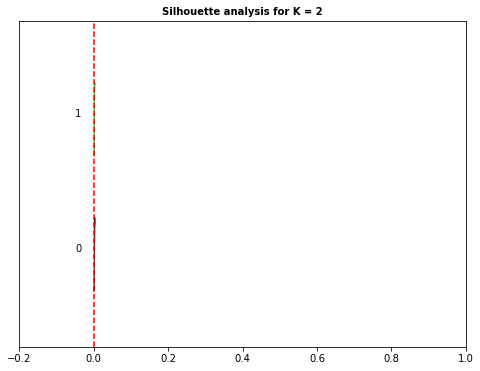

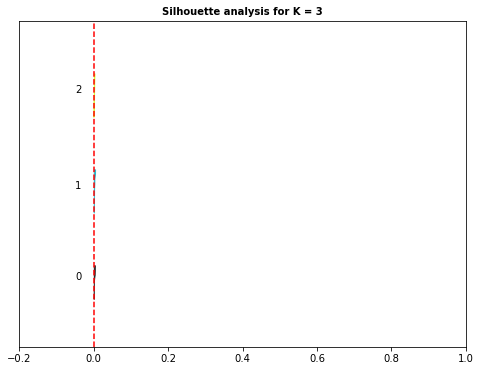

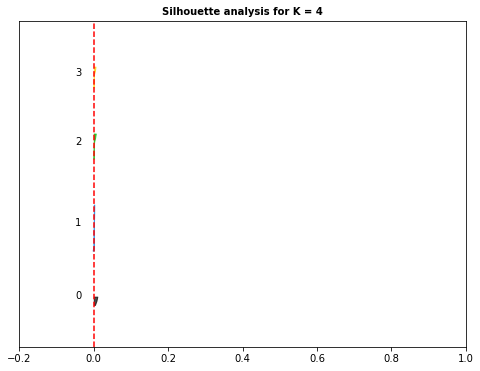

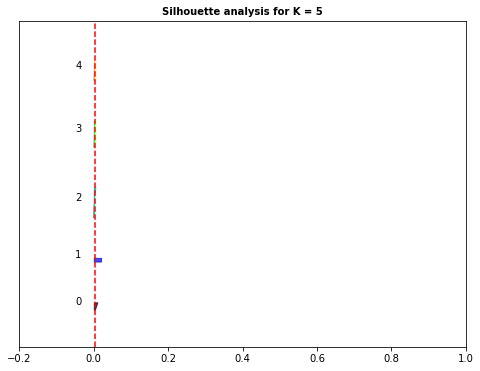

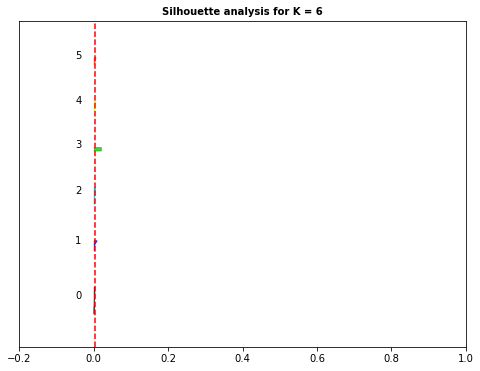

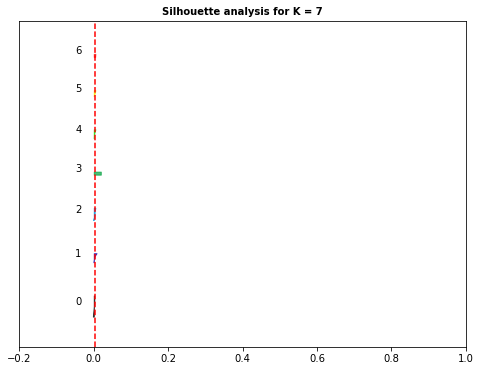

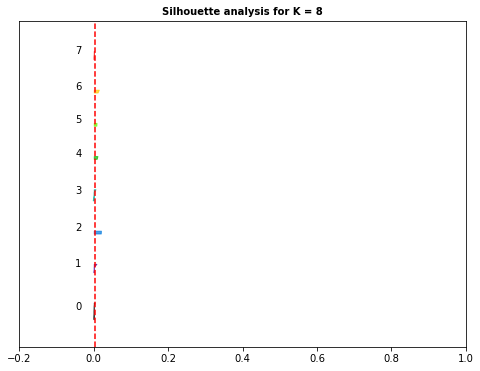

In [49]:
silhouette(kmeans_results, final_df, plot=True)

In [50]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

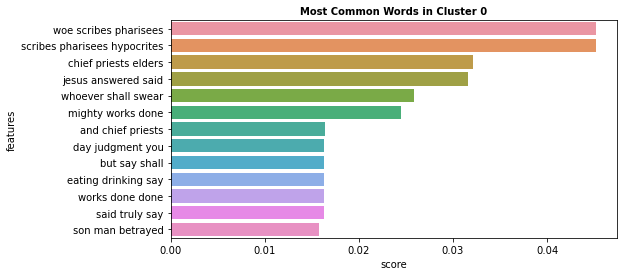

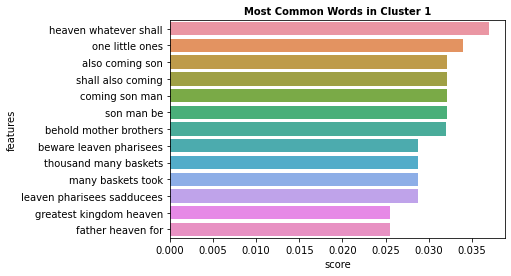

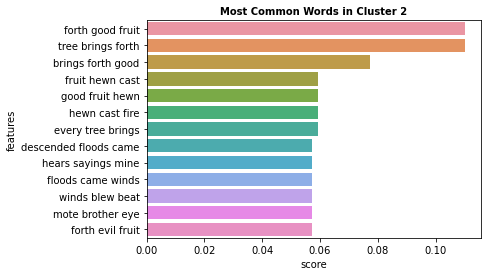

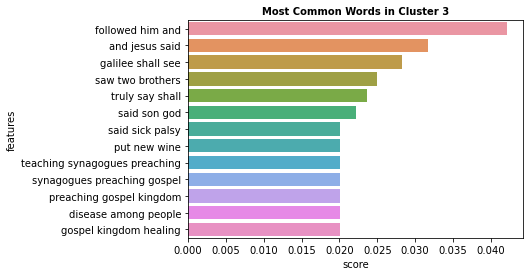

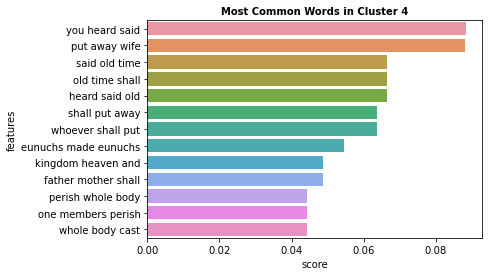

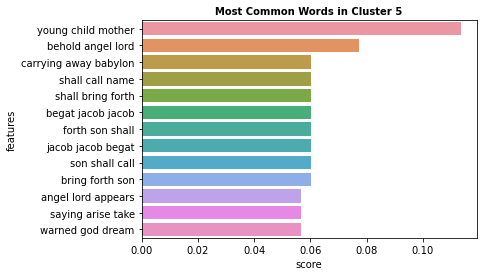

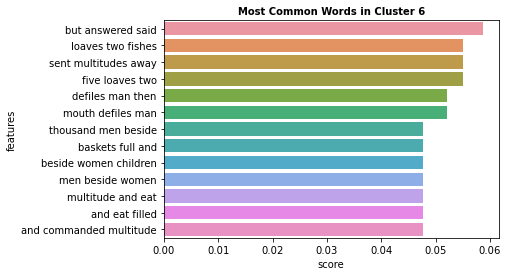

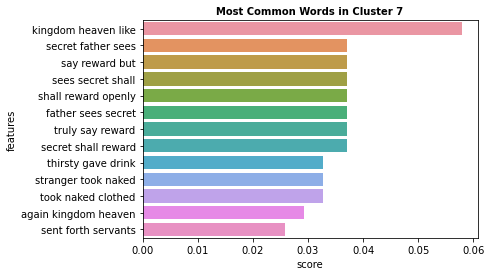

In [51]:
best_result = 8
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [52]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

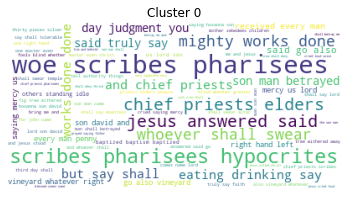

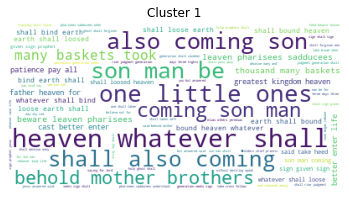

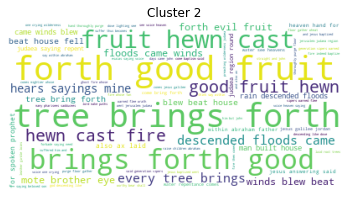

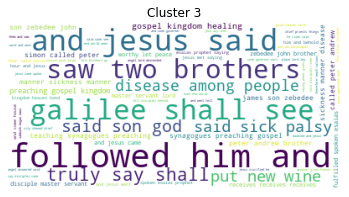

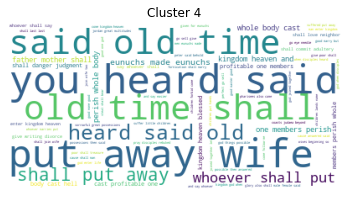

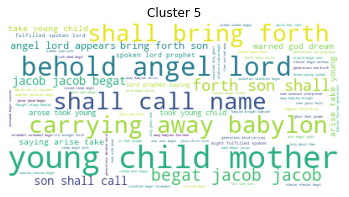

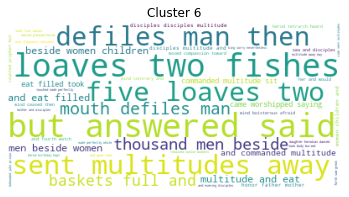

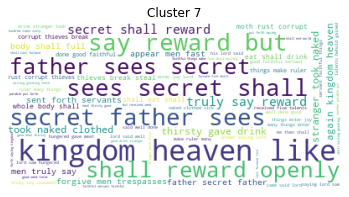

In [53]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [54]:
labels = kmeans.labels_ 
df['label'] = labels
df.head()

,Autor,Livro,label
100,Mateus_1,"'book', 'generation', 'jesus', 'christ', ',', ...",5
101,Mateus_2,"'jesus', 'born', 'bethlehem', 'judaea', 'days'...",5
102,Mateus_3,"'days', 'came', 'john', 'baptist', ',', 'preac...",2
103,Mateus_4,"'jesus', 'led', 'spirit', 'wilderness', 'tempt...",3
104,Mateus_5,"'seeing', 'multitudes', ',', 'went', 'mountain...",4


In [55]:
print(df)

         Autor                                              Livro  label
100   Mateus_1  'book', 'generation', 'jesus', 'christ', ',', ...      5
101   Mateus_2  'jesus', 'born', 'bethlehem', 'judaea', 'days'...      5
102   Mateus_3  'days', 'came', 'john', 'baptist', ',', 'preac...      2
103   Mateus_4  'jesus', 'led', 'spirit', 'wilderness', 'tempt...      3
104   Mateus_5  'seeing', 'multitudes', ',', 'went', 'mountain...      4
105   Mateus_6  'take', 'heed', 'alms', 'men', ',', 'seen', ':...      7
106   Mateus_7  'judge', ',', 'judged.for', 'judgment', 'judge...      2
107   Mateus_8  'come', 'mountain', ',', 'great', 'multitudes'...      3
108   Mateus_9  'entered', 'ship', ',', 'passed', ',', 'came',...      3
109  Mateus_10  'called', 'twelve', 'disciples', ',', 'gave', ...      3
110  Mateus_11  'came', 'pass', ',', 'jesus', 'made', 'end', '...      0
111  Mateus_12  'time', 'jesus', 'went', 'sabbath', 'day', 'co...      1
112  Mateus_13  'day', 'went', 'jesus', 'house', ',

## Análise do agrupamentos 

Análise da classe 0 Fala do paradoxo do pão, um fala da multiplicação dos pães e outro fala a respeito de Jesus não dá os pães aos cachorrinhos (ou seja, a benção era para os judeus e não para os gentios) 

análise da classe 1 fala a respeito do arrependimento ou do novo homem gerado pelo poder do evangelho, pois no capitulo 3 fala de João Batista pregando o arrependimento, no capitulo 7 fala das caracteristicas do homem regenerado para ser cidadão do reino de Deus e no capitulo 17 Jesus fala que mataram João Batista para restaurar as coisas, todavia o povo não aceitou  e o mataram.

análise da classe 2 mostra Jesus começando a pregar e ordenando seus discipulos a pregar para as "ovelhas" então o foco é o anuncio da salvação para as ovelhas. 

análise da classe 3 agrua os capitulos que apresenta Jesus nascendo como salvador e responsavel pelos acontecimentos futuros que ele mesmo descreverá nesses capitulos. (parte Escatologica do Livro) 

Classe 0 (Mateus 14, 15)

Classe 1 (Mateus 3, 7, 17) 

Classe 2 (Matues 4, 5, 10, 11, 18) 

Classe 3 (Mateus 1, 2, 6, 8, 9, 12, 13, 19 ao 28) 

Agrupamento com quatro classes, quadrigrams.

#######################################################################################################################

Análise da classe 1 mostra o Nascimento de Cristo, Jesus iniando as caracteristicas dos individuos do Reino de Deus (sermão da montanha) as parabolas que mostram a carcateristicas do Reino de Deus e Jesus anunciando a hiprocrisia dos fariseus em comparativo com o reino de Deus. 

Análise da Classe 3 mostra a relação do arrependimento com as caracteristicas dos que de fato pertecem ao reino dos Céus (sermão da montanha) e a comissão que Jesus faz para a formar novos discipulos dos moldes do padrão do reino dos Céus. 

Análise da classe 2 mostra a relação do chamado dos discipulos, suas dificuldades dentro do chamado, e os eventos futuros do reino dos Céus. (Escatologia) 

Análise da Classe 0 mostra o paradoxo do pão que as bençãos de Deus era para Israel, entretanto, eles rejeiram e se voltou para os gentios. 

Classe 0 (Mateus 8, 14, 15) 

Classe 1 (Mateus 1, 2, 5, 11, 13, 17, 19, 20, 21, 22, 23, 26, 27) 

Classe 2 (Mateus 10, 12, 18, 19, 24, 25) 

Classe 3 (Mateus 3, 4, 6, 7, 9, 28) 

Agrupamento feito com 4 grupos e trigrams. 

###########################################################################################################################


Análise da classe 0 que agrupa os capitulos que trata dos embates de Jesus com os Fariseus, as parablos do reino que demosntram essa caracteristica hipocrita dos fariseus. 

Análise da classe 3 que agrupa os capitulos que trabalham as questões relacionadas ao arrependimento e ao novo nascimento (sermão da montanha) 

Análise da classe 4 que agrupa os capitulos que tratam da tentação de Jesus e faz uma conexão o alusão com o sofrimento que os proprios discipulos irão passar, reforçando que essa é a marca que os discipulos devem ter, portanto, esse grupo ,tem relaçaõ com chamado em geral. 

Análise da classe 5 que agrupa os capitulos cujo conteudo trata das caracteristicas morais dos suditos do reino de Deus, fazendo um link com a questão do divorcio para evidenciar que as questões morais estão no cerne das caracteristicas dos individuos do reino de Deus. 

Análise da classe 2 que agrupa os capitulos cujo tema é os milagres de Jesus. 

Análise da classe 1 que agrupa os capítulos que tratam da questão da mal influencia dos fariseus e sua conduta pervesa. 

Classe 0 (Mateus 1, 2, 11, 13, 17, 21, 23, 26, 27) 

Classe 1 (Mateus 12, 16, 25) 

Classe 2 (Mateus 8, 14, 15, 20, 22, 24) 

Classe 3 (Mateus 3, 7)

Classe 4 (Mateus 4, 9, 10, 28)

Classe 5 (Mateus 5, 6, 19)

Agrupamento feito com 6  grupos, trigrams. 

###########################################################################################################################

Análise da classe 0 que agrupa os capitulos que tratam o nascimento de Cristo, as caracteristicas dos cidadãos do reino a disparidade da hipocrisia em comparação aos principios do reino e a condenação de Cristo como tambem sua ressureição. 

Análise da classe 3 que agrupa os capitulos que fazem alusão ao arrependimento com os pilares do sermão da montanha. 

Análise da classe 4 que agrupa os cpaitulos que tratam da tentação de Jesus em conexão com o chamado dos discipulos e seus respectivos desafios como discipulos. 

Análise da Classe 5 que agrupa os capitulos que ilsutram a relação que possui o sermão da montanha com os preceitos morais do tema do divorcio. 

Análise da classe 2 que agrupa os cpaitulos que tratam das parabolas referente ao reino e as profecias futuras de Jesus referente a escatologia. 

Análise da classe 1 que agrupa os capitulos qaue trata da pervesidade dos fariseus e dos homens em geral. 

Classe 0 (Mateus 1, 2, 6, 11, 13, 14, 17, 21, 23, 26, 27, 28)

Classe 1 (Mateus 12, 16, 18) 

Classe 2 (Mateus 8, 20, 22, 24, 25)

Classe 3 (Mateus 3, 7)

Classe 4 (Mateus 4, 9, 10, 15)

Classe 5 (Mateus 5, 19)

Agrupamento com 6 grupos quadrigrams. 

############################################################################################################################

Análise da classe 7 que agrupa os capitulos que organizam os temas do nascimento de Cristo Jesus, o sermão do monte em contraponto a conduta dos fariseus e a condenação de Jesus na mãos dos fariseus. 

Análise da classe 6 que agrupa os capitulos que aludem ao arrependimento e as caracteristicas dos individuos pertencentes ao reino de Deus. 

Análise da classe 5 que agrupa os capitulos que aludem a tentação de Jesus como os sofrimento do discipulado. 

Análise da Classe 0 que agrupa os capitulos que aludem ao sermão do monte e os aspectos morais estão correlacionados. 

Análise da classe 1 que agrupa os capitulos que ilustram as parabolas que referem aos aspectos do reino de Deus, be, como os eventos escatologicos futuros que tem ligação com o estabelecimento do reino de Deus.  

Análise da Classe 4 que agrupa os capitulos que tratam do comportamento dos receptores da palavra de Deus. ou seja, há um comportamento paradoxal, uns rejeitam e até mata seus arautos e outrso recebem de bom grado e outros recebem mais não produzem nada. 


Análise da Classe 2 que agrupa o comportamento hipocrita dos fariseus e dos que não servem a Deus. 

Análise da Classe 3 que agrupa os capitulos que fala da multiplicação dos pães. 

Classe 0 (Mateus 5, 19)

Classe 1 (Mateus 8, 17, 20, 21, 22, 24, 25, 28) 

Classe 2 (Mateus 12, 16, 18) 

Classe 3 (Mateus 14, 15) 

Classe 4 (Mateus 11, 13)

Classe 5 (Mateus 4, 9, 10) 

Classe 6 (Mateus 3, 7) 

Classe 7 (Mateus 1, 2, 6, 23, 26, 27) 

Agrupamento com 8 grupos e quadrigrams. 

##############################################################################################################################

Análise da classe 5 que agrupa os capitulos que fazem referencia ao nascimento de Cristo. 

Análise da classe 2 que agrupa os capitulos que trabalham as questões relacionadas ao arrependimento e ao novo nascimento (sermão da montanha) 

Análise da classe 3 que agrupa os capitulos que tratam da tentação de Jesus e faz uma conexão o alusão com o sofrimento que os proprios discipulos irão passar, reforçando que essa é a marca que os discipulos devem ter, portanto, esse grupo ,tem relação com chamado em geral.

Análise da Classe 4 que agrupa os capitulos que aludem ao sermão do monte e os aspectos morais estão correlacionados.

Análise da Classe 7 que agrupa os capitulos que aludem os aspesctos caracteristico dos que recebem o reino de Deus. 

Análise da Classe 0 que agrupa os capitulos que agrupam as parabolas as censuras aos fariseus e a condenação de morte de Jesus. 

Análise da Classe 1 que agrupa os capitulos que o fermento dos fariseus, o comportamento ilegitmo do discipulado e o inicio do sermão profetico. 

Análise da Classe 6 que agrupa os capitulos que fala da multiplicação dos pães.


Classe 0 (Mateus 11, 17, 20, 21, 23, 26, 27) 

Classe 1 (Mateus 12, 16, 24) 

Classe 2 (Mateus 3, 7) 

Classe 3 (Mateus 4, 8, 9, 10, 28)

Classe 4 (Mateus 5, 19) 

Classe 5 (Mateus 1, 2)

Classe 6 (Mateus 14, 15) 

Classe 7 (Mateus 6, 13, 22, 25) 

Agrupamento com 8 grupos e trigrams. 